# Time series forecasting fundamentals with Tensorflow + Milestone Project 3: BitPredict


Predict price of bitcoin based on historical price of Bitcoin

# Get data

using historical price data of Bitcoin to try and predict the future price of Bitcoin. The data is downloaded initially from https://www.coindesk.com/price/bitcoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-16 14:33:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.005s  

2023-02-16 14:33:49 (33.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
#import pandas
import pandas as pd
#Lets read in our bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
#No of samples
len(df)

2787

The data collected for the historical price of Bitcoin is for past 8 yeras but only 2787 samples.

SMaller no of samples will often run into with time series problems

In [5]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


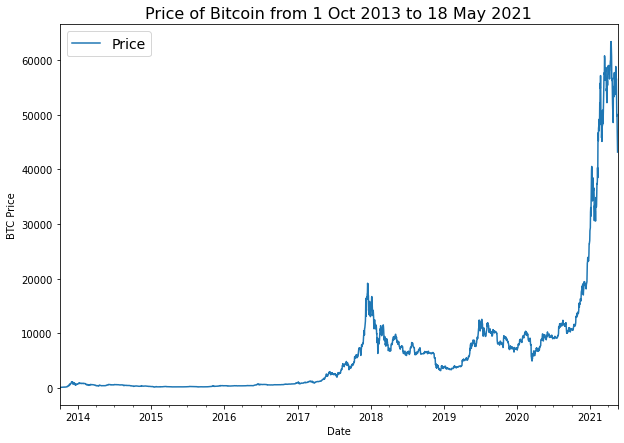

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [7]:
#Importing and formatti ng historical bitcoin data with python
import csv
from datetime import datetime

timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f,delimiter=",")
  next(csv_reader) #skip first line (avoid headers)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) #get dates as dates(not string)
    btc_price.append(float(line[2])) #get the closing price as float

#View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

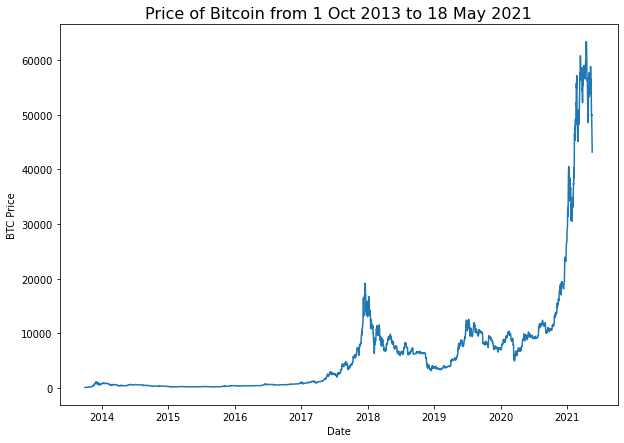

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

## Format Data Part 1: Creatining train and test sets for time series data

Univariate time series data deals with one variable, for example, using the price of Bitcoin to predict the price of Bitcoin.

Multivariate time series data deals with more than one variable, for example, predicting electricity demand using the day of week, time of year and number of houses in a region.

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2229,), (558,), (2229,), (558,))

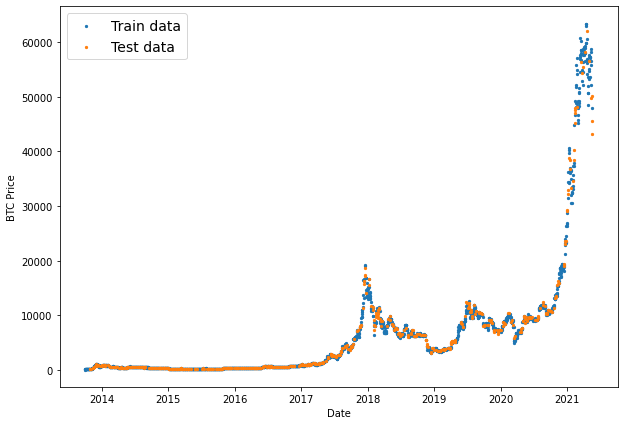

In [11]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Test data is scattered all throughout the training data.

This kind of random split is okay for datasets without a time component (such as images or passages of text for classification problems) but for time series, we've got to take the time factor into account.



### Create train & test sets for time series (the right way)


Rather than a traditionaly random train/test split, it's best to split the time series data sequentially. Meaning, the test data should be data from the future when compared to the training data.

In [263]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2452, 614, 2452, 614)

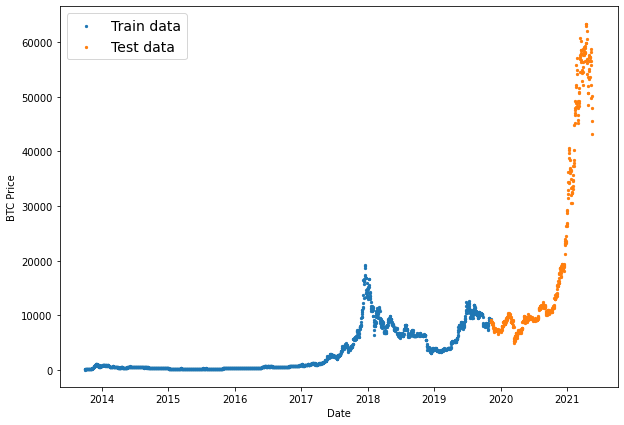

In [13]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

We're going to be using the training set (past) to train a model to try and predict values on the test set (future).

Because the test set is an artificial future, we can guage how our model might perform on actual future data.

## Create a plotting function

Rather than retyping matplotlib commands to continuously plot data, let's make a plotting function we can reuse later.

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

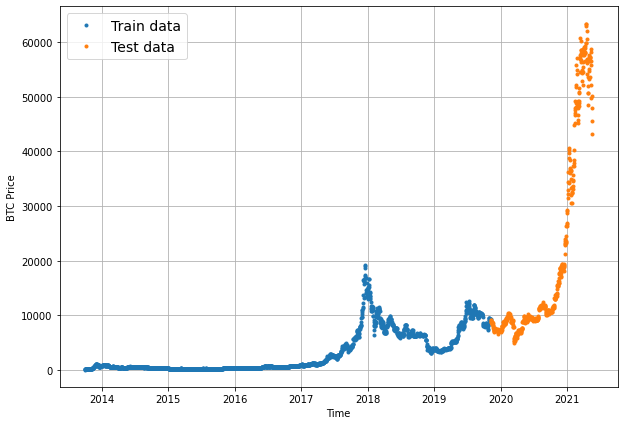

In [15]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Modelling Experiments


We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

horizon = number of timesteps to predict into future
window = number of timesteps from past used to predict horizon

Modelling experiments we're running:

1. model_0 Naïve model (baseline)
2. model_1 Dense model, horizon = 1, window = 7
3. model_2 Same as 1, horizon = 1, window = 30
4. model_3 Same as 1, horizon = 7, window = 30
5. model_4 Conv1D
6. model_5 LSTM
7. model_6 Same as 1 (but with multivariate data)
8. model_7 N-BEATs Algorithm
9. model_8 Ensemble (multiple models optimized on different loss functions)
10. model_9 Future prediction model (model to predict future values)
11. model_10 Same as 1 (but with turkey 🦃 data introduced)

# Model 0: Naive forecast (baseline)


The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [16]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [17]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

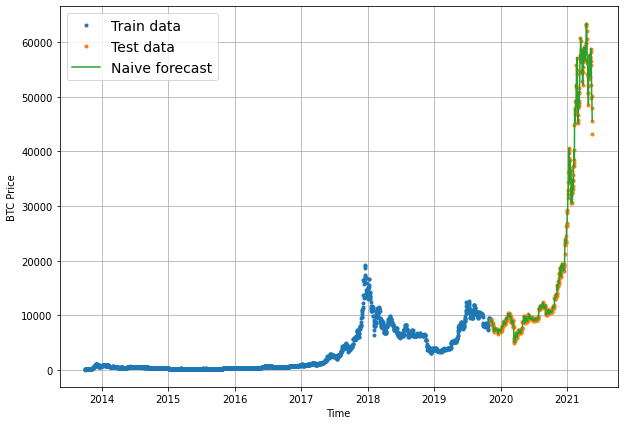

In [18]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

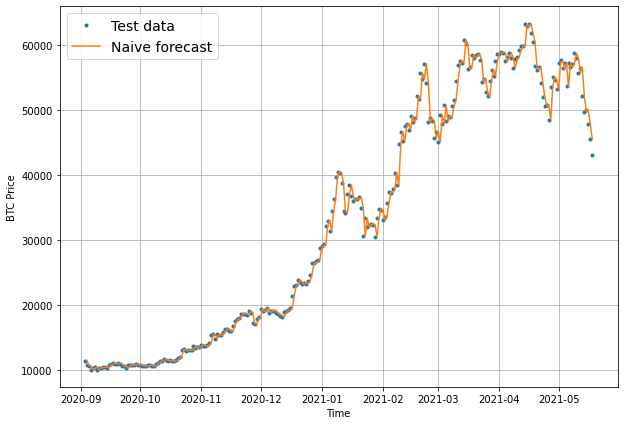

In [19]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating a time series model

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

1. MAE - mean absolute error
2. MSE - mean squared error
3. RMSE - root mean square error
4. MAPE/sMAPE - (symmetric) mean absolute percentage error
5. MASE - mean absolute scaled error



In [20]:
import tensorflow as tf

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [22]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [23]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [24]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

# Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

Windowing for one week

[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]

In [25]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [26]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [27]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [28]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite lsow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html.

Our function will:

1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:

[[0, 1, 2, 3, 4, 5, 6],

[1, 2, 3, 4, 5, 6, 7],

[2, 3, 4, 5, 6, 7, 8]]
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon

In [29]:
import numpy as np
np.arange(7+1)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [30]:
np.expand_dims(np.arange(7+1), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [31]:
np.expand_dims(np.arange(7+1), axis=0).T

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [32]:
np.expand_dims(np.arange(7+1), axis=0) + np.expand_dims(np.arange(7+1), axis=0).T

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14]])

In [33]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [34]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [35]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [36]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [37]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


> 🔑 Note: There's a function which does similar to the above in tf.keras.preprocessing, an extension could be to try and replicate what we've done using the premade function: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

## Turning windows into training and test sets

In [38]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [39]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [40]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [41]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [42]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [43]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [44]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

# Model 1: Dense model (window = 7, horizon = 1)


Our first deep model is going to be a simple dense model:

A single dense layer with 128 hidden units and ReLU
An output layer with linear activation (no activation)
Adam optimizaiton and MAE loss function
Batch size of 128 (previously we've used 32)
100 epochs

Why these values?

Picked them out of experimentation.

*   **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves
*   Parameters = values a model learns on its own







In [45]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

#1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")# linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

#2.Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2564.3555 - mae: 2564.3555 - mse: 17275290.0000

18/18 [==============================] - 10s 97ms/step - loss: 2377.2727 - mae: 2377.2727 - mse: 15412071.0000 - val_loss: 4588.7710 - val_mae: 4588.7710 - val_mse: 39262976.0000
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 399.6711 - mae: 399.6711 - mse: 558897.9375

18/18 [==============================] - 1s 68ms/step - loss: 379.3626 - mae: 379.3626 - mse: 511193.1562 - val_loss: 1025.7428 - val_mae: 1025.7428 - val_mse: 3532518.7500
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 215.7773 - mae: 215.7773 - mse: 215616.7969 - val_loss: 1059.6047 - val_mae: 1059.6047 - val_mse: 3755063.7500
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 203.4733 - mae: 203.4733 - mse: 214401.9062

18/18 [==============================] - 1s 63ms/step - loss: 188.6242 - mae: 188.6242 - mse: 183627.5312 - val_loss: 1016.4507 - val_mae: 1016.4507 - val_mse: 3490093.7500
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 184.6626 - mae: 184.6626 - mse: 181288.8281

18/18 [==============================] - 1s 48ms/step - loss: 178.7688 - mae: 178.7688 - mse: 167999.3906 - val_loss: 997.0986 - val_mae: 997.0986 - val_mse: 3235791.7500
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 173.1761 - mae: 173.1761 - mse: 152939.5938

18/18 [==============================] - 1s 49ms/step - loss: 174.9839 - mae: 174.9839 - mse: 163589.3281 - val_loss: 973.8376 - val_mae: 973.8376 - val_mse: 3200138.2500
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 171.9855 - mae: 171.9855 - mse: 159022.7969

18/18 [==============================] - 1s 53ms/step - loss: 171.9855 - mae: 171.9855 - mse: 159022.7969 - val_loss: 968.7902 - val_mae: 968.7903 - val_mse: 3054630.2500
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 167.5839 - mae: 167.5839 - mse: 153782.8281

18/18 [==============================] - 1s 57ms/step - loss: 168.9945 - mae: 168.9945 - mse: 153756.7031 - val_loss: 946.1896 - val_mae: 946.1898 - val_mse: 2948863.5000
Epoch 9/100
18/18 [==============================] - 0s 14ms/step - loss: 166.5262 - mae: 166.5262 - mse: 150694.7188 - val_loss: 955.4125 - val_mae: 955.4125 - val_mse: 2902876.0000
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 163.3424 - mae: 163.3424 - mse: 145303.2969

18/18 [==============================] - 2s 112ms/step - loss: 163.3424 - mae: 163.3424 - mse: 145303.2969 - val_loss: 910.6823 - val_mae: 910.6823 - val_mse: 2747903.5000
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 165.7326 - mae: 165.7326 - mse: 150808.7344

18/18 [==============================] - 1s 67ms/step - loss: 160.1198 - mae: 160.1198 - mse: 139437.3438 - val_loss: 886.0103 - val_mae: 886.0103 - val_mse: 2658942.0000
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 157.6174 - mae: 157.6174 - mse: 135087.8125 - val_loss: 938.8053 - val_mae: 938.8053 - val_mse: 2688981.7500
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 155.7508 - mae: 155.7508 - mse: 133582.2500 - val_loss: 892.9420 - val_mae: 892.9420 - val_mse: 2522572.7500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 166.2170 - mae: 166.2170 - mse: 140423.6875

18/18 [==============================] - 0s 27ms/step - loss: 151.9548 - mae: 151.9548 - mse: 126178.1875 - val_loss: 863.7878 - val_mae: 863.7878 - val_mse: 2402625.5000
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 150.7777 - mae: 150.7777 - mse: 124756.5312 - val_loss: 891.7815 - val_mae: 891.7815 - val_mse: 2417600.0000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 138.6533 - mae: 138.6533 - mse: 85590.6719

18/18 [==============================] - 1s 40ms/step - loss: 147.5425 - mae: 147.5425 - mse: 120448.6719 - val_loss: 809.7994 - val_mae: 809.7994 - val_mse: 2189862.7500
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 136.7052 - mae: 136.7052 - mse: 97374.1953

18/18 [==============================] - 0s 27ms/step - loss: 143.8066 - mae: 143.8066 - mse: 114470.2891 - val_loss: 799.2798 - val_mae: 799.2798 - val_mse: 2114763.7500
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 140.6884 - mae: 140.6884 - mse: 110246.9609 - val_loss: 822.0335 - val_mae: 822.0335 - val_mse: 2116231.0000
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 138.3429 - mae: 138.3429 - mse: 106116.2031

18/18 [==============================] - 0s 28ms/step - loss: 137.4735 - mae: 137.4735 - mse: 105569.3516 - val_loss: 790.2544 - val_mae: 790.2544 - val_mse: 2005102.0000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 148.6839 - mae: 148.6839 - mse: 129909.4688

18/18 [==============================] - 0s 28ms/step - loss: 138.5731 - mae: 138.5731 - mse: 107361.5859 - val_loss: 776.5150 - val_mae: 776.5150 - val_mse: 2041254.5000
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 198.2377 - mae: 198.2377 - mse: 174080.0781

18/18 [==============================] - 0s 28ms/step - loss: 136.4171 - mae: 136.4171 - mse: 105045.5000 - val_loss: 730.3359 - val_mae: 730.3359 - val_mse: 1809934.8750
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 186.9556 - mae: 186.9556 - mse: 209103.9375

18/18 [==============================] - 0s 27ms/step - loss: 132.1024 - mae: 132.1024 - mse: 98536.4141 - val_loss: 719.1234 - val_mae: 719.1234 - val_mse: 1752609.6250
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 129.9367 - mae: 129.9367 - mse: 95849.4531 - val_loss: 732.4892 - val_mae: 732.4892 - val_mse: 1749746.6250
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 128.4333 - mae: 128.4333 - mse: 92813.3906

18/18 [==============================] - 0s 29ms/step - loss: 127.9734 - mae: 127.9734 - mse: 91941.2031 - val_loss: 701.2340 - val_mae: 701.2340 - val_mse: 1653067.6250
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 125.5273 - mae: 125.5273 - mse: 89860.2109

18/18 [==============================] - 0s 28ms/step - loss: 125.5273 - mae: 125.5273 - mse: 89860.2109 - val_loss: 687.1630 - val_mae: 687.1630 - val_mse: 1624794.3750
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 127.8824 - mae: 127.8824 - mse: 89766.5625 - val_loss: 733.6588 - val_mae: 733.6588 - val_mse: 1808758.7500
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 126.5148 - mae: 126.5148 - mse: 91256.3828 - val_loss: 692.1730 - val_mae: 692.1730 - val_mse: 1648739.2500
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 125.3667 - mae: 125.3667 - mse: 80915.0156

18/18 [==============================] - 0s 26ms/step - loss: 123.2667 - mae: 123.2667 - mse: 87065.0625 - val_loss: 664.0414 - val_mae: 664.0414 - val_mse: 1533614.5000
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 122.5894 - mae: 122.5894 - mse: 85655.3125 - val_loss: 674.0665 - val_mae: 674.0665 - val_mse: 1510392.6250
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 124.1590 - mae: 124.1590 - mse: 85522.4141 - val_loss: 695.2701 - val_mae: 695.2701 - val_mse: 1553918.1250
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 124.3546 - mae: 124.3546 - mse: 84354.2969 - val_loss: 761.4681 - val_mae: 761.4681 - val_mse: 1728677.1250
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 124.9309 - mae: 124.9309 - mse: 85324.1328 - val_loss: 687.6195 - val_mae: 687.6195 - val_mse: 1518166.3750
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 117.6465 - mae: 117.6465 - m

18/18 [==============================] - 0s 28ms/step - loss: 118.7462 - mae: 118.7462 - mse: 81060.9766 - val_loss: 624.5153 - val_mae: 624.5153 - val_mse: 1362414.1250
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 116.8055 - mae: 116.8055 - mse: 81281.5625

18/18 [==============================] - 0s 29ms/step - loss: 116.7071 - mae: 116.7071 - mse: 80470.4062 - val_loss: 621.3658 - val_mae: 621.3658 - val_mse: 1347648.2500
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 120.6499 - mae: 120.6499 - mse: 80098.0859 - val_loss: 668.7803 - val_mae: 668.7803 - val_mse: 1450159.2500
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 143.2363 - mae: 143.2363 - mse: 105048.1172

18/18 [==============================] - 1s 29ms/step - loss: 117.6066 - mae: 117.6066 - mse: 79116.5234 - val_loss: 621.0323 - val_mae: 621.0323 - val_mse: 1359439.2500
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 109.7750 - mae: 109.7750 - mse: 69573.3750

18/18 [==============================] - 0s 27ms/step - loss: 116.0482 - mae: 116.0482 - mse: 79905.6016 - val_loss: 615.8802 - val_mae: 615.8802 - val_mse: 1340930.7500
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 130.0497 - mae: 130.0497 - mse: 109818.1641

18/18 [==============================] - 1s 39ms/step - loss: 113.7681 - mae: 113.7681 - mse: 76598.9531 - val_loss: 605.0266 - val_mae: 605.0266 - val_mse: 1303363.5000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 105.9004 - mae: 105.9004 - mse: 99368.6250

18/18 [==============================] - 0s 27ms/step - loss: 112.5563 - mae: 112.5563 - mse: 75905.6250 - val_loss: 604.5648 - val_mae: 604.5648 - val_mse: 1289983.6250
Epoch 41/100
18/18 [==============================] - 0s 9ms/step - loss: 113.4336 - mae: 113.4336 - mse: 76548.4922 - val_loss: 655.8404 - val_mae: 655.8404 - val_mse: 1433316.1250
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 115.1665 - mae: 115.1665 - mse: 75150.4062

18/18 [==============================] - 1s 40ms/step - loss: 118.1541 - mae: 118.1541 - mse: 79485.2734 - val_loss: 595.5787 - val_mae: 595.5787 - val_mse: 1271060.5000
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9021 - mae: 111.9021 - mse: 74794.9375 - val_loss: 606.6275 - val_mae: 606.6275 - val_mse: 1300995.0000
Epoch 44/100
14/18 [======================>.......] - ETA: 0s - loss: 110.3660 - mae: 110.3660 - mse: 73890.6875

18/18 [==============================] - 1s 39ms/step - loss: 113.3867 - mae: 113.3867 - mse: 75240.4375 - val_loss: 592.0345 - val_mae: 592.0345 - val_mse: 1259626.8750
Epoch 45/100
18/18 [==============================] - 0s 8ms/step - loss: 113.5625 - mae: 113.5625 - mse: 77026.8359 - val_loss: 604.0635 - val_mae: 604.0635 - val_mse: 1273694.3750
Epoch 46/100
15/18 [========================>.....] - ETA: 0s - loss: 115.6192 - mae: 115.6192 - mse: 79829.1797

18/18 [==============================] - 1s 33ms/step - loss: 112.7899 - mae: 112.7899 - mse: 75346.2266 - val_loss: 588.3541 - val_mae: 588.3541 - val_mse: 1246481.5000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 115.7589 - mae: 115.7589 - mse: 78603.9531 - val_loss: 683.9994 - val_mae: 683.9994 - val_mse: 1465685.8750
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5738 - mae: 111.5738 - mse: 73491.4062 - val_loss: 604.5316 - val_mae: 604.5316 - val_mse: 1268204.0000
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2926 - mae: 111.2926 - mse: 74247.8516 - val_loss: 610.0829 - val_mae: 610.0829 - val_mse: 1278006.2500
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0407 - mae: 113.0407 - mse: 74729.4922 - val_loss: 602.8004 - val_mae: 602.8004 - val_mse: 1273443.0000
Epoch 51/100
15/18 [========================>.....] - ETA: 0s - loss: 110.9666 - mae: 110.9666 - mse: 

18/18 [==============================] - 0s 28ms/step - loss: 110.5689 - mae: 110.5689 - mse: 73278.5938 - val_loss: 581.5153 - val_mae: 581.5153 - val_mse: 1223145.6250
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 121.5701 - mae: 121.5701 - mse: 73411.9609

18/18 [==============================] - 0s 27ms/step - loss: 111.1025 - mae: 111.1025 - mse: 74455.8750 - val_loss: 580.0698 - val_mae: 580.0698 - val_mse: 1221176.1250
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4055 - mae: 112.4055 - mse: 74712.0625 - val_loss: 599.0009 - val_mae: 599.0009 - val_mse: 1248674.6250
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5611 - mae: 112.5611 - mse: 73755.4375 - val_loss: 589.8768 - val_mae: 589.8768 - val_mse: 1230292.2500
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 128.6252 - mae: 128.6252 - mse: 98985.9297

18/18 [==============================] - 1s 30ms/step - loss: 112.4621 - mae: 112.4621 - mse: 75276.6328 - val_loss: 578.1532 - val_mae: 578.1532 - val_mse: 1211086.7500
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1488 - mae: 110.1488 - mse: 72973.8516 - val_loss: 796.8044 - val_mae: 796.8044 - val_mse: 1840199.1250
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 135.3220 - mae: 135.3220 - mse: 91049.1797 - val_loss: 677.0903 - val_mae: 677.0903 - val_mse: 1453425.0000
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 122.1222 - mae: 122.1222 - mse: 80566.7188 - val_loss: 636.8688 - val_mae: 636.8688 - val_mse: 1343092.8750
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5503 - mae: 108.5503 - mse: 71168.8047 - val_loss: 596.5537 - val_mae: 596.5537 - val_mse: 1246439.0000
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8355 - mae: 110.8355 - m

18/18 [==============================] - 0s 28ms/step - loss: 108.6699 - mae: 108.6699 - mse: 70541.5938 - val_loss: 577.0852 - val_mae: 577.0852 - val_mse: 1204017.5000
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8607 - mae: 108.8607 - mse: 71968.5078 - val_loss: 590.4988 - val_mae: 590.4988 - val_mse: 1222350.8750
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1546 - mae: 110.1546 - mse: 72370.3438 - val_loss: 643.9058 - val_mae: 643.9058 - val_mse: 1343048.0000
Epoch 65/100
17/18 [===========================>..] - ETA: 0s - loss: 112.8781 - mae: 112.8781 - mse: 74473.9844 

18/18 [==============================] - 0s 28ms/step - loss: 111.8653 - mae: 111.8653 - mse: 73409.9375 - val_loss: 576.7713 - val_mae: 576.7713 - val_mse: 1198879.2500
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 120.1445 - mae: 120.1445 - mse: 86725.8359

18/18 [==============================] - 0s 28ms/step - loss: 109.8399 - mae: 109.8399 - mse: 71364.6328 - val_loss: 570.1951 - val_mae: 570.1951 - val_mse: 1187508.2500
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8089 - mae: 108.8089 - mse: 71075.2734 - val_loss: 601.7623 - val_mae: 601.7623 - val_mse: 1247810.1250
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6729 - mae: 114.6729 - mse: 71039.7891 - val_loss: 721.3304 - val_mae: 721.3304 - val_mse: 1570587.7500
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0384 - mae: 124.0384 - mse: 81519.1641 - val_loss: 636.6543 - val_mae: 636.6543 - val_mse: 1328438.8750
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 122.8245 - mae: 122.8245 - mse: 81435.9531 - val_loss: 590.1178 - val_mae: 590.1178 - val_mse: 1220934.0000
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5327 - mae: 111.5327 - m

18/18 [==============================] - 1s 29ms/step - loss: 107.5585 - mae: 107.5585 - mse: 70869.2578 - val_loss: 567.6445 - val_mae: 567.6445 - val_mse: 1176812.0000
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2383 - mae: 107.2383 - mse: 70264.6641 - val_loss: 594.6876 - val_mae: 594.6876 - val_mse: 1224117.8750
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 80.5148 - mae: 80.5148 - mse: 28199.0586

18/18 [==============================] - 1s 39ms/step - loss: 109.1361 - mae: 109.1361 - mse: 71321.8594 - val_loss: 566.2532 - val_mae: 566.2532 - val_mse: 1171927.2500
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6467 - mae: 107.6467 - mse: 69376.3281 - val_loss: 571.5717 - val_mae: 571.5717 - val_mse: 1178833.6250
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 106.7455 - mae: 106.7455 - mse: 69271.2656 - val_loss: 578.3615 - val_mae: 578.3615 - val_mse: 1190256.0000
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0386 - mae: 108.0386 - mse: 72079.5938 - val_loss: 582.7063 - val_mae: 582.7063 - val_mse: 1197702.1250
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8906 - mae: 106.8906 - mse: 70310.5859 - val_loss: 608.7632 - val_mae: 608.7632 - val_mse: 1252420.2500
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 98.2758 - mae: 98.2758 - mse: 43

18/18 [==============================] - 1s 30ms/step - loss: 107.6272 - mae: 107.6272 - mse: 70135.2500 - val_loss: 564.7686 - val_mae: 564.7686 - val_mse: 1164574.6250
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 188.7030 - mae: 188.7030 - mse: 218996.0156

18/18 [==============================] - 0s 28ms/step - loss: 114.1676 - mae: 114.1676 - mse: 75426.7500 - val_loss: 564.7130 - val_mae: 564.7130 - val_mse: 1164219.6250
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4544 - mae: 111.4544 - mse: 72398.4375 - val_loss: 687.3007 - val_mae: 687.3007 - val_mse: 1452592.1250
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1555 - mae: 113.1555 - mse: 72026.1953 - val_loss: 583.4387 - val_mae: 583.4387 - val_mse: 1197665.7500
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4018 - mae: 107.4018 - mse: 70264.7891 - val_loss: 587.1941 - val_mae: 587.1941 - val_mse: 1202624.7500
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2435 - mae: 107.2435 - mse: 69091.9531 - val_loss: 580.0801 - val_mae: 580.0801 - val_mse: 1187724.8750
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.9885 - mae: 105.9885 - m

18/18 [==============================] - 0s 28ms/step - loss: 106.2425 - mae: 106.2425 - mse: 68200.5078 - val_loss: 563.3401 - val_mae: 563.3401 - val_mse: 1154239.2500
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2078 - mae: 113.2078 - mse: 72102.2422 - val_loss: 659.9671 - val_mae: 659.9671 - val_mse: 1371107.2500
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4443 - mae: 110.4443 - mse: 72128.3203 - val_loss: 585.6194 - val_mae: 585.6194 - val_mse: 1199486.2500
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 107.9910 - mae: 107.9910 - mse: 69518.8672 - val_loss: 568.5267 - val_mae: 568.5267 - val_mse: 1162155.1250
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 107.7874 - mae: 107.7874 - mse: 70147.2734 - val_loss: 564.4373 - val_mae: 564.4373 - val_mse: 1155704.6250
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 114.2259 - mae: 114.2259 - 

In [46]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 701.2975 - mae: 701.2975 - mse: 1471491.2500


[701.2975463867188, 701.2975463867188, 1471491.25]

In [47]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 563.3400 - mae: 563.3400 - mse: 1154239.2500


[563.3400268554688, 563.3400268554688, 1154239.25]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the predictions

In [48]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [49]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8840.078 , 8775.239 , 9022.049 , 8772.311 , 8731.427 , 8722.091 ,
        8659.96  , 8537.39  , 8434.674 , 8521.5625], dtype=float32)>)

In [50]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [51]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 563.34,
 'mse': 1154239.2,
 'rmse': 1074.3552,
 'mape': 2.52723,
 'mase': 0.98963237}

In [52]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [53]:
test_labels.shape

(556, 1)

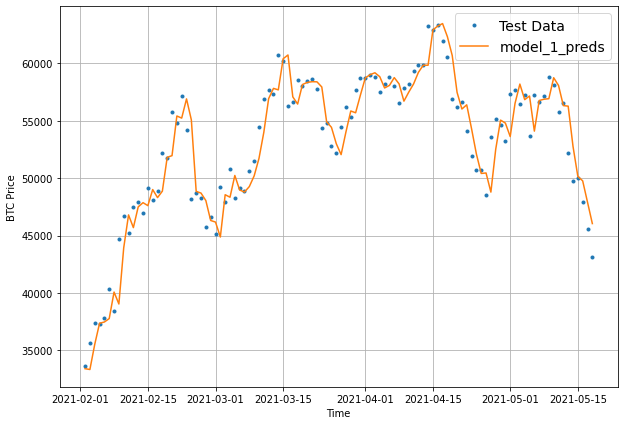

In [54]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

# Model 2: Dense (window = 30, horizon = 1)

In [55]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [56]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [57]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [58]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [59]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 709.1925


709.1925048828125

In [60]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 611.4438


611.44384765625

In [61]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 6ms/step


In [62]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([552]), TensorShape([552]))

In [63]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 611.44385,
 'mse': 1310876.9,
 'rmse': 1144.9353,
 'mape': 2.7479374,
 'mase': 1.0688099}

In [64]:
model_1_results

{'mae': 563.34,
 'mse': 1154239.2,
 'rmse': 1074.3552,
 'mape': 2.52723,
 'mase': 0.98963237}

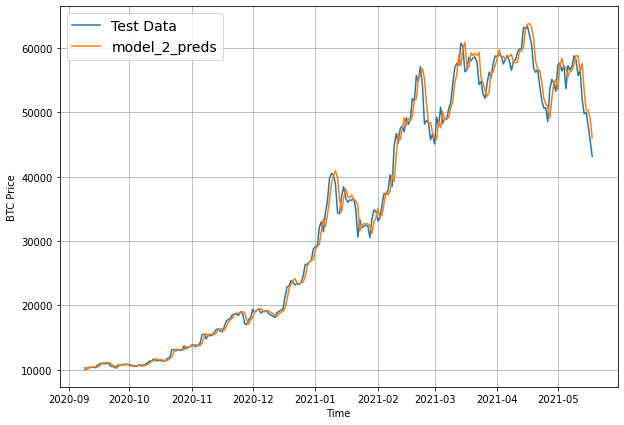

In [65]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

# Model 3: Dense (window = 30, horizon = 7)

In [66]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [67]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [68]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [69]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [70]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1399.6028


1399.602783203125

In [71]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1248.6528


1248.65283203125

In [72]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9602.966, 9434.622, 9263.823, 9435.981, 9404.443, 9541.725,
        9444.628],
       [9011.725, 9080.252, 8894.497, 9097.536, 8951.825, 9253.185,
        8984.526],
       [8779.867, 9000.887, 8969.155, 9117.671, 8845.011, 9078.287,
        8799.527],
       [8952.987, 9294.728, 9195.642, 9261.339, 9120.681, 9139.846,
        8960.683],
       [8976.043, 9140.849, 8986.235, 8954.44 , 9010.662, 8905.625,
        8912.931]], dtype=float32)>

In [73]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

In [74]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 653.66907 ,  288.0893  ,  323.29074 ,  505.67746 ,  429.47867 ,
         403.3737  ,  406.46457 ,  444.1089  ,  439.67935 ,  481.1665  ,
         767.9907  ,  838.74066 ,  863.39    ,  847.46136 ,  599.5189  ,
         290.6312  ,  212.0842  ,  210.45396 ,  179.2076  ,  176.04959 ,
         198.05002 ,  151.55371 ,  349.11133 ,  386.3769  ,  240.97594 ,
         134.36293 ,  120.43164 ,   73.6363  ,  137.65031 ,  134.87424 ,
         320.4045  ,  445.02274 ,  241.5957  ,  336.61224 ,  290.1822  ,
         265.98764 ,  350.30756 ,  255.57227 ,  301.26654 ,  269.79715 ,
         458.0945  ,  123.11544 ,   73.73598 ,   59.819893,  127.15165 ,
         120.3893  ,  106.13009 ,   74.155205,   76.72998 ,  105.74281 ,
         108.48905 ,  132.07742 ,  299.32797 ,  197.24763 ,  310.02426 ,
         355.48306 ,  537.26404 ,  526.98376 ,  460.80902 ,  558.209   ,
         416.53613 ,  211.94176 ,  301.05746 ,  414.30356 ,  364.32623 ,
         471.17258 ,  460.8642  ,  511.71442

## Make our evaluation function work for larger horizons

In [75]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1248.6528


1248.65283203125

In [76]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1248.6528

In [77]:
model_2_results["mae"].ndim

0

In [78]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [79]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1248.6528,
 'mse': 5392785.5,
 'rmse': 1434.3282,
 'mape': 5.638714,
 'mase': 2.2219079}

evaluated predictions with model_3, let's visualize, visualize, visualize!

In [80]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9602.966, 9434.622, 9263.823, 9435.981, 9404.443, 9541.725,
        9444.628],
       [9011.725, 9080.252, 8894.497, 9097.536, 8951.825, 9253.185,
        8984.526],
       [8779.867, 9000.887, 8969.155, 9117.671, 8845.011, 9078.287,
        8799.527],
       [8952.987, 9294.728, 9195.642, 9261.339, 9120.681, 9139.846,
        8960.683],
       [8976.043, 9140.849, 8986.235, 8954.44 , 9010.662, 8905.625,
        8912.931]], dtype=float32)>

In [81]:
test_labels[:]

array([[ 8794.35864452,  8798.04205463,  9081.18687849, ...,
         8760.89271814,  8749.52059102,  8656.97092235],
       [ 8798.04205463,  9081.18687849,  8711.53433917, ...,
         8749.52059102,  8656.97092235,  8500.64355816],
       [ 9081.18687849,  8711.53433917,  8760.89271814, ...,
         8656.97092235,  8500.64355816,  8469.2608989 ],
       ...,
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361],
       [56573.5554719 , 52147.82118698, 49764.1320816 , ...,
        47885.62525472, 45604.61575361, 43144.47129086]])

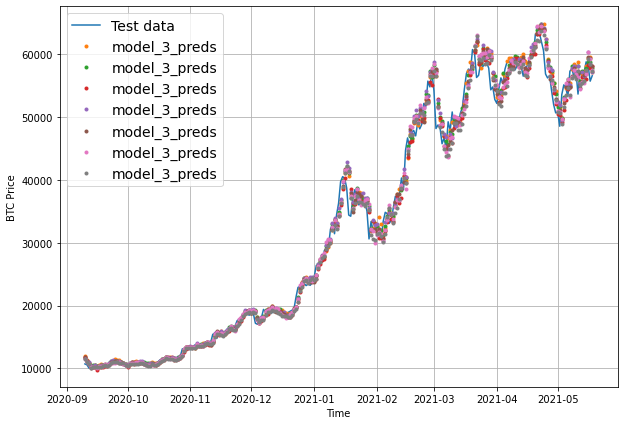

In [82]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [83]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9602.966, 9434.622, 9263.823, 9435.981, 9404.443, 9541.725,
       9444.628], dtype=float32)>

In [84]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9446.884>

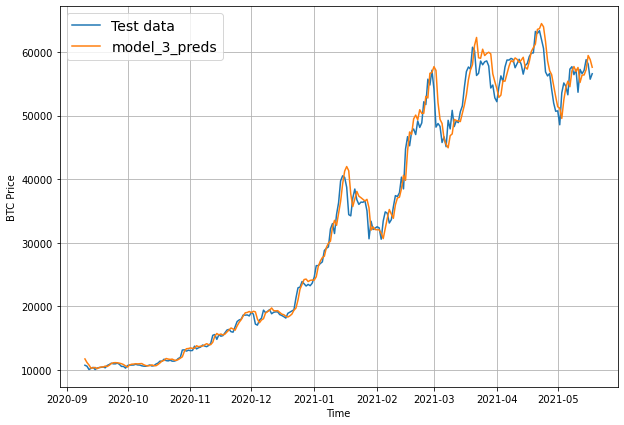

In [85]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

## Which of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone

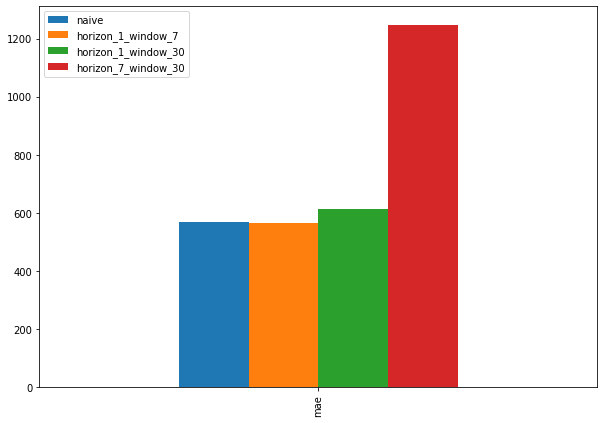

In [86]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

>🔑 Note: You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly), a naïve model will often get fairly good results.

# Model 4: Conv1D

In [87]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [88]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [89]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use the Conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim)...

However our data isn't in that shape yet...

In [90]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [91]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [92]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [93]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [94]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)                      
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1320.4116  

18/18 [==============================] - 6s 50ms/step - loss: 1241.4121 - val_loss: 2605.5503
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 324.2107

18/18 [==============================] - 1s 39ms/step - loss: 312.5241 - val_loss: 1183.4567
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 191.4191

18/18 [==============================] - 1s 57ms/step - loss: 188.2610 - val_loss: 1115.8047
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 178.0721

18/18 [==============================] - 1s 38ms/step - loss: 176.4202 - val_loss: 957.6516
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 170.4452 - val_loss: 959.4846
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 167.8435

18/18 [==============================] - 1s 39ms/step - loss: 169.7604 - val_loss: 942.0676
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 166.7930

18/18 [==============================] - 1s 38ms/step - loss: 165.9225 - val_loss: 941.0717
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 163.4965

18/18 [==============================] - 1s 49ms/step - loss: 163.6985 - val_loss: 902.1932
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 163.0670 - val_loss: 945.4343
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 154.7359

18/18 [==============================] - 1s 53ms/step - loss: 158.8651 - val_loss: 871.3729
Epoch 11/100
12/18 [===================>..........] - ETA: 0s - loss: 163.5032

18/18 [==============================] - 1s 45ms/step - loss: 155.3620 - val_loss: 864.3757
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 152.2190 - val_loss: 870.6907
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 152.8591 - val_loss: 912.0192
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 147.4896

18/18 [==============================] - 1s 36ms/step - loss: 150.2039 - val_loss: 862.3565
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 146.8893

18/18 [==============================] - 1s 36ms/step - loss: 146.8893 - val_loss: 812.3057
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 143.3165 - val_loss: 833.9520
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 142.7525

18/18 [==============================] - 1s 37ms/step - loss: 143.2699 - val_loss: 801.1343
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 144.6128

18/18 [==============================] - 1s 54ms/step - loss: 143.5850 - val_loss: 782.8550
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 138.8380

18/18 [==============================] - 1s 38ms/step - loss: 138.8380 - val_loss: 773.2735
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 142.7898 - val_loss: 807.2682
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 139.7873

18/18 [==============================] - 1s 38ms/step - loss: 139.7873 - val_loss: 739.2880
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 135.6384

18/18 [==============================] - 1s 37ms/step - loss: 135.1908 - val_loss: 729.9169
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 130.3964

18/18 [==============================] - 1s 37ms/step - loss: 131.4346 - val_loss: 721.5834
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 131.6854

18/18 [==============================] - 1s 37ms/step - loss: 130.0914 - val_loss: 712.7639
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 129.6538

18/18 [==============================] - 1s 37ms/step - loss: 129.0338 - val_loss: 706.3710
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 128.7281

18/18 [==============================] - 1s 37ms/step - loss: 129.0662 - val_loss: 696.4004
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 128.4111

18/18 [==============================] - 1s 37ms/step - loss: 128.4111 - val_loss: 688.4535
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5446 - val_loss: 691.6794
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 124.9679 - val_loss: 699.3054
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 129.5883 - val_loss: 707.6746
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 130.7378 - val_loss: 753.9245
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 125.0144

18/18 [==============================] - 1s 36ms/step - loss: 125.0144 - val_loss: 667.7334
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 122.6533 - val_loss: 668.6882
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 121.5862

18/18 [==============================] - 1s 52ms/step - loss: 122.1351 - val_loss: 650.3561
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 121.4303

18/18 [==============================] - 1s 79ms/step - loss: 119.1597 - val_loss: 648.0843
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 122.0318 - val_loss: 663.7942
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 121.4739

18/18 [==============================] - 1s 77ms/step - loss: 121.4739 - val_loss: 644.2778
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 119.8313

18/18 [==============================] - 1s 38ms/step - loss: 119.8414 - val_loss: 637.3069
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 117.6517

18/18 [==============================] - 1s 38ms/step - loss: 117.6517 - val_loss: 630.9314
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 117.1147

18/18 [==============================] - 1s 37ms/step - loss: 116.7791 - val_loss: 627.4213
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 117.6597

18/18 [==============================] - 1s 37ms/step - loss: 117.6597 - val_loss: 626.6137
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 120.6169 - val_loss: 640.7156
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 117.6206 - val_loss: 627.4477
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 117.1823

18/18 [==============================] - 1s 37ms/step - loss: 116.4530 - val_loss: 616.5898
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6596 - val_loss: 631.8967
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 116.3969 - val_loss: 647.3428
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 117.7091 - val_loss: 681.9711
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 115.8766

18/18 [==============================] - 1s 36ms/step - loss: 116.0304 - val_loss: 616.1644
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8018 - val_loss: 689.7401
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 125.2403 - val_loss: 750.0332
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2767 - val_loss: 625.6504
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 116.6033

18/18 [==============================] - 1s 37ms/step - loss: 116.1585 - val_loss: 615.4911
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2651 - val_loss: 665.6512
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 120.6911 - val_loss: 670.4229
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 120.2814

18/18 [==============================] - 1s 36ms/step - loss: 118.7394 - val_loss: 603.1562
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8479 - val_loss: 726.1083
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 118.1653 - val_loss: 634.8075
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6796 - val_loss: 655.4939
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 115.8978

18/18 [==============================] - 1s 39ms/step - loss: 117.0340 - val_loss: 597.4930
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0850 - val_loss: 646.2347
Epoch 61/100
16/18 [=========================>....] - ETA: 0s - loss: 114.1779

18/18 [==============================] - 2s 90ms/step - loss: 113.2278 - val_loss: 594.5848
Epoch 62/100
18/18 [==============================] - ETA: 0s - loss: 109.8202

18/18 [==============================] - 3s 147ms/step - loss: 109.8202 - val_loss: 592.5948
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6574 - val_loss: 620.6740
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0223 - val_loss: 636.8300
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 113.2195

18/18 [==============================] - 1s 38ms/step - loss: 113.2195 - val_loss: 585.6190
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9828 - val_loss: 587.6445
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1583 - val_loss: 659.7575
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0449 - val_loss: 589.7776
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 118.7145 - val_loss: 666.0922
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 129.7153 - val_loss: 615.0529
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2311 - val_loss: 614.0155
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 109.1019

18/18 [==============================] - 1s 38ms/step - loss: 110.9388 - val_loss: 583.1781
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 112.5927 - val_loss: 625.9521
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0957 - val_loss: 589.8775
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4634 - val_loss: 596.1214
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5513 - val_loss: 625.1920
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6299 - val_loss: 587.8190
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 111.9027

18/18 [==============================] - 1s 37ms/step - loss: 110.9139 - val_loss: 577.1894
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 109.7997 - val_loss: 592.9265
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1103 - val_loss: 581.0943
Epoch 81/100
15/18 [========================>.....] - ETA: 0s - loss: 110.2916

18/18 [==============================] - 1s 38ms/step - loss: 109.0558 - val_loss: 575.1075
Epoch 82/100
13/18 [====================>.........] - ETA: 0s - loss: 120.5118

18/18 [==============================] - 1s 38ms/step - loss: 118.2615 - val_loss: 574.5354
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7262 - val_loss: 691.9523
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9861 - val_loss: 593.3373
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4142 - val_loss: 612.7935
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0623 - val_loss: 593.7584
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4610 - val_loss: 597.1771
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3354 - val_loss: 587.7558
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5288 - val_loss: 576.5355
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5024 - val_loss: 623.6811
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 37ms/step - loss: 106.9828 - val_loss: 571.4014
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4982 - val_loss: 655.7758
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0044 - val_loss: 580.2147
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0494 - val_loss: 578.2874
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1774 - val_loss: 574.3989
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3881 - val_loss: 623.2585


In [95]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Evaluate model... 
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 623.2585


623.2584838867188

In [97]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.4012


571.4011840820312

In [98]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8890.264, 8784.841, 9004.681, 8787.283, 8744.193, 8748.792,
       8678.638, 8529.348, 8470.336, 8517.234], dtype=float32)>

In [99]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 571.4012,
 'mse': 1182668.5,
 'rmse': 1087.5056,
 'mape': 2.5491157,
 'mase': 1.0037936}

# Model 5: RNN (LSTM)


Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [100]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [101]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 146ms/step - loss: 2530.5916 - val_loss: 11713.4893
Epoch 2/100
18/18 [==============================] - 2s 101ms/step - loss: 1030.4816 - val_loss: 1239.5405
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 267.4783 - val_loss: 1417.4750
Epoch 4/100
18/18 [==============================] - 2s 98ms/step - loss: 212.0546 - val_loss: 1136.6172
Epoch 5/100
18/18 [==============================] - 2s 122ms/step - loss: 202.1853 - val_loss: 1125.1659
Epoch 6/100
18/18 [==============================] - 2s 102ms/step - loss: 204.9187 - val_loss: 1114.4440
Epoch 7/100
18/18 [==============================] - 2s 111ms/step - loss: 200.0743 - val_loss: 1003.1466
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 189.4987 - val_loss: 1112.2230
Epoch 9/100
18/18 [==============================] - 0s 13ms/step - loss: 192.3100 - val_loss: 1380.3192
Epoch 10/100
18/18 [============================

In [102]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 583.4415


583.4415283203125

In [103]:
#Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8932.931, 8831.068, 8978.579, 8756.11 , 8787.397], dtype=float32)>

In [104]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 583.4415,
 'mse': 1215595.9,
 'rmse': 1102.5406,
 'mape': 2.618372,
 'mase': 1.0249451}

>🔑 Note: Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted on that day...

*   day 1 - 0
*   day 2 - 1
*   day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [105]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [106]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [108]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [109]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [110]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


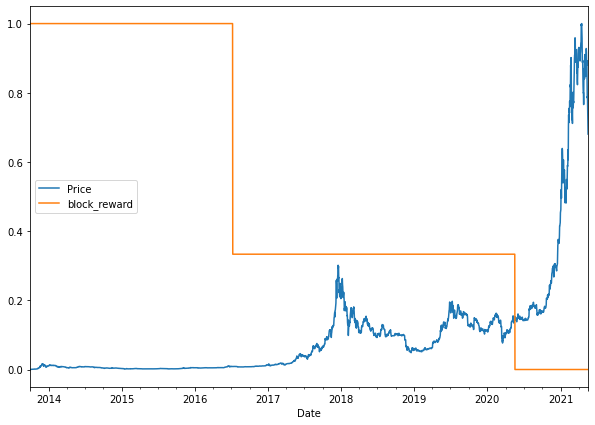

In [111]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas


Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [112]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [113]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [114]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


What we have done is created a way to window our dataset directly from a pandas dataframe

[0,1,2,3,4,5,6,block_reward] -> [7]

[1,2,3,4,5,6,7,block_reward] -> [8]

[2,3,4,5,6,7,8,block_reward] -> [9] 

In [265]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [116]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [266]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

# Model 6: Dense (multivariate time series)

In [118]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)                          
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 13s - loss: 5383.5244

18/18 [==============================] - 1s 34ms/step - loss: 3431.4360 - val_loss: 11040.5742
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 681.4035 

18/18 [==============================] - 0s 26ms/step - loss: 681.4035 - val_loss: 2986.1038
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 410.2544

18/18 [==============================] - 0s 25ms/step - loss: 282.2478 - val_loss: 1133.8064
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 229.3544

18/18 [==============================] - 0s 28ms/step - loss: 189.0936 - val_loss: 1014.1537
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 164.5163

18/18 [==============================] - 0s 26ms/step - loss: 169.6316 - val_loss: 926.8853
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 164.9581

18/18 [==============================] - 0s 27ms/step - loss: 164.9581 - val_loss: 917.6761
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 158.6430 - val_loss: 917.7440
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 132.8026

18/18 [==============================] - 0s 25ms/step - loss: 155.5842 - val_loss: 855.5642
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 150.4885 - val_loss: 863.6231
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 144.9551

18/18 [==============================] - 0s 28ms/step - loss: 147.2649 - val_loss: 814.0861
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 156.2709

18/18 [==============================] - 1s 29ms/step - loss: 142.7801 - val_loss: 811.8907
Epoch 12/100
16/18 [=========================>....] - ETA: 0s - loss: 140.9488

18/18 [==============================] - 1s 63ms/step - loss: 140.5345 - val_loss: 808.6495
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 136.3667

18/18 [==============================] - 1s 39ms/step - loss: 137.9782 - val_loss: 779.9229
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 132.8884

18/18 [==============================] - 1s 33ms/step - loss: 134.8924 - val_loss: 776.1373
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 135.3298 - val_loss: 813.9957
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 125.4752

18/18 [==============================] - 0s 26ms/step - loss: 135.6209 - val_loss: 733.7798
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 119.3593

18/18 [==============================] - 0s 27ms/step - loss: 130.0958 - val_loss: 720.3349
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 131.3057

18/18 [==============================] - 0s 27ms/step - loss: 126.8613 - val_loss: 711.6739
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 125.2494 - val_loss: 724.4705
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5696

18/18 [==============================] - 0s 27ms/step - loss: 125.2437 - val_loss: 701.4615
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 163.5298

18/18 [==============================] - 0s 26ms/step - loss: 127.0281 - val_loss: 674.0190
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 169.0598

18/18 [==============================] - 0s 27ms/step - loss: 122.2334 - val_loss: 665.1373
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 119.9616

18/18 [==============================] - 0s 26ms/step - loss: 120.7894 - val_loss: 664.8526
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 130.4588

18/18 [==============================] - 0s 27ms/step - loss: 119.9876 - val_loss: 652.9697
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 117.9150 - val_loss: 664.9140
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 122.5249 - val_loss: 680.2391
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 173.1389

18/18 [==============================] - 0s 26ms/step - loss: 120.1757 - val_loss: 632.9274
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 109.0235

18/18 [==============================] - 0s 26ms/step - loss: 116.2819 - val_loss: 626.3292
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6920 - val_loss: 633.5731
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6703

18/18 [==============================] - 0s 27ms/step - loss: 118.1121 - val_loss: 625.1672
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9225 - val_loss: 661.0142
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 116.8930 - val_loss: 641.5256
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 114.0917 - val_loss: 668.2113
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 118.5423 - val_loss: 633.9169
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 100.6429

18/18 [==============================] - 0s 26ms/step - loss: 115.1127 - val_loss: 607.5057
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 116.4647 - val_loss: 624.4808
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 136.4768

18/18 [==============================] - 0s 26ms/step - loss: 112.8941 - val_loss: 601.8065
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 109.0220

18/18 [==============================] - 0s 27ms/step - loss: 111.5606 - val_loss: 596.6164
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0213 - val_loss: 601.9190
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2873 - val_loss: 599.5196
Epoch 41/100
18/18 [==============================] - 0s 11ms/step - loss: 114.0071 - val_loss: 643.2489
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 110.0858

18/18 [==============================] - 0s 27ms/step - loss: 117.9846 - val_loss: 589.9186
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3973 - val_loss: 592.4203
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 64.7210

18/18 [==============================] - 1s 45ms/step - loss: 110.5595 - val_loss: 586.5295
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7067 - val_loss: 594.1737
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5249 - val_loss: 616.3070
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 114.8300 - val_loss: 726.1731
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4811 - val_loss: 656.4564
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 176.2075

18/18 [==============================] - 1s 33ms/step - loss: 118.2234 - val_loss: 581.1466
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 110.0943 - val_loss: 661.3057
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8066 - val_loss: 582.4514
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 116.3040

18/18 [==============================] - 1s 38ms/step - loss: 113.6855 - val_loss: 577.7850
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 112.2041 - val_loss: 580.0843
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 114.2947 - val_loss: 649.5078
Epoch 55/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0497 - val_loss: 586.1609
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4398 - val_loss: 777.1963
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 126.2487 - val_loss: 638.3678
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 114.7485 - val_loss: 639.6371
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 108.5483 - val_loss: 619.8492
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 110.8286 - val_loss: 597.3100
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 0s 26ms/step - loss: 109.4349 - val_loss: 571.4156
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8098 - val_loss: 582.2674
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1647 - val_loss: 660.1784
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6144 - val_loss: 578.3153
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 110.3973 - val_loss: 573.0356
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5715 - val_loss: 599.5607
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8619 - val_loss: 686.2161
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1139 - val_loss: 637.8456
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 120.6829 - val_loss: 581.8529
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 0s 25ms/step - loss: 108.1844 - val_loss: 567.2070
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7581 - val_loss: 606.7141
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 165.8273

18/18 [==============================] - 0s 27ms/step - loss: 106.6676 - val_loss: 566.2768
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2395 - val_loss: 629.9170
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1781 - val_loss: 573.3420
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7470 - val_loss: 573.7661
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 106.4706 - val_loss: 566.4244
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 106.6504 - val_loss: 601.7819
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6754 - val_loss: 567.5814
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 106.8137

18/18 [==============================] - 0s 28ms/step - loss: 106.8137 - val_loss: 564.6752
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 187.6112

18/18 [==============================] - 0s 25ms/step - loss: 113.2426 - val_loss: 564.2493
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3788 - val_loss: 649.0355
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 111.1632 - val_loss: 566.4399
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5510 - val_loss: 579.5167
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 108.5939 - val_loss: 591.0839
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2031 - val_loss: 567.0063
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1801 - val_loss: 566.1594
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5649 - val_loss: 584.7642
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 107.3214 - val_loss: 606.4657
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 11

18/18 [==============================] - 0s 25ms/step - loss: 107.2527 - val_loss: 563.2220
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0730 - val_loss: 628.7440
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9085 - val_loss: 576.8445
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7406 - val_loss: 570.9088
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 149.1514

18/18 [==============================] - 0s 26ms/step - loss: 106.9657 - val_loss: 563.0148
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7222 - val_loss: 641.5998


In [119]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 641.5999


641.5999145507812

In [120]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 563.0150


563.0149536132812

In [121]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8857.851, 8809.402, 9032.7  , 8778.931, 8772.711, 8715.466,
       8689.793, 8542.439, 8460.375, 8534.683], dtype=float32)>

In [122]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 563.0149,
 'mse': 1152873.6,
 'rmse': 1073.7195,
 'mape': 2.511855,
 'mase': 0.98906124}

In [123]:
model_1_results

{'mae': 563.34,
 'mse': 1154239.2,
 'rmse': 1074.3552,
 'mape': 2.52723,
 'mase': 0.98963237}

# Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

1. This will allow us to practice replicating a paper with TensorFlow code
2. We will see how to use TensorFlow layer subclassing (to make our own custom layers)
3. Get experience using the Functional API to create a custom architecture
4. Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [124]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs.

In [125]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [126]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [127]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 1.6178951  -0.7099391   0.45220476 -0.72726196  0.30870146  0.01865335
  0.20904504]
Forecast: 0.3143938481807709


### Preparing data for the N-BEATS algorithm using tf.data

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance

In [128]:
HORIZON = 1
WINDOW_SIZE = 7 

In [129]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [130]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [131]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [132]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset
     

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [133]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [134]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using tf.keras.Model()
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9.Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:



*   Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
*   Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)


In [135]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 881: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1146: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1246: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min, sys: 6.48 s, total: 5min 6s
Wall time: 5min 33s


In [136]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 571.1674


571.1674194335938

In [137]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8831.257, 8786.811, 9056.164, 8767.125, 8753.859, 8741.158,
       8675.93 , 8506.32 , 8474.158, 8529.92 ], dtype=float32)>

In [138]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 571.1674,
 'mse': 1169350.5,
 'rmse': 1081.3651,
 'mape': 2.5888689,
 'mase': 1.0033829}

### Plotting the N-BEATS architecture we've created

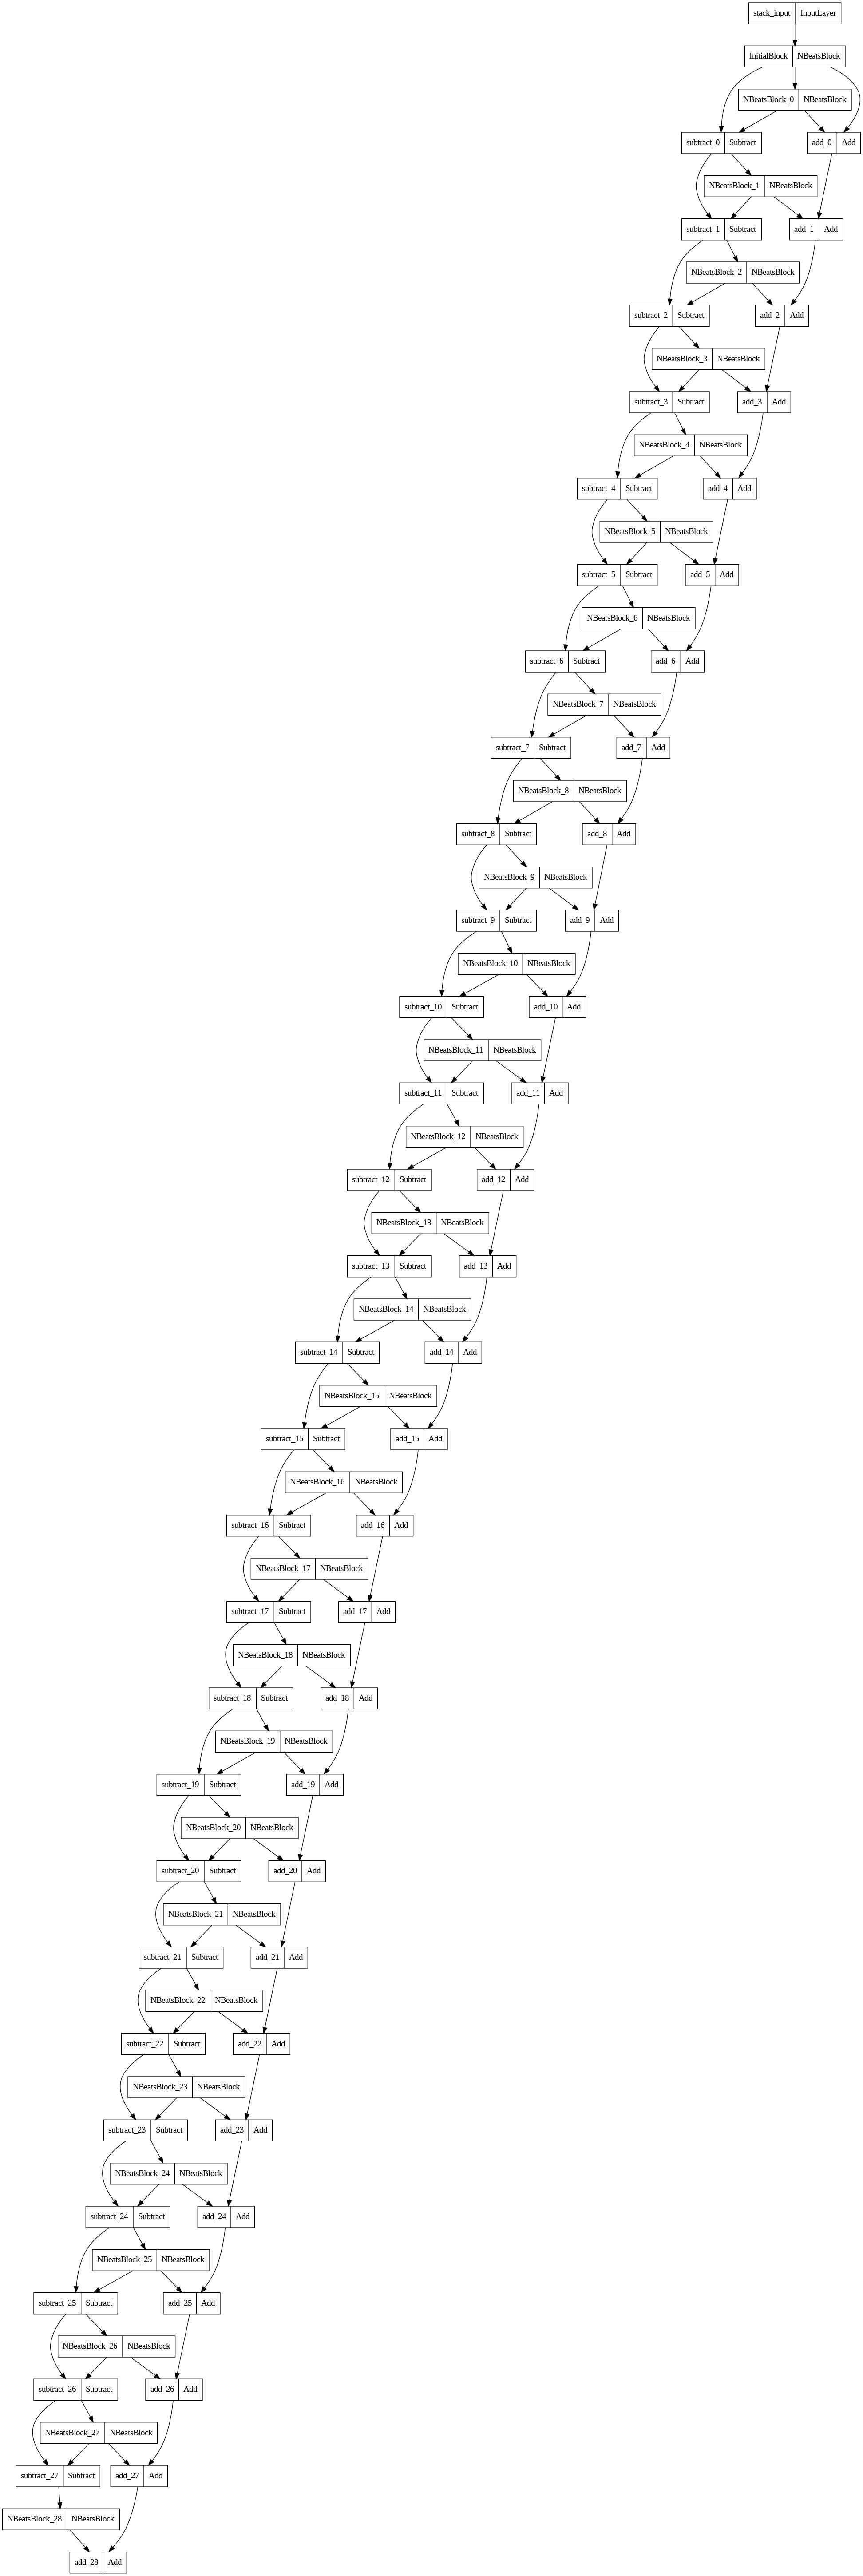

In [139]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many different models to predict a common goal.

In [140]:
HORIZON, WINDOW_SIZE

(1, 7)

###Constructing and fitting and ensemble of models (using different loss functions)

In [141]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models 

In [142]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 445: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 558: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 658: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 484: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 584: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 589: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 689: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 136: ReduceLROnPlateau reduci

### Make predictions with our ensemble model

In [143]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [144]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 80ms/step
CPU times: user 928 ms, sys: 30.7 ms, total: 958 ms
Wall time: 1.14 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8674.164 ,  8636.683 ,  9018.627 , ..., 48824.75  , 48212.555 ,
        45553.547 ],
       [ 8786.485 ,  8766.304 ,  9020.416 , ..., 50091.66  , 47886.87  ,
        45805.207 ],
       [ 8734.396 ,  8778.442 ,  9084.931 , ..., 49746.574 , 48805.516 ,
        45780.758 ],
       ...,
       [ 8819.456 ,  8794.767 ,  9019.576 , ..., 49409.12  , 48494.5   ,
        46544.473 ],
       [ 8757.4795,  8782.374 ,  8956.549 , ..., 49781.008 , 47976.027 ,
        46467.066 ],
       [ 8827.788 ,  8798.501 ,  9097.276 , ..., 50550.402 , 48396.137 ,
        45635.15  ]], dtype=float32)>

In [145]:
ensemble_preds


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8674.164 ,  8636.683 ,  9018.627 , ..., 48824.75  , 48212.555 ,
        45553.547 ],
       [ 8786.485 ,  8766.304 ,  9020.416 , ..., 50091.66  , 47886.87  ,
        45805.207 ],
       [ 8734.396 ,  8778.442 ,  9084.931 , ..., 49746.574 , 48805.516 ,
        45780.758 ],
       ...,
       [ 8819.456 ,  8794.767 ,  9019.576 , ..., 49409.12  , 48494.5   ,
        46544.473 ],
       [ 8757.4795,  8782.374 ,  8956.549 , ..., 49781.008 , 47976.027 ,
        46467.066 ],
       [ 8827.788 ,  8798.501 ,  9097.276 , ..., 50550.402 , 48396.137 ,
        45635.15  ]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into point predictions we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [146]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]    

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8774.152, 8786.704, 9058.846, 8711.982, 8749.618, 8711.813,
       8635.251, 8493.344, 8449.793, 8517.015], dtype=float32)>

In [147]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8775.342, 8787.277, 9061.067, 8702.908, 8761.929, 8718.165,
       8622.323, 8502.27 , 8450.768, 8524.107], dtype=float32)

In [148]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 568.53754,
 'mse': 1148804.6,
 'rmse': 1071.823,
 'mape': 2.571175,
 'mase': 0.99876297}

In [149]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 570.4207,
 'mse': 1151014.9,
 'rmse': 1072.8536,
 'mape': 2.590415,
 'mase': 1.0020713}

In [150]:
model_1_results

{'mae': 563.34,
 'mse': 1154239.2,
 'rmse': 1074.3552,
 'mape': 2.52723,
 'mase': 0.98963237}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialzed models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)


*   https://en.wikipedia.org/wiki/1.96
*   https://eng.uber.com/neural-networks-uncertainty-estimation/





In [151]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper
     

In [152]:
# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

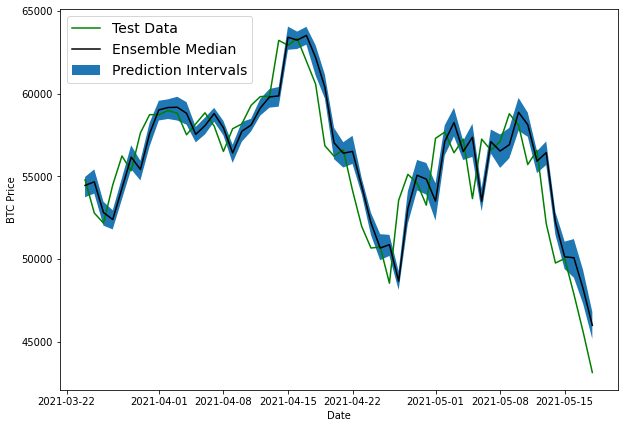

In [153]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

🔑 Note: These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:

1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)


There are two major types of uncertainty in machine learning you should know about:

*   **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
*   **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

Weve only scratched the surface of uncertainty in machine but if you'd like to learn more, I'd highly recommend checking out the resources located here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty

# Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [154]:
HORIZON = 1
WINDOW_SIZE = 7

In [155]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [156]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [157]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [158]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [159]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [160]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [161]:
# How many timestesp to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:

*   a list of values (Bitcoin historical data)
*   a trained model (such as model_9)
*   La window into the future to predict (our INTO_FUTURE variable)
*   the window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last WINDOW_SIZE values from the input values
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE sequences which update to remove the first value and append the latest prediction

In [162]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis=0)

<tf.Tensor: shape=(1, 7), dtype=float64, numpy=
array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361, 43144.47129086]])>

In [163]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [164]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 58ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 54972.3671875

1/1 [==============================] - 0s 24ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54972.3671875 ] -> Prediction: 51349.2734375

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54972.3671875  51349.2734375 ] -> Prediction: 50180.77734375

1/1 [==============================] - 0s 23ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54972.3671875  51349.2734375  50180.77734375] -> Prediction: 47841.8515625

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 54972.3671875
 51349.2734375  50180.77734375 47841.8515625 ] 

### Plot future forecasts

In [165]:
future_forecast

[54972.367,
 51349.273,
 50180.777,
 47841.85,
 46044.23,
 46239.742,
 47750.953,
 54016.926,
 50707.383,
 48953.414,
 46241.617,
 45956.086,
 47851.266,
 50383.867]

In [166]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [167]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [168]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [169]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [170]:
#Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 54972.367, 51349.273, 50180.777, 47841.85 , 46044.23 ,
        46239.742, 47750.953, 54016.926, 50707.383, 48953.414, 46241.617,
        45956.086, 47851.266, 50383.867], dtype=float32))

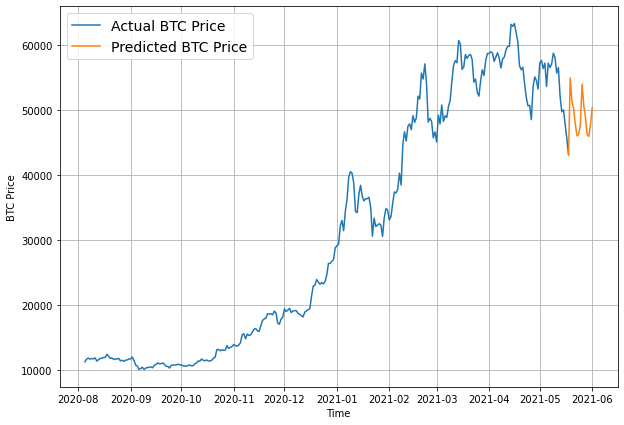

In [171]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

# Model 10: Why forecasting is BS (the turkey problem 🦃)

In [172]:
# Let's introduce a turkey prolbme to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [173]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [174]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

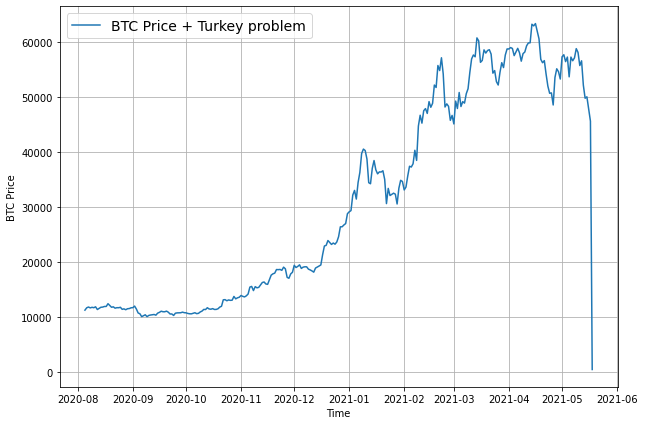

In [175]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [176]:
HORIZON = 1
WINDOW_SIZE = 7

In [177]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [178]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [179]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [180]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 740.2417


740.24169921875

In [181]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 644.5918


644.591796875

In [182]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8837.398, 8773.183, 9038.96 , 8761.345, 8716.267, 8729.903,
       8681.29 , 8496.696, 8453.075, 8523.822], dtype=float32)>

In [183]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17126.893,
 'mse': 614258560.0,
 'rmse': 23709.385,
 'mape': 121.32043,
 'mase': 26.503918}

In [184]:
model_1_results

{'mae': 563.34,
 'mse': 1154239.2,
 'rmse': 1074.3552,
 'mape': 2.52723,
 'mase': 0.98963237}

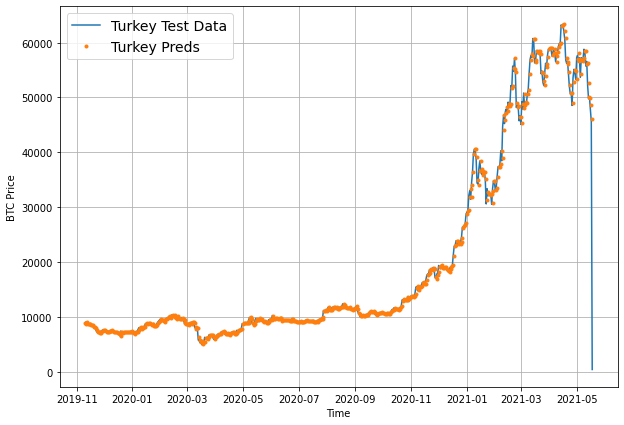

In [185]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

# Excercises 

## 1 . Normalizing the data 

Does scaling the data help for univariate/multivariate data? (e.g. getting all of the values between 0 & 1)

Try doing this for a univariate model (e.g. model_1) and a multivariate model (e.g. model_6) and see if it effects model training or evaluation results.

In [186]:
# # Transform Price 
# price_test = prices.copy()
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# price_test.reshape(len(price_test), 1)
# price_normed = scaler.fit_transform(price_test.reshape(len(price_test), 1))

In [187]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [188]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [189]:
train_windows.shape

(2224, 7)

In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_windows_normed = scaler.fit_transform(train_windows)
test_windows_normed = scaler.transform(test_windows)

In [191]:
train_windows_normed.max()

1.0000000000000002

In [192]:
train_labels,len(train_labels)

(array([[ 123.033     ],
        [ 124.049     ],
        [ 125.96116   ],
        ...,
        [9335.75240233],
        [9226.48582088],
        [8794.35864452]]), 2224)

In [193]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

#### Model 1

In [194]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

#1. Construct model
model_1_normalized = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")# linear activation is the same as having no activation               
], name="model_1_dense_normed") # name our model so we can save it

#2.Compile the model
model_1_normalized.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae","mse"])

#3. Fit the model
history_normalized_1  = model_1_normalized.fit(x=train_windows_normed,
            y=train_labels,
            epochs=400,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows_normed, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1_normalized.name)])

Epoch 1/400
17/18 [===========================>..] - ETA: 0s - loss: 3162.5215 - mae: 3162.5215 - mse: 24252640.0000 

18/18 [==============================] - 1s 38ms/step - loss: 3158.2981 - mae: 3158.2981 - mse: 24167954.0000 - val_loss: 20095.3867 - val_mae: 20095.3867 - val_mse: 710995008.0000
Epoch 2/400
 1/18 [>.............................] - ETA: 0s - loss: 2512.8706 - mae: 2512.8706 - mse: 19223624.0000

18/18 [==============================] - 1s 65ms/step - loss: 3157.9958 - mae: 3157.9958 - mse: 24164354.0000 - val_loss: 20093.9668 - val_mae: 20093.9668 - val_mse: 710898944.0000
Epoch 3/400
12/18 [===================>..........] - ETA: 0s - loss: 3106.9319 - mae: 3106.9319 - mse: 23765400.0000

18/18 [==============================] - 1s 47ms/step - loss: 3157.6057 - mae: 3157.6057 - mse: 24159930.0000 - val_loss: 20092.1543 - val_mae: 20092.1543 - val_mse: 710777280.0000
Epoch 4/400
14/18 [======================>.......] - ETA: 0s - loss: 3116.8391 - mae: 3116.8391 - mse: 23739264.0000

18/18 [==============================] - 1s 42ms/step - loss: 3157.0750 - mae: 3157.0750 - mse: 24153996.0000 - val_loss: 20089.7285 - val_mae: 20089.7285 - val_mse: 710614080.0000
Epoch 5/400
13/18 [====================>.........] - ETA: 0s - loss: 3168.4753 - mae: 3168.4753 - mse: 24478102.0000

18/18 [==============================] - 1s 42ms/step - loss: 3156.3821 - mae: 3156.3821 - mse: 24146296.0000 - val_loss: 20086.6367 - val_mae: 20086.6367 - val_mse: 710406336.0000
Epoch 6/400
 1/18 [>.............................] - ETA: 0s - loss: 2737.5854 - mae: 2737.5854 - mse: 17600030.0000

18/18 [==============================] - 1s 30ms/step - loss: 3155.5098 - mae: 3155.5098 - mse: 24136454.0000 - val_loss: 20082.8516 - val_mae: 20082.8516 - val_mse: 710152192.0000
Epoch 7/400
18/18 [==============================] - ETA: 0s - loss: 3154.4536 - mae: 3154.4536 - mse: 24124812.0000

18/18 [==============================] - 0s 28ms/step - loss: 3154.4536 - mae: 3154.4536 - mse: 24124812.0000 - val_loss: 20078.3164 - val_mae: 20078.3164 - val_mse: 709848000.0000
Epoch 8/400
18/18 [==============================] - ETA: 0s - loss: 3153.1978 - mae: 3153.1978 - mse: 24110490.0000

18/18 [==============================] - 0s 27ms/step - loss: 3153.1978 - mae: 3153.1978 - mse: 24110490.0000 - val_loss: 20073.0352 - val_mae: 20073.0352 - val_mse: 709493632.0000
Epoch 9/400
 1/18 [>.............................] - ETA: 0s - loss: 2910.0771 - mae: 2910.0771 - mse: 21891718.0000

18/18 [==============================] - 0s 28ms/step - loss: 3151.7483 - mae: 3151.7483 - mse: 24094312.0000 - val_loss: 20066.9531 - val_mae: 20066.9531 - val_mse: 709085568.0000
Epoch 10/400
 1/18 [>.............................] - ETA: 0s - loss: 2940.4390 - mae: 2940.4390 - mse: 23720872.0000

18/18 [==============================] - 0s 28ms/step - loss: 3150.0981 - mae: 3150.0981 - mse: 24075732.0000 - val_loss: 20060.0918 - val_mae: 20060.0918 - val_mse: 708625344.0000
Epoch 11/400
18/18 [==============================] - ETA: 0s - loss: 3148.2529 - mae: 3148.2529 - mse: 24055244.0000

18/18 [==============================] - 1s 29ms/step - loss: 3148.2529 - mae: 3148.2529 - mse: 24055244.0000 - val_loss: 20052.4141 - val_mae: 20052.4141 - val_mse: 708110400.0000
Epoch 12/400
 1/18 [>.............................] - ETA: 0s - loss: 2999.4641 - mae: 2999.4641 - mse: 21358884.0000

18/18 [==============================] - 0s 27ms/step - loss: 3146.2095 - mae: 3146.2095 - mse: 24032376.0000 - val_loss: 20044.0293 - val_mae: 20044.0293 - val_mse: 707548608.0000
Epoch 13/400
 1/18 [>.............................] - ETA: 0s - loss: 2972.3274 - mae: 2972.3274 - mse: 23198352.0000

18/18 [==============================] - 0s 28ms/step - loss: 3143.9707 - mae: 3143.9707 - mse: 24007378.0000 - val_loss: 20034.9141 - val_mae: 20034.9141 - val_mse: 706938240.0000
Epoch 14/400
 1/18 [>.............................] - ETA: 0s - loss: 3206.3928 - mae: 3206.3928 - mse: 25291514.0000

18/18 [==============================] - 0s 27ms/step - loss: 3141.5398 - mae: 3141.5398 - mse: 23980072.0000 - val_loss: 20025.0723 - val_mae: 20025.0723 - val_mse: 706279424.0000
Epoch 15/400
 1/18 [>.............................] - ETA: 0s - loss: 3372.4690 - mae: 3372.4690 - mse: 25496744.0000

18/18 [==============================] - 1s 29ms/step - loss: 3138.9104 - mae: 3138.9104 - mse: 23950732.0000 - val_loss: 20014.3457 - val_mae: 20014.3457 - val_mse: 705561472.0000
Epoch 16/400
18/18 [==============================] - ETA: 0s - loss: 3136.0969 - mae: 3136.0969 - mse: 23919740.0000

18/18 [==============================] - 0s 28ms/step - loss: 3136.0969 - mae: 3136.0969 - mse: 23919740.0000 - val_loss: 20002.8477 - val_mae: 20002.8477 - val_mse: 704792384.0000
Epoch 17/400
 1/18 [>.............................] - ETA: 0s - loss: 2814.1855 - mae: 2814.1855 - mse: 19608242.0000

18/18 [==============================] - 0s 28ms/step - loss: 3133.0781 - mae: 3133.0781 - mse: 23886006.0000 - val_loss: 19990.8281 - val_mae: 19990.8281 - val_mse: 703989376.0000
Epoch 18/400
18/18 [==============================] - ETA: 0s - loss: 3129.8938 - mae: 3129.8938 - mse: 23851024.0000

18/18 [==============================] - 0s 29ms/step - loss: 3129.8938 - mae: 3129.8938 - mse: 23851024.0000 - val_loss: 19977.8203 - val_mae: 19977.8203 - val_mse: 703120448.0000
Epoch 19/400
 1/18 [>.............................] - ETA: 0s - loss: 2534.9219 - mae: 2534.9219 - mse: 17923570.0000

18/18 [==============================] - 0s 29ms/step - loss: 3126.4761 - mae: 3126.4761 - mse: 23812436.0000 - val_loss: 19964.3398 - val_mae: 19964.3398 - val_mse: 702220864.0000
Epoch 20/400
 1/18 [>.............................] - ETA: 0s - loss: 3183.8574 - mae: 3183.8574 - mse: 24350504.0000

18/18 [==============================] - 0s 28ms/step - loss: 3122.9292 - mae: 3122.9292 - mse: 23773432.0000 - val_loss: 19949.9883 - val_mae: 19949.9883 - val_mse: 701263552.0000
Epoch 21/400
 1/18 [>.............................] - ETA: 0s - loss: 3721.3105 - mae: 3721.3105 - mse: 30538894.0000

18/18 [==============================] - 0s 29ms/step - loss: 3119.1704 - mae: 3119.1704 - mse: 23731954.0000 - val_loss: 19934.9062 - val_mae: 19934.9062 - val_mse: 700258240.0000
Epoch 22/400
 1/18 [>.............................] - ETA: 0s - loss: 3445.8218 - mae: 3445.8218 - mse: 29540496.0000

18/18 [==============================] - 0s 27ms/step - loss: 3115.2168 - mae: 3115.2168 - mse: 23688292.0000 - val_loss: 19919.0820 - val_mae: 19919.0820 - val_mse: 699204288.0000
Epoch 23/400
17/18 [===========================>..] - ETA: 0s - loss: 3092.7603 - mae: 3092.7603 - mse: 23431578.0000

18/18 [==============================] - 0s 29ms/step - loss: 3111.0664 - mae: 3111.0664 - mse: 23641898.0000 - val_loss: 19902.6797 - val_mae: 19902.6797 - val_mse: 698113024.0000
Epoch 24/400
18/18 [==============================] - ETA: 0s - loss: 3106.7415 - mae: 3106.7415 - mse: 23593880.0000

18/18 [==============================] - 1s 30ms/step - loss: 3106.7415 - mae: 3106.7415 - mse: 23593880.0000 - val_loss: 19885.4238 - val_mae: 19885.4238 - val_mse: 696965440.0000
Epoch 25/400
 1/18 [>.............................] - ETA: 0s - loss: 3324.6653 - mae: 3324.6653 - mse: 23422296.0000

18/18 [==============================] - 0s 28ms/step - loss: 3102.2605 - mae: 3102.2605 - mse: 23545054.0000 - val_loss: 19867.4180 - val_mae: 19867.4180 - val_mse: 695768896.0000
Epoch 26/400
18/18 [==============================] - ETA: 0s - loss: 3097.5803 - mae: 3097.5803 - mse: 23493364.0000

18/18 [==============================] - 1s 41ms/step - loss: 3097.5803 - mae: 3097.5803 - mse: 23493364.0000 - val_loss: 19848.8086 - val_mae: 19848.8086 - val_mse: 694533760.0000
Epoch 27/400
13/18 [====================>.........] - ETA: 0s - loss: 3142.6255 - mae: 3142.6255 - mse: 24094144.0000

18/18 [==============================] - 1s 42ms/step - loss: 3092.7126 - mae: 3092.7126 - mse: 23439790.0000 - val_loss: 19829.5527 - val_mae: 19829.5527 - val_mse: 693256640.0000
Epoch 28/400
13/18 [====================>.........] - ETA: 0s - loss: 3066.6982 - mae: 3066.6982 - mse: 23417934.0000

18/18 [==============================] - 1s 41ms/step - loss: 3087.6672 - mae: 3087.6672 - mse: 23384358.0000 - val_loss: 19809.5723 - val_mae: 19809.5723 - val_mse: 691932800.0000
Epoch 29/400
13/18 [====================>.........] - ETA: 0s - loss: 3091.6157 - mae: 3091.6157 - mse: 23361170.0000

18/18 [==============================] - 1s 39ms/step - loss: 3082.4280 - mae: 3082.4280 - mse: 23326300.0000 - val_loss: 19788.8086 - val_mae: 19788.8086 - val_mse: 690558464.0000
Epoch 30/400
11/18 [=================>............] - ETA: 0s - loss: 2989.0493 - mae: 2989.0493 - mse: 22270826.0000

18/18 [==============================] - 1s 65ms/step - loss: 3077.0012 - mae: 3077.0012 - mse: 23266400.0000 - val_loss: 19767.3301 - val_mae: 19767.3301 - val_mse: 689137856.0000
Epoch 31/400
17/18 [===========================>..] - ETA: 0s - loss: 3069.6414 - mae: 3069.6414 - mse: 23139304.0000

18/18 [==============================] - 1s 74ms/step - loss: 3071.4268 - mae: 3071.4268 - mse: 23205782.0000 - val_loss: 19745.0977 - val_mae: 19745.0977 - val_mse: 687668992.0000
Epoch 32/400
13/18 [====================>.........] - ETA: 0s - loss: 3078.8101 - mae: 3078.8101 - mse: 23309782.0000

18/18 [==============================] - 1s 31ms/step - loss: 3065.6606 - mae: 3065.6606 - mse: 23142792.0000 - val_loss: 19722.2617 - val_mae: 19722.2617 - val_mse: 686162176.0000
Epoch 33/400
18/18 [==============================] - ETA: 0s - loss: 3059.7229 - mae: 3059.7229 - mse: 23077746.0000

18/18 [==============================] - 1s 65ms/step - loss: 3059.7229 - mae: 3059.7229 - mse: 23077746.0000 - val_loss: 19698.8516 - val_mae: 19698.8516 - val_mse: 684619136.0000
Epoch 34/400
18/18 [==============================] - ETA: 0s - loss: 3053.6348 - mae: 3053.6348 - mse: 23011882.0000

18/18 [==============================] - 0s 29ms/step - loss: 3053.6348 - mae: 3053.6348 - mse: 23011882.0000 - val_loss: 19674.7383 - val_mae: 19674.7383 - val_mse: 683031744.0000
Epoch 35/400
18/18 [==============================] - ETA: 0s - loss: 3047.3594 - mae: 3047.3594 - mse: 22942906.0000

18/18 [==============================] - 0s 27ms/step - loss: 3047.3594 - mae: 3047.3594 - mse: 22942906.0000 - val_loss: 19649.9395 - val_mae: 19649.9395 - val_mse: 681401024.0000
Epoch 36/400
 1/18 [>.............................] - ETA: 0s - loss: 3590.1931 - mae: 3590.1931 - mse: 29799972.0000

18/18 [==============================] - 0s 28ms/step - loss: 3040.9104 - mae: 3040.9104 - mse: 22873192.0000 - val_loss: 19624.4648 - val_mae: 19624.4648 - val_mse: 679727872.0000
Epoch 37/400
 1/18 [>.............................] - ETA: 0s - loss: 3397.3555 - mae: 3397.3555 - mse: 30488800.0000

18/18 [==============================] - 0s 27ms/step - loss: 3034.2812 - mae: 3034.2812 - mse: 22801050.0000 - val_loss: 19598.1094 - val_mae: 19598.1094 - val_mse: 677998848.0000
Epoch 38/400
 1/18 [>.............................] - ETA: 0s - loss: 3058.2715 - mae: 3058.2715 - mse: 24162592.0000

18/18 [==============================] - 0s 29ms/step - loss: 3027.4998 - mae: 3027.4998 - mse: 22728078.0000 - val_loss: 19571.2188 - val_mae: 19571.2188 - val_mse: 676236864.0000
Epoch 39/400
17/18 [===========================>..] - ETA: 0s - loss: 3010.4065 - mae: 3010.4065 - mse: 22465816.0000

18/18 [==============================] - 0s 28ms/step - loss: 3020.5413 - mae: 3020.5413 - mse: 22652924.0000 - val_loss: 19543.9238 - val_mae: 19543.9238 - val_mse: 674451456.0000
Epoch 40/400
18/18 [==============================] - ETA: 0s - loss: 3013.4155 - mae: 3013.4155 - mse: 22575182.0000

18/18 [==============================] - 0s 29ms/step - loss: 3013.4155 - mae: 3013.4155 - mse: 22575182.0000 - val_loss: 19515.9570 - val_mae: 19515.9570 - val_mse: 672624448.0000
Epoch 41/400
 1/18 [>.............................] - ETA: 0s - loss: 2910.8479 - mae: 2910.8479 - mse: 21005116.0000

18/18 [==============================] - 0s 28ms/step - loss: 3006.1763 - mae: 3006.1763 - mse: 22498130.0000 - val_loss: 19487.0117 - val_mae: 19487.0117 - val_mse: 670735488.0000
Epoch 42/400
 1/18 [>.............................] - ETA: 0s - loss: 3030.5220 - mae: 3030.5220 - mse: 21957702.0000

18/18 [==============================] - 1s 29ms/step - loss: 2998.6926 - mae: 2998.6926 - mse: 22417180.0000 - val_loss: 19457.9648 - val_mae: 19457.9648 - val_mse: 668843584.0000
Epoch 43/400
 1/18 [>.............................] - ETA: 0s - loss: 2426.8367 - mae: 2426.8367 - mse: 19468624.0000

18/18 [==============================] - 0s 27ms/step - loss: 2991.1401 - mae: 2991.1401 - mse: 22336446.0000 - val_loss: 19428.1699 - val_mae: 19428.1699 - val_mse: 666905728.0000
Epoch 44/400
 1/18 [>.............................] - ETA: 0s - loss: 2407.4436 - mae: 2407.4436 - mse: 14484816.0000

18/18 [==============================] - 0s 28ms/step - loss: 2983.3667 - mae: 2983.3667 - mse: 22252156.0000 - val_loss: 19397.6719 - val_mae: 19397.6719 - val_mse: 664924928.0000
Epoch 45/400
11/18 [=================>............] - ETA: 0s - loss: 2966.1370 - mae: 2966.1370 - mse: 22228616.0000

18/18 [==============================] - 1s 43ms/step - loss: 2975.4763 - mae: 2975.4763 - mse: 22169216.0000 - val_loss: 19366.4199 - val_mae: 19366.4199 - val_mse: 662897984.0000
Epoch 46/400
12/18 [===================>..........] - ETA: 0s - loss: 2997.8865 - mae: 2997.8865 - mse: 22643218.0000

18/18 [==============================] - 1s 41ms/step - loss: 2967.3943 - mae: 2967.3943 - mse: 22082530.0000 - val_loss: 19334.5566 - val_mae: 19334.5566 - val_mse: 660834176.0000
Epoch 47/400
14/18 [======================>.......] - ETA: 0s - loss: 2854.3999 - mae: 2854.3999 - mse: 20831420.0000

18/18 [==============================] - 1s 41ms/step - loss: 2959.1094 - mae: 2959.1094 - mse: 21993786.0000 - val_loss: 19302.3750 - val_mae: 19302.3750 - val_mse: 658754112.0000
Epoch 48/400
 1/18 [>.............................] - ETA: 0s - loss: 2756.0161 - mae: 2756.0161 - mse: 19341968.0000

18/18 [==============================] - 0s 27ms/step - loss: 2950.7354 - mae: 2950.7354 - mse: 21905114.0000 - val_loss: 19269.2402 - val_mae: 19269.2402 - val_mse: 656615104.0000
Epoch 49/400
17/18 [===========================>..] - ETA: 0s - loss: 2934.6501 - mae: 2934.6501 - mse: 21729698.0000

18/18 [==============================] - 0s 28ms/step - loss: 2942.1729 - mae: 2942.1729 - mse: 21815038.0000 - val_loss: 19235.5098 - val_mae: 19235.5098 - val_mse: 654441024.0000
Epoch 50/400
18/18 [==============================] - ETA: 0s - loss: 2933.4688 - mae: 2933.4688 - mse: 21723192.0000

18/18 [==============================] - 0s 28ms/step - loss: 2933.4688 - mae: 2933.4688 - mse: 21723192.0000 - val_loss: 19200.9922 - val_mae: 19200.9922 - val_mse: 652219840.0000
Epoch 51/400
18/18 [==============================] - ETA: 0s - loss: 2924.5669 - mae: 2924.5669 - mse: 21628666.0000

18/18 [==============================] - 0s 28ms/step - loss: 2924.5669 - mae: 2924.5669 - mse: 21628666.0000 - val_loss: 19166.4922 - val_mae: 19166.4922 - val_mse: 650004928.0000
Epoch 52/400
14/18 [======================>.......] - ETA: 0s - loss: 2918.1660 - mae: 2918.1660 - mse: 21626836.0000

18/18 [==============================] - 0s 28ms/step - loss: 2915.5986 - mae: 2915.5986 - mse: 21535004.0000 - val_loss: 19130.7773 - val_mae: 19130.7773 - val_mse: 647714432.0000
Epoch 53/400
 1/18 [>.............................] - ETA: 0s - loss: 2189.7156 - mae: 2189.7156 - mse: 14440534.0000

18/18 [==============================] - 0s 28ms/step - loss: 2906.3735 - mae: 2906.3735 - mse: 21437702.0000 - val_loss: 19094.8672 - val_mae: 19094.8672 - val_mse: 645416448.0000
Epoch 54/400
18/18 [==============================] - ETA: 0s - loss: 2897.0774 - mae: 2897.0774 - mse: 21341390.0000

18/18 [==============================] - 0s 28ms/step - loss: 2897.0774 - mae: 2897.0774 - mse: 21341390.0000 - val_loss: 19057.9648 - val_mae: 19057.9648 - val_mse: 643058432.0000
Epoch 55/400
 1/18 [>.............................] - ETA: 0s - loss: 3289.5579 - mae: 3289.5579 - mse: 24034112.0000

18/18 [==============================] - 0s 28ms/step - loss: 2887.6133 - mae: 2887.6133 - mse: 21242986.0000 - val_loss: 19020.4883 - val_mae: 19020.4883 - val_mse: 640667776.0000
Epoch 56/400
17/18 [===========================>..] - ETA: 0s - loss: 2890.9473 - mae: 2890.9473 - mse: 21314280.0000

18/18 [==============================] - 0s 28ms/step - loss: 2877.9856 - mae: 2877.9856 - mse: 21141710.0000 - val_loss: 18982.9863 - val_mae: 18982.9863 - val_mse: 638281408.0000
Epoch 57/400
18/18 [==============================] - ETA: 0s - loss: 2868.3286 - mae: 2868.3286 - mse: 21041638.0000

18/18 [==============================] - 0s 29ms/step - loss: 2868.3286 - mae: 2868.3286 - mse: 21041638.0000 - val_loss: 18944.7598 - val_mae: 18944.7598 - val_mse: 635852992.0000
Epoch 58/400
18/18 [==============================] - ETA: 0s - loss: 2858.4807 - mae: 2858.4807 - mse: 20939260.0000

18/18 [==============================] - 0s 28ms/step - loss: 2858.4807 - mae: 2858.4807 - mse: 20939260.0000 - val_loss: 18905.8691 - val_mae: 18905.8691 - val_mse: 633386880.0000
Epoch 59/400
 1/18 [>.............................] - ETA: 0s - loss: 2417.4849 - mae: 2417.4849 - mse: 16391942.0000

18/18 [==============================] - 0s 28ms/step - loss: 2848.4731 - mae: 2848.4731 - mse: 20833990.0000 - val_loss: 18866.5801 - val_mae: 18866.5801 - val_mse: 630901056.0000
Epoch 60/400
18/18 [==============================] - ETA: 0s - loss: 2838.3926 - mae: 2838.3926 - mse: 20731076.0000

18/18 [==============================] - 0s 28ms/step - loss: 2838.3926 - mae: 2838.3926 - mse: 20731076.0000 - val_loss: 18826.1602 - val_mae: 18826.1602 - val_mse: 628347136.0000
Epoch 61/400
16/18 [=========================>....] - ETA: 0s - loss: 2860.9104 - mae: 2860.9104 - mse: 20798892.0000

18/18 [==============================] - 0s 28ms/step - loss: 2828.0486 - mae: 2828.0486 - mse: 20623480.0000 - val_loss: 18785.7480 - val_mae: 18785.7480 - val_mse: 625800192.0000
Epoch 62/400
18/18 [==============================] - ETA: 0s - loss: 2817.6594 - mae: 2817.6594 - mse: 20516286.0000

18/18 [==============================] - 1s 30ms/step - loss: 2817.6594 - mae: 2817.6594 - mse: 20516286.0000 - val_loss: 18744.5039 - val_mae: 18744.5039 - val_mse: 623206208.0000
Epoch 63/400
 1/18 [>.............................] - ETA: 0s - loss: 3031.4795 - mae: 3031.4795 - mse: 19861018.0000

18/18 [==============================] - 1s 63ms/step - loss: 2807.0686 - mae: 2807.0686 - mse: 20408198.0000 - val_loss: 18702.5254 - val_mae: 18702.5254 - val_mse: 620571456.0000
Epoch 64/400
18/18 [==============================] - ETA: 0s - loss: 2796.2654 - mae: 2796.2654 - mse: 20298086.0000

18/18 [==============================] - 1s 30ms/step - loss: 2796.2654 - mae: 2796.2654 - mse: 20298086.0000 - val_loss: 18659.5938 - val_mae: 18659.5938 - val_mse: 617882048.0000
Epoch 65/400
18/18 [==============================] - ETA: 0s - loss: 2785.3179 - mae: 2785.3179 - mse: 20185566.0000

18/18 [==============================] - 0s 29ms/step - loss: 2785.3179 - mae: 2785.3179 - mse: 20185566.0000 - val_loss: 18616.4980 - val_mae: 18616.4980 - val_mse: 615189184.0000
Epoch 66/400
18/18 [==============================] - ETA: 0s - loss: 2774.3215 - mae: 2774.3215 - mse: 20074282.0000

18/18 [==============================] - 1s 30ms/step - loss: 2774.3215 - mae: 2774.3215 - mse: 20074282.0000 - val_loss: 18572.8242 - val_mae: 18572.8242 - val_mse: 612466048.0000
Epoch 67/400
14/18 [======================>.......] - ETA: 0s - loss: 2776.3958 - mae: 2776.3958 - mse: 20013882.0000

18/18 [==============================] - 1s 41ms/step - loss: 2763.0984 - mae: 2763.0984 - mse: 19958682.0000 - val_loss: 18528.6621 - val_mae: 18528.6621 - val_mse: 609718656.0000
Epoch 68/400
11/18 [=================>............] - ETA: 0s - loss: 2768.5242 - mae: 2768.5242 - mse: 19899988.0000

18/18 [==============================] - 1s 43ms/step - loss: 2751.7976 - mae: 2751.7976 - mse: 19843992.0000 - val_loss: 18483.5566 - val_mae: 18483.5566 - val_mse: 606917952.0000
Epoch 69/400
14/18 [======================>.......] - ETA: 0s - loss: 2789.0054 - mae: 2789.0054 - mse: 20332596.0000

18/18 [==============================] - 1s 43ms/step - loss: 2740.4106 - mae: 2740.4106 - mse: 19730036.0000 - val_loss: 18437.9199 - val_mae: 18437.9199 - val_mse: 604090688.0000
Epoch 70/400
18/18 [==============================] - ETA: 0s - loss: 2728.8318 - mae: 2728.8318 - mse: 19612576.0000

18/18 [==============================] - 1s 29ms/step - loss: 2728.8318 - mae: 2728.8318 - mse: 19612576.0000 - val_loss: 18391.8789 - val_mae: 18391.8789 - val_mse: 601245504.0000
Epoch 71/400
17/18 [===========================>..] - ETA: 0s - loss: 2694.8721 - mae: 2694.8721 - mse: 19329856.0000

18/18 [==============================] - 1s 30ms/step - loss: 2717.1638 - mae: 2717.1638 - mse: 19493098.0000 - val_loss: 18345.6465 - val_mae: 18345.6465 - val_mse: 598395648.0000
Epoch 72/400
18/18 [==============================] - ETA: 0s - loss: 2705.4360 - mae: 2705.4360 - mse: 19373048.0000

18/18 [==============================] - 1s 29ms/step - loss: 2705.4360 - mae: 2705.4360 - mse: 19373048.0000 - val_loss: 18298.6270 - val_mae: 18298.6270 - val_mse: 595502656.0000
Epoch 73/400
16/18 [=========================>....] - ETA: 0s - loss: 2715.5239 - mae: 2715.5239 - mse: 19395858.0000

18/18 [==============================] - 1s 30ms/step - loss: 2693.8391 - mae: 2693.8391 - mse: 19255564.0000 - val_loss: 18251.1250 - val_mae: 18251.1250 - val_mse: 592583936.0000
Epoch 74/400
18/18 [==============================] - ETA: 0s - loss: 2682.5105 - mae: 2682.5105 - mse: 19137124.0000

18/18 [==============================] - 1s 29ms/step - loss: 2682.5105 - mae: 2682.5105 - mse: 19137124.0000 - val_loss: 18204.6367 - val_mae: 18204.6367 - val_mse: 589734976.0000
Epoch 75/400
18/18 [==============================] - ETA: 0s - loss: 2671.4966 - mae: 2671.4966 - mse: 19018482.0000

18/18 [==============================] - 1s 30ms/step - loss: 2671.4966 - mae: 2671.4966 - mse: 19018482.0000 - val_loss: 18157.4609 - val_mae: 18157.4609 - val_mse: 586846464.0000
Epoch 76/400
 1/18 [>.............................] - ETA: 0s - loss: 2605.4128 - mae: 2605.4128 - mse: 15882738.0000

18/18 [==============================] - 0s 29ms/step - loss: 2660.7905 - mae: 2660.7905 - mse: 18902420.0000 - val_loss: 18109.9258 - val_mae: 18109.9258 - val_mse: 583941056.0000
Epoch 77/400
18/18 [==============================] - ETA: 0s - loss: 2650.0681 - mae: 2650.0681 - mse: 18785152.0000

18/18 [==============================] - 0s 29ms/step - loss: 2650.0681 - mae: 2650.0681 - mse: 18785152.0000 - val_loss: 18062.9180 - val_mae: 18062.9180 - val_mse: 581074496.0000
Epoch 78/400
18/18 [==============================] - ETA: 0s - loss: 2639.5247 - mae: 2639.5247 - mse: 18669372.0000

18/18 [==============================] - 0s 28ms/step - loss: 2639.5247 - mae: 2639.5247 - mse: 18669372.0000 - val_loss: 18015.3672 - val_mae: 18015.3672 - val_mse: 578181568.0000
Epoch 79/400
18/18 [==============================] - ETA: 0s - loss: 2628.9729 - mae: 2628.9729 - mse: 18550818.0000

18/18 [==============================] - 0s 29ms/step - loss: 2628.9729 - mae: 2628.9729 - mse: 18550818.0000 - val_loss: 17967.7168 - val_mae: 17967.7168 - val_mse: 575289984.0000
Epoch 80/400
18/18 [==============================] - ETA: 0s - loss: 2618.4873 - mae: 2618.4873 - mse: 18435924.0000

18/18 [==============================] - 1s 29ms/step - loss: 2618.4873 - mae: 2618.4873 - mse: 18435924.0000 - val_loss: 17919.2676 - val_mae: 17919.2676 - val_mse: 572354496.0000
Epoch 81/400
18/18 [==============================] - ETA: 0s - loss: 2607.9324 - mae: 2607.9324 - mse: 18316558.0000

18/18 [==============================] - 0s 29ms/step - loss: 2607.9324 - mae: 2607.9324 - mse: 18316558.0000 - val_loss: 17871.2988 - val_mae: 17871.2988 - val_mse: 569455872.0000
Epoch 82/400
16/18 [=========================>....] - ETA: 0s - loss: 2608.1321 - mae: 2608.1321 - mse: 18121232.0000

18/18 [==============================] - 1s 29ms/step - loss: 2597.5500 - mae: 2597.5500 - mse: 18200854.0000 - val_loss: 17822.1797 - val_mae: 17822.1797 - val_mse: 566494336.0000
Epoch 83/400
18/18 [==============================] - ETA: 0s - loss: 2587.0454 - mae: 2587.0454 - mse: 18081828.0000

18/18 [==============================] - 0s 29ms/step - loss: 2587.0454 - mae: 2587.0454 - mse: 18081828.0000 - val_loss: 17773.5996 - val_mae: 17773.5996 - val_mse: 563573056.0000
Epoch 84/400
18/18 [==============================] - ETA: 0s - loss: 2576.6606 - mae: 2576.6606 - mse: 17965510.0000

18/18 [==============================] - 0s 28ms/step - loss: 2576.6606 - mae: 2576.6606 - mse: 17965510.0000 - val_loss: 17723.6641 - val_mae: 17723.6641 - val_mse: 560576704.0000
Epoch 85/400
18/18 [==============================] - ETA: 0s - loss: 2566.0996 - mae: 2566.0996 - mse: 17844748.0000

18/18 [==============================] - 0s 28ms/step - loss: 2566.0996 - mae: 2566.0996 - mse: 17844748.0000 - val_loss: 17674.0137 - val_mae: 17674.0137 - val_mse: 557606592.0000
Epoch 86/400
18/18 [==============================] - ETA: 0s - loss: 2555.5195 - mae: 2555.5195 - mse: 17726114.0000

18/18 [==============================] - 0s 28ms/step - loss: 2555.5195 - mae: 2555.5195 - mse: 17726114.0000 - val_loss: 17623.6973 - val_mae: 17623.6973 - val_mse: 554604288.0000
Epoch 87/400
18/18 [==============================] - ETA: 0s - loss: 2544.9028 - mae: 2544.9028 - mse: 17607284.0000

18/18 [==============================] - 1s 29ms/step - loss: 2544.9028 - mae: 2544.9028 - mse: 17607284.0000 - val_loss: 17572.0449 - val_mae: 17572.0449 - val_mse: 551528896.0000
Epoch 88/400
 1/18 [>.............................] - ETA: 0s - loss: 2693.5308 - mae: 2693.5308 - mse: 18782510.0000

18/18 [==============================] - 0s 27ms/step - loss: 2534.1609 - mae: 2534.1609 - mse: 17485966.0000 - val_loss: 17520.8496 - val_mae: 17520.8496 - val_mse: 548490048.0000
Epoch 89/400
 1/18 [>.............................] - ETA: 0s - loss: 2577.1775 - mae: 2577.1775 - mse: 18928060.0000

18/18 [==============================] - 1s 34ms/step - loss: 2523.4651 - mae: 2523.4651 - mse: 17363294.0000 - val_loss: 17470.1016 - val_mae: 17470.1016 - val_mse: 545486912.0000
Epoch 90/400
13/18 [====================>.........] - ETA: 0s - loss: 2555.2344 - mae: 2555.2344 - mse: 17660462.0000

18/18 [==============================] - 1s 40ms/step - loss: 2512.9619 - mae: 2512.9619 - mse: 17243874.0000 - val_loss: 17417.7695 - val_mae: 17417.7695 - val_mse: 542397184.0000
Epoch 91/400
13/18 [====================>.........] - ETA: 0s - loss: 2477.4568 - mae: 2477.4568 - mse: 16762497.0000

18/18 [==============================] - 1s 42ms/step - loss: 2502.2666 - mae: 2502.2666 - mse: 17121804.0000 - val_loss: 17365.7383 - val_mae: 17365.7383 - val_mse: 539333824.0000
Epoch 92/400
13/18 [====================>.........] - ETA: 0s - loss: 2481.7100 - mae: 2481.7100 - mse: 16984658.0000

18/18 [==============================] - 1s 39ms/step - loss: 2491.7000 - mae: 2491.7000 - mse: 17001228.0000 - val_loss: 17313.6484 - val_mae: 17313.6484 - val_mse: 536274848.0000
Epoch 93/400
 1/18 [>.............................] - ETA: 0s - loss: 2653.1685 - mae: 2653.1685 - mse: 18793232.0000

18/18 [==============================] - 1s 63ms/step - loss: 2481.1189 - mae: 2481.1189 - mse: 16880904.0000 - val_loss: 17261.1582 - val_mae: 17261.1582 - val_mse: 533200768.0000
Epoch 94/400
18/18 [==============================] - ETA: 0s - loss: 2470.4739 - mae: 2470.4739 - mse: 16758972.0000

18/18 [==============================] - 1s 30ms/step - loss: 2470.4739 - mae: 2470.4739 - mse: 16758972.0000 - val_loss: 17208.1113 - val_mae: 17208.1113 - val_mse: 530103264.0000
Epoch 95/400
18/18 [==============================] - ETA: 0s - loss: 2459.8057 - mae: 2459.8057 - mse: 16636569.0000

18/18 [==============================] - 0s 29ms/step - loss: 2459.8057 - mae: 2459.8057 - mse: 16636569.0000 - val_loss: 17155.0293 - val_mae: 17155.0293 - val_mse: 527011520.0000
Epoch 96/400
 1/18 [>.............................] - ETA: 0s - loss: 2494.5701 - mae: 2494.5701 - mse: 18441696.0000

18/18 [==============================] - 0s 27ms/step - loss: 2449.3604 - mae: 2449.3604 - mse: 16514927.0000 - val_loss: 17101.3301 - val_mae: 17101.3301 - val_mse: 523890848.0000
Epoch 97/400
18/18 [==============================] - ETA: 0s - loss: 2439.0166 - mae: 2439.0166 - mse: 16393780.0000

18/18 [==============================] - 1s 29ms/step - loss: 2439.0166 - mae: 2439.0166 - mse: 16393780.0000 - val_loss: 17047.4492 - val_mae: 17047.4492 - val_mse: 520768032.0000
Epoch 98/400
18/18 [==============================] - ETA: 0s - loss: 2428.7026 - mae: 2428.7026 - mse: 16274042.0000

18/18 [==============================] - 1s 29ms/step - loss: 2428.7026 - mae: 2428.7026 - mse: 16274042.0000 - val_loss: 16993.2012 - val_mae: 16993.2012 - val_mse: 517631968.0000
Epoch 99/400
17/18 [===========================>..] - ETA: 0s - loss: 2402.7998 - mae: 2402.7998 - mse: 16051027.0000

18/18 [==============================] - 0s 28ms/step - loss: 2418.2771 - mae: 2418.2771 - mse: 16149931.0000 - val_loss: 16939.5898 - val_mae: 16939.5898 - val_mse: 514542944.0000
Epoch 100/400
18/18 [==============================] - ETA: 0s - loss: 2408.0881 - mae: 2408.0881 - mse: 16032072.0000

18/18 [==============================] - 0s 28ms/step - loss: 2408.0881 - mae: 2408.0881 - mse: 16032072.0000 - val_loss: 16884.0176 - val_mae: 16884.0176 - val_mse: 511349344.0000
Epoch 101/400
16/18 [=========================>....] - ETA: 0s - loss: 2397.7856 - mae: 2397.7856 - mse: 15848272.0000

18/18 [==============================] - 1s 30ms/step - loss: 2397.7429 - mae: 2397.7429 - mse: 15908055.0000 - val_loss: 16830.5332 - val_mae: 16830.5332 - val_mse: 508284192.0000
Epoch 102/400
15/18 [========================>.....] - ETA: 0s - loss: 2374.5308 - mae: 2374.5308 - mse: 15616634.0000

18/18 [==============================] - 0s 28ms/step - loss: 2387.9304 - mae: 2387.9304 - mse: 15790500.0000 - val_loss: 16776.2559 - val_mae: 16776.2559 - val_mse: 505180768.0000
Epoch 103/400
18/18 [==============================] - ETA: 0s - loss: 2378.1599 - mae: 2378.1599 - mse: 15670935.0000

18/18 [==============================] - 1s 30ms/step - loss: 2378.1599 - mae: 2378.1599 - mse: 15670935.0000 - val_loss: 16721.9668 - val_mae: 16721.9668 - val_mse: 502083424.0000
Epoch 104/400
16/18 [=========================>....] - ETA: 0s - loss: 2346.9558 - mae: 2346.9558 - mse: 15409211.0000

18/18 [==============================] - 0s 28ms/step - loss: 2368.5037 - mae: 2368.5037 - mse: 15553142.0000 - val_loss: 16668.3770 - val_mae: 16668.3770 - val_mse: 499034496.0000
Epoch 105/400
18/18 [==============================] - ETA: 0s - loss: 2358.9902 - mae: 2358.9902 - mse: 15435158.0000

18/18 [==============================] - 0s 28ms/step - loss: 2358.9902 - mae: 2358.9902 - mse: 15435158.0000 - val_loss: 16614.3027 - val_mae: 16614.3027 - val_mse: 495964960.0000
Epoch 106/400
 1/18 [>.............................] - ETA: 0s - loss: 2262.3052 - mae: 2262.3052 - mse: 14345016.0000

18/18 [==============================] - 0s 28ms/step - loss: 2349.6318 - mae: 2349.6318 - mse: 15318825.0000 - val_loss: 16560.2949 - val_mae: 16560.2949 - val_mse: 492906464.0000
Epoch 107/400
18/18 [==============================] - ETA: 0s - loss: 2340.4841 - mae: 2340.4841 - mse: 15202960.0000

18/18 [==============================] - 0s 28ms/step - loss: 2340.4841 - mae: 2340.4841 - mse: 15202960.0000 - val_loss: 16506.3242 - val_mae: 16506.3242 - val_mse: 489857312.0000
Epoch 108/400
 1/18 [>.............................] - ETA: 0s - loss: 2041.0812 - mae: 2041.0812 - mse: 13418342.0000

18/18 [==============================] - 0s 28ms/step - loss: 2331.4028 - mae: 2331.4028 - mse: 15087799.0000 - val_loss: 16452.3730 - val_mae: 16452.3730 - val_mse: 486817984.0000
Epoch 109/400
 1/18 [>.............................] - ETA: 0s - loss: 2281.8506 - mae: 2281.8506 - mse: 15103078.0000

18/18 [==============================] - 0s 28ms/step - loss: 2322.4192 - mae: 2322.4192 - mse: 14972519.0000 - val_loss: 16397.6055 - val_mae: 16397.6055 - val_mse: 483742432.0000
Epoch 110/400
15/18 [========================>.....] - ETA: 0s - loss: 2340.7073 - mae: 2340.7073 - mse: 15173905.0000

18/18 [==============================] - 0s 29ms/step - loss: 2313.4258 - mae: 2313.4258 - mse: 14859816.0000 - val_loss: 16343.1406 - val_mae: 16343.1406 - val_mse: 480689952.0000
Epoch 111/400
18/18 [==============================] - ETA: 0s - loss: 2304.4673 - mae: 2304.4673 - mse: 14744412.0000

18/18 [==============================] - 1s 36ms/step - loss: 2304.4673 - mae: 2304.4673 - mse: 14744412.0000 - val_loss: 16287.7930 - val_mae: 16287.7930 - val_mse: 477599456.0000
Epoch 112/400
14/18 [======================>.......] - ETA: 0s - loss: 2323.6018 - mae: 2323.6018 - mse: 14817326.0000

18/18 [==============================] - 1s 41ms/step - loss: 2295.3669 - mae: 2295.3669 - mse: 14629217.0000 - val_loss: 16232.1709 - val_mae: 16232.1709 - val_mse: 474504512.0000
Epoch 113/400
14/18 [======================>.......] - ETA: 0s - loss: 2243.9946 - mae: 2243.9946 - mse: 14054573.0000

18/18 [==============================] - 1s 44ms/step - loss: 2286.1416 - mae: 2286.1416 - mse: 14511043.0000 - val_loss: 16176.7666 - val_mae: 16176.7666 - val_mse: 471430656.0000
Epoch 114/400
10/18 [===============>..............] - ETA: 0s - loss: 2290.1743 - mae: 2290.1743 - mse: 14886238.0000

18/18 [==============================] - 1s 34ms/step - loss: 2277.0574 - mae: 2277.0574 - mse: 14397396.0000 - val_loss: 16120.4014 - val_mae: 16120.4014 - val_mse: 468313088.0000
Epoch 115/400
18/18 [==============================] - ETA: 0s - loss: 2267.9512 - mae: 2267.9512 - mse: 14281867.0000

18/18 [==============================] - 0s 28ms/step - loss: 2267.9512 - mae: 2267.9512 - mse: 14281867.0000 - val_loss: 16063.5684 - val_mae: 16063.5684 - val_mse: 465180288.0000
Epoch 116/400
 1/18 [>.............................] - ETA: 0s - loss: 2126.2380 - mae: 2126.2380 - mse: 12948188.0000

18/18 [==============================] - 0s 28ms/step - loss: 2258.6829 - mae: 2258.6829 - mse: 14163387.0000 - val_loss: 16007.2803 - val_mae: 16007.2803 - val_mse: 462088960.0000
Epoch 117/400
 1/18 [>.............................] - ETA: 0s - loss: 2300.7490 - mae: 2300.7490 - mse: 14175474.0000

18/18 [==============================] - 0s 27ms/step - loss: 2249.5156 - mae: 2249.5156 - mse: 14049319.0000 - val_loss: 15949.9512 - val_mae: 15949.9512 - val_mse: 458949248.0000
Epoch 118/400
18/18 [==============================] - ETA: 0s - loss: 2240.3289 - mae: 2240.3289 - mse: 13932504.0000

18/18 [==============================] - 1s 30ms/step - loss: 2240.3289 - mae: 2240.3289 - mse: 13932504.0000 - val_loss: 15891.6309 - val_mae: 15891.6309 - val_mse: 455769696.0000
Epoch 119/400
18/18 [==============================] - ETA: 0s - loss: 2230.9026 - mae: 2230.9026 - mse: 13813610.0000

18/18 [==============================] - 0s 28ms/step - loss: 2230.9026 - mae: 2230.9026 - mse: 13813610.0000 - val_loss: 15834.2520 - val_mae: 15834.2520 - val_mse: 452649728.0000
Epoch 120/400
18/18 [==============================] - ETA: 0s - loss: 2221.6924 - mae: 2221.6924 - mse: 13699308.0000

18/18 [==============================] - 1s 29ms/step - loss: 2221.6924 - mae: 2221.6924 - mse: 13699308.0000 - val_loss: 15775.5039 - val_mae: 15775.5039 - val_mse: 449465408.0000
Epoch 121/400
 1/18 [>.............................] - ETA: 0s - loss: 2420.7109 - mae: 2420.7109 - mse: 16229576.0000

18/18 [==============================] - 0s 28ms/step - loss: 2212.3750 - mae: 2212.3750 - mse: 13582087.0000 - val_loss: 15716.5986 - val_mae: 15716.5986 - val_mse: 446284416.0000
Epoch 122/400
18/18 [==============================] - ETA: 0s - loss: 2202.9211 - mae: 2202.9211 - mse: 13461615.0000

18/18 [==============================] - 1s 65ms/step - loss: 2202.9211 - mae: 2202.9211 - mse: 13461615.0000 - val_loss: 15658.6084 - val_mae: 15658.6084 - val_mse: 443161920.0000
Epoch 123/400
18/18 [==============================] - ETA: 0s - loss: 2193.9336 - mae: 2193.9336 - mse: 13347333.0000

18/18 [==============================] - 1s 31ms/step - loss: 2193.9336 - mae: 2193.9336 - mse: 13347333.0000 - val_loss: 15598.7881 - val_mae: 15598.7881 - val_mse: 439951008.0000
Epoch 124/400
 1/18 [>.............................] - ETA: 0s - loss: 1919.9498 - mae: 1919.9498 - mse: 11617524.0000

18/18 [==============================] - 0s 28ms/step - loss: 2184.8159 - mae: 2184.8159 - mse: 13231952.0000 - val_loss: 15541.0215 - val_mae: 15541.0215 - val_mse: 436856512.0000
Epoch 125/400
 1/18 [>.............................] - ETA: 0s - loss: 1985.6064 - mae: 1985.6064 - mse: 10792124.0000

18/18 [==============================] - 0s 28ms/step - loss: 2175.9253 - mae: 2175.9253 - mse: 13116748.0000 - val_loss: 15481.7441 - val_mae: 15481.7441 - val_mse: 433693344.0000
Epoch 126/400
 1/18 [>.............................] - ETA: 0s - loss: 2446.7993 - mae: 2446.7993 - mse: 15624467.0000

18/18 [==============================] - 0s 28ms/step - loss: 2167.1836 - mae: 2167.1836 - mse: 13003441.0000 - val_loss: 15422.2568 - val_mae: 15422.2559 - val_mse: 430528096.0000
Epoch 127/400
 1/18 [>.............................] - ETA: 0s - loss: 2345.0688 - mae: 2345.0688 - mse: 15068128.0000

18/18 [==============================] - 0s 28ms/step - loss: 2158.3945 - mae: 2158.3945 - mse: 12888559.0000 - val_loss: 15364.6689 - val_mae: 15364.6689 - val_mse: 427469472.0000
Epoch 128/400
 1/18 [>.............................] - ETA: 0s - loss: 2022.5085 - mae: 2022.5085 - mse: 11127375.0000

18/18 [==============================] - 0s 27ms/step - loss: 2149.9998 - mae: 2149.9998 - mse: 12779371.0000 - val_loss: 15306.0283 - val_mae: 15306.0283 - val_mse: 424364288.0000
Epoch 129/400
 1/18 [>.............................] - ETA: 0s - loss: 2185.3682 - mae: 2185.3682 - mse: 11301799.0000

18/18 [==============================] - 0s 28ms/step - loss: 2141.5994 - mae: 2141.5994 - mse: 12669268.0000 - val_loss: 15248.5127 - val_mae: 15248.5127 - val_mse: 421325152.0000
Epoch 130/400
18/18 [==============================] - ETA: 0s - loss: 2133.4141 - mae: 2133.4141 - mse: 12560995.0000

18/18 [==============================] - 1s 29ms/step - loss: 2133.4141 - mae: 2133.4141 - mse: 12560995.0000 - val_loss: 15191.0645 - val_mae: 15191.0645 - val_mse: 418299424.0000
Epoch 131/400
18/18 [==============================] - ETA: 0s - loss: 2125.2927 - mae: 2125.2927 - mse: 12453688.0000

18/18 [==============================] - 0s 28ms/step - loss: 2125.2927 - mae: 2125.2927 - mse: 12453688.0000 - val_loss: 15133.2324 - val_mae: 15133.2324 - val_mse: 415262720.0000
Epoch 132/400
 1/18 [>.............................] - ETA: 0s - loss: 1788.4435 - mae: 1788.4435 - mse: 10405164.0000

18/18 [==============================] - 0s 27ms/step - loss: 2117.1084 - mae: 2117.1084 - mse: 12347068.0000 - val_loss: 15077.1758 - val_mae: 15077.1758 - val_mse: 412323936.0000
Epoch 133/400
 1/18 [>.............................] - ETA: 0s - loss: 2612.7588 - mae: 2612.7588 - mse: 14761806.0000

18/18 [==============================] - 1s 38ms/step - loss: 2109.2825 - mae: 2109.2825 - mse: 12241510.0000 - val_loss: 15016.7490 - val_mae: 15016.7490 - val_mse: 409174432.0000
Epoch 134/400
13/18 [====================>.........] - ETA: 0s - loss: 2093.2908 - mae: 2093.2908 - mse: 11873130.0000

18/18 [==============================] - 1s 41ms/step - loss: 2101.0610 - mae: 2101.0610 - mse: 12132432.0000 - val_loss: 14960.0312 - val_mae: 14960.0312 - val_mse: 406220608.0000
Epoch 135/400
13/18 [====================>.........] - ETA: 0s - loss: 2103.2573 - mae: 2103.2573 - mse: 12243468.0000

18/18 [==============================] - 1s 42ms/step - loss: 2093.2124 - mae: 2093.2124 - mse: 12029555.0000 - val_loss: 14901.4492 - val_mae: 14901.4492 - val_mse: 403180704.0000
Epoch 136/400
13/18 [====================>.........] - ETA: 0s - loss: 2125.0630 - mae: 2125.0630 - mse: 12169919.0000

18/18 [==============================] - 1s 31ms/step - loss: 2085.2620 - mae: 2085.2620 - mse: 11923427.0000 - val_loss: 14842.9248 - val_mae: 14842.9248 - val_mse: 400154496.0000
Epoch 137/400
17/18 [===========================>..] - ETA: 0s - loss: 2067.8562 - mae: 2067.8562 - mse: 11687551.0000

18/18 [==============================] - 0s 28ms/step - loss: 2077.3745 - mae: 2077.3745 - mse: 11819031.0000 - val_loss: 14784.7402 - val_mae: 14784.7393 - val_mse: 397156352.0000
Epoch 138/400
18/18 [==============================] - ETA: 0s - loss: 2069.3569 - mae: 2069.3569 - mse: 11715081.0000

18/18 [==============================] - 1s 29ms/step - loss: 2069.3569 - mae: 2069.3569 - mse: 11715081.0000 - val_loss: 14726.8760 - val_mae: 14726.8760 - val_mse: 394181312.0000
Epoch 139/400
18/18 [==============================] - ETA: 0s - loss: 2061.4456 - mae: 2061.4456 - mse: 11609783.0000

18/18 [==============================] - 0s 27ms/step - loss: 2061.4456 - mae: 2061.4456 - mse: 11609783.0000 - val_loss: 14667.8906 - val_mae: 14667.8906 - val_mse: 391164928.0000
Epoch 140/400
 1/18 [>.............................] - ETA: 0s - loss: 2274.6152 - mae: 2274.6152 - mse: 13093231.0000

18/18 [==============================] - 0s 28ms/step - loss: 2053.5264 - mae: 2053.5264 - mse: 11505809.0000 - val_loss: 14606.9512 - val_mae: 14606.9512 - val_mse: 388060512.0000
Epoch 141/400
18/18 [==============================] - ETA: 0s - loss: 2045.3422 - mae: 2045.3422 - mse: 11400361.0000

18/18 [==============================] - 0s 27ms/step - loss: 2045.3422 - mae: 2045.3422 - mse: 11400361.0000 - val_loss: 14547.5303 - val_mae: 14547.5303 - val_mse: 385039904.0000
Epoch 142/400
18/18 [==============================] - ETA: 0s - loss: 2037.3374 - mae: 2037.3374 - mse: 11295042.0000

18/18 [==============================] - 0s 28ms/step - loss: 2037.3374 - mae: 2037.3374 - mse: 11295042.0000 - val_loss: 14488.4951 - val_mae: 14488.4951 - val_mse: 382049312.0000
Epoch 143/400
18/18 [==============================] - ETA: 0s - loss: 2029.3433 - mae: 2029.3433 - mse: 11191942.0000

18/18 [==============================] - 1s 29ms/step - loss: 2029.3433 - mae: 2029.3433 - mse: 11191942.0000 - val_loss: 14428.7539 - val_mae: 14428.7539 - val_mse: 379034112.0000
Epoch 144/400
16/18 [=========================>....] - ETA: 0s - loss: 2003.4561 - mae: 2003.4561 - mse: 10968670.0000

18/18 [==============================] - 1s 31ms/step - loss: 2021.3438 - mae: 2021.3438 - mse: 11088663.0000 - val_loss: 14368.4766 - val_mae: 14368.4766 - val_mse: 376004544.0000
Epoch 145/400
16/18 [=========================>....] - ETA: 0s - loss: 1990.2275 - mae: 1990.2275 - mse: 10866473.0000

18/18 [==============================] - 0s 29ms/step - loss: 2013.2574 - mae: 2013.2574 - mse: 10985513.0000 - val_loss: 14307.8057 - val_mae: 14307.8057 - val_mse: 372964736.0000
Epoch 146/400
16/18 [=========================>....] - ETA: 0s - loss: 2024.3763 - mae: 2024.3763 - mse: 10982656.0000

18/18 [==============================] - 0s 29ms/step - loss: 2005.2565 - mae: 2005.2565 - mse: 10882711.0000 - val_loss: 14246.2432 - val_mae: 14246.2432 - val_mse: 369894016.0000
Epoch 147/400
18/18 [==============================] - ETA: 0s - loss: 1997.1837 - mae: 1997.1837 - mse: 10778769.0000

18/18 [==============================] - 0s 28ms/step - loss: 1997.1837 - mae: 1997.1837 - mse: 10778769.0000 - val_loss: 14184.0010 - val_mae: 14184.0010 - val_mse: 366803744.0000
Epoch 148/400
18/18 [==============================] - ETA: 0s - loss: 1988.9153 - mae: 1988.9153 - mse: 10674618.0000

18/18 [==============================] - 0s 29ms/step - loss: 1988.9153 - mae: 1988.9153 - mse: 10674618.0000 - val_loss: 14123.3779 - val_mae: 14123.3779 - val_mse: 363801344.0000
Epoch 149/400
18/18 [==============================] - ETA: 0s - loss: 1980.8402 - mae: 1980.8402 - mse: 10571956.0000

18/18 [==============================] - 1s 29ms/step - loss: 1980.8402 - mae: 1980.8402 - mse: 10571956.0000 - val_loss: 14063.1230 - val_mae: 14063.1230 - val_mse: 360827328.0000
Epoch 150/400
18/18 [==============================] - ETA: 0s - loss: 1972.8103 - mae: 1972.8103 - mse: 10470602.0000

18/18 [==============================] - 1s 29ms/step - loss: 1972.8103 - mae: 1972.8103 - mse: 10470602.0000 - val_loss: 14001.0273 - val_mae: 14001.0273 - val_mse: 357777440.0000
Epoch 151/400
17/18 [===========================>..] - ETA: 0s - loss: 1987.9781 - mae: 1987.9781 - mse: 10526306.0000

18/18 [==============================] - 0s 28ms/step - loss: 1964.6736 - mae: 1964.6736 - mse: 10369062.0000 - val_loss: 13938.2383 - val_mae: 13938.2383 - val_mse: 354703584.0000
Epoch 152/400
18/18 [==============================] - ETA: 0s - loss: 1956.5214 - mae: 1956.5214 - mse: 10268280.0000

18/18 [==============================] - 0s 29ms/step - loss: 1956.5214 - mae: 1956.5214 - mse: 10268280.0000 - val_loss: 13878.4219 - val_mae: 13878.4219 - val_mse: 351780224.0000
Epoch 153/400
17/18 [===========================>..] - ETA: 0s - loss: 1947.6682 - mae: 1947.6682 - mse: 10159504.0000

18/18 [==============================] - 1s 65ms/step - loss: 1948.5225 - mae: 1948.5225 - mse: 10168187.0000 - val_loss: 13815.8525 - val_mae: 13815.8525 - val_mse: 348741280.0000
Epoch 154/400
15/18 [========================>.....] - ETA: 0s - loss: 1942.8893 - mae: 1942.8893 - mse: 10037267.0000

18/18 [==============================] - 1s 32ms/step - loss: 1940.2821 - mae: 1940.2821 - mse: 10067323.0000 - val_loss: 13753.5947 - val_mae: 13753.5947 - val_mse: 345726624.0000
Epoch 155/400
12/18 [===================>..........] - ETA: 0s - loss: 1975.7266 - mae: 1975.7266 - mse: 10380514.0000

18/18 [==============================] - 1s 42ms/step - loss: 1932.1248 - mae: 1932.1248 - mse: 9967319.0000 - val_loss: 13689.8867 - val_mae: 13689.8867 - val_mse: 342657984.0000
Epoch 156/400
13/18 [====================>.........] - ETA: 0s - loss: 1910.4896 - mae: 1910.4896 - mse: 9638378.0000 

18/18 [==============================] - 1s 42ms/step - loss: 1923.8062 - mae: 1923.8062 - mse: 9863784.0000 - val_loss: 13625.3242 - val_mae: 13625.3242 - val_mse: 339564288.0000
Epoch 157/400
14/18 [======================>.......] - ETA: 0s - loss: 1925.1748 - mae: 1925.1748 - mse: 9816045.0000

18/18 [==============================] - 1s 41ms/step - loss: 1915.4113 - mae: 1915.4113 - mse: 9762515.0000 - val_loss: 13562.3906 - val_mae: 13562.3906 - val_mse: 336553056.0000
Epoch 158/400
 1/18 [>.............................] - ETA: 0s - loss: 2220.3584 - mae: 2220.3584 - mse: 10895230.0000

18/18 [==============================] - 0s 28ms/step - loss: 1907.0897 - mae: 1907.0897 - mse: 9661969.0000 - val_loss: 13498.5078 - val_mae: 13498.5078 - val_mse: 333514176.0000
Epoch 159/400
16/18 [=========================>....] - ETA: 0s - loss: 1908.3854 - mae: 1908.3854 - mse: 9650348.0000

18/18 [==============================] - 1s 29ms/step - loss: 1898.8467 - mae: 1898.8467 - mse: 9562496.0000 - val_loss: 13433.9834 - val_mae: 13433.9834 - val_mse: 330456832.0000
Epoch 160/400
17/18 [===========================>..] - ETA: 0s - loss: 1879.6177 - mae: 1879.6177 - mse: 9393346.0000

18/18 [==============================] - 1s 29ms/step - loss: 1890.3763 - mae: 1890.3763 - mse: 9462384.0000 - val_loss: 13370.0762 - val_mae: 13370.0762 - val_mse: 327437984.0000
Epoch 161/400
18/18 [==============================] - ETA: 0s - loss: 1881.9131 - mae: 1881.9131 - mse: 9362596.0000

18/18 [==============================] - 0s 29ms/step - loss: 1881.9131 - mae: 1881.9131 - mse: 9362596.0000 - val_loss: 13305.1318 - val_mae: 13305.1318 - val_mse: 324384960.0000
Epoch 162/400
 1/18 [>.............................] - ETA: 0s - loss: 2140.9365 - mae: 2140.9365 - mse: 12153658.0000

18/18 [==============================] - 1s 29ms/step - loss: 1873.6240 - mae: 1873.6240 - mse: 9263005.0000 - val_loss: 13237.4121 - val_mae: 13237.4121 - val_mse: 321221984.0000
Epoch 163/400
16/18 [=========================>....] - ETA: 0s - loss: 1850.8468 - mae: 1850.8468 - mse: 9167037.0000

18/18 [==============================] - 0s 29ms/step - loss: 1864.8322 - mae: 1864.8322 - mse: 9160815.0000 - val_loss: 13174.1592 - val_mae: 13174.1592 - val_mse: 318267520.0000
Epoch 164/400
18/18 [==============================] - ETA: 0s - loss: 1856.4481 - mae: 1856.4481 - mse: 9062835.0000

18/18 [==============================] - 0s 28ms/step - loss: 1856.4481 - mae: 1856.4481 - mse: 9062835.0000 - val_loss: 13108.3662 - val_mae: 13108.3662 - val_mse: 315215104.0000
Epoch 165/400
 1/18 [>.............................] - ETA: 0s - loss: 1505.8582 - mae: 1505.8582 - mse: 6672690.0000

18/18 [==============================] - 0s 28ms/step - loss: 1847.9613 - mae: 1847.9613 - mse: 8965370.0000 - val_loss: 13042.7275 - val_mae: 13042.7275 - val_mse: 312181568.0000
Epoch 166/400
16/18 [=========================>....] - ETA: 0s - loss: 1858.3641 - mae: 1858.3641 - mse: 8999245.0000

18/18 [==============================] - 0s 28ms/step - loss: 1839.4641 - mae: 1839.4641 - mse: 8868159.0000 - val_loss: 12977.2178 - val_mae: 12977.2178 - val_mse: 309166944.0000
Epoch 167/400
18/18 [==============================] - ETA: 0s - loss: 1830.9399 - mae: 1830.9399 - mse: 8771295.0000

18/18 [==============================] - 0s 28ms/step - loss: 1830.9399 - mae: 1830.9399 - mse: 8771295.0000 - val_loss: 12911.9961 - val_mae: 12911.9961 - val_mse: 306178560.0000
Epoch 168/400
17/18 [===========================>..] - ETA: 0s - loss: 1834.9243 - mae: 1834.9243 - mse: 8773251.0000

18/18 [==============================] - 0s 28ms/step - loss: 1822.4615 - mae: 1822.4615 - mse: 8675991.0000 - val_loss: 12845.8271 - val_mae: 12845.8271 - val_mse: 303161344.0000
Epoch 169/400
 1/18 [>.............................] - ETA: 0s - loss: 1710.3463 - mae: 1710.3463 - mse: 8150536.0000

18/18 [==============================] - 0s 27ms/step - loss: 1813.8467 - mae: 1813.8467 - mse: 8579917.0000 - val_loss: 12780.6172 - val_mae: 12780.6172 - val_mse: 300198208.0000
Epoch 170/400
18/18 [==============================] - ETA: 0s - loss: 1805.2506 - mae: 1805.2506 - mse: 8482206.0000

18/18 [==============================] - 0s 29ms/step - loss: 1805.2506 - mae: 1805.2506 - mse: 8482206.0000 - val_loss: 12712.8740 - val_mae: 12712.8740 - val_mse: 297142688.0000
Epoch 171/400
18/18 [==============================] - ETA: 0s - loss: 1796.5315 - mae: 1796.5315 - mse: 8385867.5000

18/18 [==============================] - 0s 29ms/step - loss: 1796.5315 - mae: 1796.5315 - mse: 8385867.5000 - val_loss: 12645.5576 - val_mae: 12645.5576 - val_mse: 294115552.0000
Epoch 172/400
18/18 [==============================] - ETA: 0s - loss: 1787.8146 - mae: 1787.8146 - mse: 8289919.0000

18/18 [==============================] - 0s 28ms/step - loss: 1787.8146 - mae: 1787.8146 - mse: 8289919.0000 - val_loss: 12577.6299 - val_mae: 12577.6299 - val_mse: 291078432.0000
Epoch 173/400
 1/18 [>.............................] - ETA: 0s - loss: 1736.6260 - mae: 1736.6260 - mse: 8885238.0000

18/18 [==============================] - 0s 28ms/step - loss: 1778.8956 - mae: 1778.8956 - mse: 8193341.5000 - val_loss: 12511.1875 - val_mae: 12511.1875 - val_mse: 288116352.0000
Epoch 174/400
16/18 [=========================>....] - ETA: 0s - loss: 1767.0963 - mae: 1767.0963 - mse: 8037045.5000

18/18 [==============================] - 0s 29ms/step - loss: 1770.2589 - mae: 1770.2589 - mse: 8098574.5000 - val_loss: 12442.2334 - val_mae: 12442.2334 - val_mse: 285062624.0000
Epoch 175/400
18/18 [==============================] - ETA: 0s - loss: 1761.3738 - mae: 1761.3738 - mse: 8003865.0000

18/18 [==============================] - 0s 28ms/step - loss: 1761.3738 - mae: 1761.3738 - mse: 8003865.0000 - val_loss: 12373.4980 - val_mae: 12373.4980 - val_mse: 282029536.0000
Epoch 176/400
 1/18 [>.............................] - ETA: 0s - loss: 1637.3583 - mae: 1637.3583 - mse: 8356280.5000

18/18 [==============================] - 0s 28ms/step - loss: 1752.4852 - mae: 1752.4852 - mse: 7909568.5000 - val_loss: 12306.8721 - val_mae: 12306.8721 - val_mse: 279099200.0000
Epoch 177/400
18/18 [==============================] - ETA: 0s - loss: 1743.5593 - mae: 1743.5593 - mse: 7814965.5000 

18/18 [==============================] - 1s 33ms/step - loss: 1743.5593 - mae: 1743.5593 - mse: 7814965.5000 - val_loss: 12237.2715 - val_mae: 12237.2715 - val_mse: 276061600.0000
Epoch 178/400
14/18 [======================>.......] - ETA: 0s - loss: 1707.2966 - mae: 1707.2966 - mse: 7549291.5000 

18/18 [==============================] - 1s 44ms/step - loss: 1734.5410 - mae: 1734.5410 - mse: 7720793.5000 - val_loss: 12168.2119 - val_mae: 12168.2119 - val_mse: 273060480.0000
Epoch 179/400
13/18 [====================>.........] - ETA: 0s - loss: 1734.6595 - mae: 1734.6595 - mse: 7565749.0000

18/18 [==============================] - 1s 43ms/step - loss: 1725.5234 - mae: 1725.5234 - mse: 7626717.0000 - val_loss: 12098.5488 - val_mae: 12098.5488 - val_mse: 270051392.0000
Epoch 180/400
11/18 [=================>............] - ETA: 0s - loss: 1722.9286 - mae: 1722.9286 - mse: 7654888.0000

18/18 [==============================] - 1s 41ms/step - loss: 1716.4680 - mae: 1716.4680 - mse: 7533235.0000 - val_loss: 12028.2773 - val_mae: 12028.2773 - val_mse: 267029856.0000
Epoch 181/400
15/18 [========================>.....] - ETA: 0s - loss: 1665.3883 - mae: 1665.3883 - mse: 7111756.5000

18/18 [==============================] - 1s 29ms/step - loss: 1707.2885 - mae: 1707.2885 - mse: 7439489.0000 - val_loss: 11959.4697 - val_mae: 11959.4697 - val_mse: 264082672.0000
Epoch 182/400
18/18 [==============================] - ETA: 0s - loss: 1698.1460 - mae: 1698.1460 - mse: 7347150.0000

18/18 [==============================] - 0s 28ms/step - loss: 1698.1460 - mae: 1698.1460 - mse: 7347150.0000 - val_loss: 11886.9854 - val_mae: 11886.9854 - val_mse: 261002864.0000
Epoch 183/400
17/18 [===========================>..] - ETA: 0s - loss: 1694.2213 - mae: 1694.2213 - mse: 7307715.0000

18/18 [==============================] - 1s 66ms/step - loss: 1688.7863 - mae: 1688.7863 - mse: 7252100.0000 - val_loss: 11814.7432 - val_mae: 11814.7432 - val_mse: 257949344.0000
Epoch 184/400
14/18 [======================>.......] - ETA: 0s - loss: 1683.6136 - mae: 1683.6136 - mse: 7234033.5000

18/18 [==============================] - 1s 30ms/step - loss: 1679.5112 - mae: 1679.5112 - mse: 7159879.0000 - val_loss: 11744.1318 - val_mae: 11744.1318 - val_mse: 254974112.0000
Epoch 185/400
17/18 [===========================>..] - ETA: 0s - loss: 1661.7117 - mae: 1661.7117 - mse: 7011895.0000

18/18 [==============================] - 1s 29ms/step - loss: 1670.2313 - mae: 1670.2313 - mse: 7068241.0000 - val_loss: 11673.9082 - val_mae: 11673.9082 - val_mse: 252033568.0000
Epoch 186/400
16/18 [=========================>....] - ETA: 0s - loss: 1646.0922 - mae: 1646.0922 - mse: 6943070.0000

18/18 [==============================] - 0s 28ms/step - loss: 1660.9016 - mae: 1660.9016 - mse: 6977081.0000 - val_loss: 11601.9385 - val_mae: 11601.9385 - val_mse: 249037504.0000
Epoch 187/400
18/18 [==============================] - ETA: 0s - loss: 1651.5051 - mae: 1651.5051 - mse: 6885066.5000

18/18 [==============================] - 0s 28ms/step - loss: 1651.5051 - mae: 1651.5051 - mse: 6885066.5000 - val_loss: 11528.4375 - val_mae: 11528.4375 - val_mse: 245998784.0000
Epoch 188/400
15/18 [========================>.....] - ETA: 0s - loss: 1674.9216 - mae: 1674.9216 - mse: 6901897.0000

18/18 [==============================] - 1s 29ms/step - loss: 1641.9540 - mae: 1641.9540 - mse: 6792061.5000 - val_loss: 11457.3672 - val_mae: 11457.3672 - val_mse: 243072272.0000
Epoch 189/400
18/18 [==============================] - ETA: 0s - loss: 1632.5486 - mae: 1632.5486 - mse: 6703349.5000

18/18 [==============================] - 0s 28ms/step - loss: 1632.5486 - mae: 1632.5486 - mse: 6703349.5000 - val_loss: 11386.3301 - val_mae: 11386.3301 - val_mse: 240159872.0000
Epoch 190/400
16/18 [=========================>....] - ETA: 0s - loss: 1632.1528 - mae: 1632.1528 - mse: 6668723.0000

18/18 [==============================] - 0s 28ms/step - loss: 1623.0579 - mae: 1623.0579 - mse: 6615384.0000 - val_loss: 11314.6455 - val_mae: 11314.6455 - val_mse: 237239232.0000
Epoch 191/400
 1/18 [>.............................] - ETA: 0s - loss: 1576.3606 - mae: 1576.3606 - mse: 6374816.0000

18/18 [==============================] - 0s 27ms/step - loss: 1613.5609 - mae: 1613.5609 - mse: 6525621.5000 - val_loss: 11242.2969 - val_mae: 11242.2969 - val_mse: 234311360.0000
Epoch 192/400
18/18 [==============================] - ETA: 0s - loss: 1604.0490 - mae: 1604.0490 - mse: 6438928.0000

18/18 [==============================] - 0s 28ms/step - loss: 1604.0490 - mae: 1604.0490 - mse: 6438928.0000 - val_loss: 11168.1201 - val_mae: 11168.1201 - val_mse: 231329936.0000
Epoch 193/400
18/18 [==============================] - ETA: 0s - loss: 1594.2454 - mae: 1594.2454 - mse: 6349216.0000

18/18 [==============================] - 0s 28ms/step - loss: 1594.2454 - mae: 1594.2454 - mse: 6349216.0000 - val_loss: 11095.3203 - val_mae: 11095.3203 - val_mse: 228416208.0000
Epoch 194/400
17/18 [===========================>..] - ETA: 0s - loss: 1579.6333 - mae: 1579.6333 - mse: 6253572.5000

18/18 [==============================] - 0s 29ms/step - loss: 1584.5410 - mae: 1584.5410 - mse: 6261183.5000 - val_loss: 11020.9541 - val_mae: 11020.9541 - val_mse: 225461904.0000
Epoch 195/400
17/18 [===========================>..] - ETA: 0s - loss: 1574.3143 - mae: 1574.3143 - mse: 6166675.5000

18/18 [==============================] - 1s 29ms/step - loss: 1574.7235 - mae: 1574.7235 - mse: 6172217.5000 - val_loss: 10946.0020 - val_mae: 10946.0020 - val_mse: 222503232.0000
Epoch 196/400
18/18 [==============================] - ETA: 0s - loss: 1564.9017 - mae: 1564.9017 - mse: 6085505.0000

18/18 [==============================] - 0s 29ms/step - loss: 1564.9017 - mae: 1564.9017 - mse: 6085505.0000 - val_loss: 10871.1406 - val_mae: 10871.1406 - val_mse: 219564688.0000
Epoch 197/400
18/18 [==============================] - ETA: 0s - loss: 1555.0348 - mae: 1555.0348 - mse: 5998182.0000

18/18 [==============================] - 0s 28ms/step - loss: 1555.0348 - mae: 1555.0348 - mse: 5998182.0000 - val_loss: 10798.3184 - val_mae: 10798.3184 - val_mse: 216716768.0000
Epoch 198/400
18/18 [==============================] - ETA: 0s - loss: 1545.1547 - mae: 1545.1547 - mse: 5914660.5000

18/18 [==============================] - 0s 29ms/step - loss: 1545.1547 - mae: 1545.1547 - mse: 5914660.5000 - val_loss: 10724.9375 - val_mae: 10724.9375 - val_mse: 213864032.0000
Epoch 199/400
16/18 [=========================>....] - ETA: 0s - loss: 1526.8341 - mae: 1526.8341 - mse: 5742365.0000

18/18 [==============================] - 1s 39ms/step - loss: 1535.0688 - mae: 1535.0688 - mse: 5825901.5000 - val_loss: 10650.4209 - val_mae: 10650.4209 - val_mse: 210992832.0000
Epoch 200/400
12/18 [===================>..........] - ETA: 0s - loss: 1521.3080 - mae: 1521.3080 - mse: 5723553.5000

18/18 [==============================] - 1s 41ms/step - loss: 1525.2256 - mae: 1525.2256 - mse: 5743223.0000 - val_loss: 10573.8076 - val_mae: 10573.8076 - val_mse: 208059920.0000
Epoch 201/400
12/18 [===================>..........] - ETA: 0s - loss: 1516.2540 - mae: 1516.2540 - mse: 5529777.0000

18/18 [==============================] - 1s 41ms/step - loss: 1515.0961 - mae: 1515.0961 - mse: 5657446.0000 - val_loss: 10498.8691 - val_mae: 10498.8691 - val_mse: 205207104.0000
Epoch 202/400
12/18 [===================>..........] - ETA: 0s - loss: 1500.5309 - mae: 1500.5309 - mse: 5631242.5000

18/18 [==============================] - 1s 35ms/step - loss: 1504.9877 - mae: 1504.9877 - mse: 5574694.5000 - val_loss: 10423.2900 - val_mae: 10423.2900 - val_mse: 202348848.0000
Epoch 203/400
16/18 [=========================>....] - ETA: 0s - loss: 1500.9542 - mae: 1500.9542 - mse: 5476358.5000

18/18 [==============================] - 1s 29ms/step - loss: 1494.9227 - mae: 1494.9227 - mse: 5490854.0000 - val_loss: 10346.6943 - val_mae: 10346.6943 - val_mse: 199475728.0000
Epoch 204/400
17/18 [===========================>..] - ETA: 0s - loss: 1481.4667 - mae: 1481.4667 - mse: 5383244.0000

18/18 [==============================] - 0s 29ms/step - loss: 1484.6172 - mae: 1484.6172 - mse: 5406899.5000 - val_loss: 10270.5664 - val_mae: 10270.5664 - val_mse: 196635632.0000
Epoch 205/400
15/18 [========================>.....] - ETA: 0s - loss: 1497.7612 - mae: 1497.7612 - mse: 5441584.0000

18/18 [==============================] - 0s 28ms/step - loss: 1474.2614 - mae: 1474.2614 - mse: 5323706.0000 - val_loss: 10193.7930 - val_mae: 10193.7930 - val_mse: 193793104.0000
Epoch 206/400
17/18 [===========================>..] - ETA: 0s - loss: 1471.7812 - mae: 1471.7812 - mse: 5276719.0000

18/18 [==============================] - 0s 29ms/step - loss: 1463.9436 - mae: 1463.9436 - mse: 5239974.0000 - val_loss: 10115.9922 - val_mae: 10115.9922 - val_mse: 190936336.0000
Epoch 207/400
17/18 [===========================>..] - ETA: 0s - loss: 1453.8564 - mae: 1453.8564 - mse: 5157175.5000

18/18 [==============================] - 0s 28ms/step - loss: 1453.4841 - mae: 1453.4841 - mse: 5158850.5000 - val_loss: 10040.6729 - val_mae: 10040.6729 - val_mse: 188178704.0000
Epoch 208/400
18/18 [==============================] - ETA: 0s - loss: 1443.0762 - mae: 1443.0762 - mse: 5077919.0000

18/18 [==============================] - 0s 29ms/step - loss: 1443.0762 - mae: 1443.0762 - mse: 5077919.0000 - val_loss: 9962.2461 - val_mae: 9962.2461 - val_mse: 185339344.0000
Epoch 209/400
16/18 [=========================>....] - ETA: 0s - loss: 1438.5590 - mae: 1438.5590 - mse: 5038880.5000

18/18 [==============================] - 0s 28ms/step - loss: 1432.4829 - mae: 1432.4829 - mse: 4995325.0000 - val_loss: 9883.5557 - val_mae: 9883.5557 - val_mse: 182510544.0000
Epoch 210/400
18/18 [==============================] - ETA: 0s - loss: 1421.9061 - mae: 1421.9061 - mse: 4913098.0000

18/18 [==============================] - 0s 28ms/step - loss: 1421.9061 - mae: 1421.9061 - mse: 4913098.0000 - val_loss: 9804.0732 - val_mae: 9804.0732 - val_mse: 179675456.0000
Epoch 211/400
16/18 [=========================>....] - ETA: 0s - loss: 1384.8567 - mae: 1384.8567 - mse: 4672209.0000

18/18 [==============================] - 0s 28ms/step - loss: 1411.1688 - mae: 1411.1688 - mse: 4833134.0000 - val_loss: 9727.7197 - val_mae: 9727.7197 - val_mse: 176961936.0000
Epoch 212/400
 1/18 [>.............................] - ETA: 0s - loss: 1307.2941 - mae: 1307.2941 - mse: 3905061.5000

18/18 [==============================] - 0s 27ms/step - loss: 1400.4784 - mae: 1400.4784 - mse: 4753681.5000 - val_loss: 9647.8037 - val_mae: 9647.8037 - val_mse: 174153600.0000
Epoch 213/400
18/18 [==============================] - ETA: 0s - loss: 1389.7568 - mae: 1389.7568 - mse: 4673387.0000

18/18 [==============================] - 1s 63ms/step - loss: 1389.7568 - mae: 1389.7568 - mse: 4673387.0000 - val_loss: 9568.4102 - val_mae: 9568.4102 - val_mse: 171384192.0000
Epoch 214/400
16/18 [=========================>....] - ETA: 0s - loss: 1380.9047 - mae: 1380.9047 - mse: 4587625.5000

18/18 [==============================] - 0s 29ms/step - loss: 1378.9786 - mae: 1378.9786 - mse: 4594127.0000 - val_loss: 9488.6533 - val_mae: 9488.6533 - val_mse: 168623840.0000
Epoch 215/400
18/18 [==============================] - ETA: 0s - loss: 1367.9956 - mae: 1367.9956 - mse: 4514855.0000

18/18 [==============================] - 0s 29ms/step - loss: 1367.9956 - mae: 1367.9956 - mse: 4514855.0000 - val_loss: 9408.4033 - val_mae: 9408.4033 - val_mse: 165868544.0000
Epoch 216/400
14/18 [======================>.......] - ETA: 0s - loss: 1379.8981 - mae: 1379.8981 - mse: 4596765.0000

18/18 [==============================] - 1s 29ms/step - loss: 1356.9969 - mae: 1356.9969 - mse: 4436061.0000 - val_loss: 9326.8662 - val_mae: 9326.8662 - val_mse: 163093616.0000
Epoch 217/400
18/18 [==============================] - ETA: 0s - loss: 1345.8909 - mae: 1345.8909 - mse: 4356930.5000

18/18 [==============================] - 1s 29ms/step - loss: 1345.8909 - mae: 1345.8909 - mse: 4356930.5000 - val_loss: 9246.4434 - val_mae: 9246.4434 - val_mse: 160376736.0000
Epoch 218/400
14/18 [======================>.......] - ETA: 0s - loss: 1357.2465 - mae: 1357.2465 - mse: 4449682.5000

18/18 [==============================] - 1s 29ms/step - loss: 1334.8982 - mae: 1334.8982 - mse: 4279914.0000 - val_loss: 9163.9082 - val_mae: 9163.9082 - val_mse: 157616208.0000
Epoch 219/400
 1/18 [>.............................] - ETA: 0s - loss: 1318.2977 - mae: 1318.2977 - mse: 4165469.7500

18/18 [==============================] - 0s 28ms/step - loss: 1323.6843 - mae: 1323.6843 - mse: 4202515.5000 - val_loss: 9083.8506 - val_mae: 9083.8506 - val_mse: 154953744.0000
Epoch 220/400
15/18 [========================>.....] - ETA: 0s - loss: 1307.1434 - mae: 1307.1434 - mse: 4108627.0000

18/18 [==============================] - 0s 29ms/step - loss: 1312.4729 - mae: 1312.4729 - mse: 4126073.0000 - val_loss: 9003.9600 - val_mae: 9003.9600 - val_mse: 152317120.0000
Epoch 221/400
18/18 [==============================] - ETA: 0s - loss: 1301.4010 - mae: 1301.4010 - mse: 4051478.0000

18/18 [==============================] - 1s 42ms/step - loss: 1301.4010 - mae: 1301.4010 - mse: 4051478.0000 - val_loss: 8922.6660 - val_mae: 8922.6660 - val_mse: 149658944.0000
Epoch 222/400
14/18 [======================>.......] - ETA: 0s - loss: 1299.3217 - mae: 1299.3217 - mse: 4060293.2500

18/18 [==============================] - 1s 41ms/step - loss: 1290.2098 - mae: 1290.2098 - mse: 3978155.7500 - val_loss: 8841.6230 - val_mae: 8841.6230 - val_mse: 147031808.0000
Epoch 223/400
14/18 [======================>.......] - ETA: 0s - loss: 1295.9626 - mae: 1295.9626 - mse: 3961770.5000

18/18 [==============================] - 1s 41ms/step - loss: 1279.0354 - mae: 1279.0354 - mse: 3904314.5000 - val_loss: 8758.9717 - val_mae: 8758.9717 - val_mse: 144379376.0000
Epoch 224/400
12/18 [===================>..........] - ETA: 0s - loss: 1264.3607 - mae: 1264.3607 - mse: 3856036.0000

18/18 [==============================] - 1s 33ms/step - loss: 1267.5732 - mae: 1267.5732 - mse: 3830466.2500 - val_loss: 8677.9512 - val_mae: 8677.9512 - val_mse: 141796448.0000
Epoch 225/400
15/18 [========================>.....] - ETA: 0s - loss: 1248.2430 - mae: 1248.2430 - mse: 3663824.7500

18/18 [==============================] - 1s 32ms/step - loss: 1256.1296 - mae: 1256.1296 - mse: 3756516.0000 - val_loss: 8594.9697 - val_mae: 8594.9697 - val_mse: 139181056.0000
Epoch 226/400
16/18 [=========================>....] - ETA: 0s - loss: 1240.5369 - mae: 1240.5369 - mse: 3625912.5000

18/18 [==============================] - 1s 32ms/step - loss: 1244.7214 - mae: 1244.7214 - mse: 3684309.5000 - val_loss: 8511.0693 - val_mae: 8511.0693 - val_mse: 136561472.0000
Epoch 227/400
16/18 [=========================>....] - ETA: 0s - loss: 1237.7244 - mae: 1237.7244 - mse: 3655653.0000

18/18 [==============================] - 1s 32ms/step - loss: 1233.2357 - mae: 1233.2357 - mse: 3613403.2500 - val_loss: 8428.0430 - val_mae: 8428.0430 - val_mse: 133990328.0000
Epoch 228/400
16/18 [=========================>....] - ETA: 0s - loss: 1224.1709 - mae: 1224.1709 - mse: 3572461.5000

18/18 [==============================] - 1s 33ms/step - loss: 1221.6127 - mae: 1221.6127 - mse: 3541637.5000 - val_loss: 8344.5400 - val_mae: 8344.5400 - val_mse: 131426336.0000
Epoch 229/400
15/18 [========================>.....] - ETA: 0s - loss: 1207.6229 - mae: 1207.6229 - mse: 3492591.5000

18/18 [==============================] - 1s 31ms/step - loss: 1209.9709 - mae: 1209.9709 - mse: 3469652.0000 - val_loss: 8259.4658 - val_mae: 8259.4658 - val_mse: 128847432.0000
Epoch 230/400
18/18 [==============================] - ETA: 0s - loss: 1198.0922 - mae: 1198.0922 - mse: 3398018.7500

18/18 [==============================] - 1s 30ms/step - loss: 1198.0922 - mae: 1198.0922 - mse: 3398018.7500 - val_loss: 8176.8247 - val_mae: 8176.8247 - val_mse: 126359304.0000
Epoch 231/400
 1/18 [>.............................] - ETA: 0s - loss: 1255.1886 - mae: 1255.1886 - mse: 3558199.5000

18/18 [==============================] - 1s 31ms/step - loss: 1186.4517 - mae: 1186.4517 - mse: 3330676.5000 - val_loss: 8093.0479 - val_mae: 8093.0479 - val_mse: 123859696.0000
Epoch 232/400
17/18 [===========================>..] - ETA: 0s - loss: 1180.0677 - mae: 1180.0677 - mse: 3293778.7500

18/18 [==============================] - 1s 32ms/step - loss: 1174.6371 - mae: 1174.6371 - mse: 3262160.0000 - val_loss: 8009.8589 - val_mae: 8009.8589 - val_mse: 121402176.0000
Epoch 233/400
17/18 [===========================>..] - ETA: 0s - loss: 1154.4237 - mae: 1154.4237 - mse: 3162875.0000

18/18 [==============================] - 1s 30ms/step - loss: 1162.8180 - mae: 1162.8180 - mse: 3193994.5000 - val_loss: 7925.1880 - val_mae: 7925.1880 - val_mse: 118931496.0000
Epoch 234/400
14/18 [======================>.......] - ETA: 0s - loss: 1171.8446 - mae: 1171.8446 - mse: 3281356.5000

18/18 [==============================] - 1s 30ms/step - loss: 1150.8995 - mae: 1150.8995 - mse: 3125553.5000 - val_loss: 7837.2642 - val_mae: 7837.2642 - val_mse: 116398640.0000
Epoch 235/400
 1/18 [>.............................] - ETA: 0s - loss: 1399.1108 - mae: 1399.1108 - mse: 4588348.0000

18/18 [==============================] - 1s 29ms/step - loss: 1138.7008 - mae: 1138.7008 - mse: 3056445.2500 - val_loss: 7753.9624 - val_mae: 7753.9624 - val_mse: 114011360.0000
Epoch 236/400
16/18 [=========================>....] - ETA: 0s - loss: 1120.0516 - mae: 1120.0516 - mse: 2984787.0000

18/18 [==============================] - 1s 29ms/step - loss: 1126.7600 - mae: 1126.7600 - mse: 2990751.2500 - val_loss: 7667.3706 - val_mae: 7667.3706 - val_mse: 111564024.0000
Epoch 237/400
17/18 [===========================>..] - ETA: 0s - loss: 1117.8287 - mae: 1117.8287 - mse: 2934780.2500

18/18 [==============================] - 1s 29ms/step - loss: 1114.5463 - mae: 1114.5463 - mse: 2923028.2500 - val_loss: 7581.3569 - val_mae: 7581.3569 - val_mse: 109158904.0000
Epoch 238/400
12/18 [===================>..........] - ETA: 0s - loss: 1110.8593 - mae: 1110.8593 - mse: 2929305.7500

18/18 [==============================] - 1s 30ms/step - loss: 1102.4658 - mae: 1102.4658 - mse: 2858659.7500 - val_loss: 7494.4458 - val_mae: 7494.4458 - val_mse: 106754192.0000
Epoch 239/400
18/18 [==============================] - ETA: 0s - loss: 1090.2460 - mae: 1090.2460 - mse: 2794073.2500

18/18 [==============================] - 1s 29ms/step - loss: 1090.2460 - mae: 1090.2460 - mse: 2794073.2500 - val_loss: 7406.0542 - val_mae: 7406.0542 - val_mse: 104339704.0000
Epoch 240/400
16/18 [=========================>....] - ETA: 0s - loss: 1074.7417 - mae: 1074.7417 - mse: 2730502.2500

18/18 [==============================] - 1s 30ms/step - loss: 1077.8055 - mae: 1077.8055 - mse: 2728672.0000 - val_loss: 7321.0483 - val_mae: 7321.0483 - val_mse: 102034544.0000
Epoch 241/400
16/18 [=========================>....] - ETA: 0s - loss: 1073.0660 - mae: 1073.0660 - mse: 2706505.7500

18/18 [==============================] - 0s 29ms/step - loss: 1065.5388 - mae: 1065.5388 - mse: 2666038.7500 - val_loss: 7233.2949 - val_mae: 7233.2949 - val_mse: 99690488.0000
Epoch 242/400
17/18 [===========================>..] - ETA: 0s - loss: 1051.2466 - mae: 1051.2466 - mse: 2601231.7500

18/18 [==============================] - 1s 32ms/step - loss: 1053.0564 - mae: 1053.0564 - mse: 2601173.7500 - val_loss: 7145.1851 - val_mae: 7145.1855 - val_mse: 97365776.0000
Epoch 243/400
10/18 [===============>..............] - ETA: 0s - loss: 1056.7404 - mae: 1056.7404 - mse: 2678715.7500

18/18 [==============================] - 1s 42ms/step - loss: 1040.6649 - mae: 1040.6649 - mse: 2538938.7500 - val_loss: 7055.7139 - val_mae: 7055.7134 - val_mse: 95032312.0000
Epoch 244/400
11/18 [=================>............] - ETA: 0s - loss: 1054.1655 - mae: 1054.1655 - mse: 2587246.0000

18/18 [==============================] - 1s 44ms/step - loss: 1028.1399 - mae: 1028.1399 - mse: 2475263.7500 - val_loss: 6965.3608 - val_mae: 6965.3608 - val_mse: 92707656.0000
Epoch 245/400
10/18 [===============>..............] - ETA: 0s - loss: 993.3422 - mae: 993.3422 - mse: 2380245.0000

18/18 [==============================] - 1s 76ms/step - loss: 1015.4006 - mae: 1015.4006 - mse: 2413422.5000 - val_loss: 6878.1846 - val_mae: 6878.1841 - val_mse: 90482528.0000
Epoch 246/400
18/18 [==============================] - ETA: 0s - loss: 1002.9522 - mae: 1002.9522 - mse: 2353008.0000

18/18 [==============================] - 1s 30ms/step - loss: 1002.9522 - mae: 1002.9522 - mse: 2353008.0000 - val_loss: 6789.5703 - val_mae: 6789.5703 - val_mse: 88252360.0000
Epoch 247/400
18/18 [==============================] - ETA: 0s - loss: 990.4453 - mae: 990.4453 - mse: 2293138.2500

18/18 [==============================] - 1s 31ms/step - loss: 990.4453 - mae: 990.4453 - mse: 2293138.2500 - val_loss: 6699.6191 - val_mae: 6699.6191 - val_mse: 86017520.0000
Epoch 248/400
16/18 [=========================>....] - ETA: 0s - loss: 984.3604 - mae: 984.3604 - mse: 2264312.0000

18/18 [==============================] - 1s 32ms/step - loss: 977.7122 - mae: 977.7122 - mse: 2234638.2500 - val_loss: 6613.8203 - val_mae: 6613.8203 - val_mse: 83900656.0000
Epoch 249/400
17/18 [===========================>..] - ETA: 0s - loss: 963.8677 - mae: 963.8677 - mse: 2154016.2500  

18/18 [==============================] - 1s 33ms/step - loss: 965.1466 - mae: 965.1466 - mse: 2178393.2500 - val_loss: 6524.9082 - val_mae: 6524.9082 - val_mse: 81743432.0000
Epoch 250/400
18/18 [==============================] - ETA: 0s - loss: 952.3860 - mae: 952.3860 - mse: 2119857.7500  

18/18 [==============================] - 1s 30ms/step - loss: 952.3860 - mae: 952.3860 - mse: 2119857.7500 - val_loss: 6436.2510 - val_mae: 6436.2510 - val_mse: 79621408.0000
Epoch 251/400
12/18 [===================>..........] - ETA: 0s - loss: 959.7060 - mae: 959.7060 - mse: 2123338.2500

18/18 [==============================] - 1s 33ms/step - loss: 939.7928 - mae: 939.7928 - mse: 2063343.2500 - val_loss: 6344.4141 - val_mae: 6344.4146 - val_mse: 77457456.0000
Epoch 252/400
17/18 [===========================>..] - ETA: 0s - loss: 924.7617 - mae: 924.7617 - mse: 1988032.7500

18/18 [==============================] - 1s 31ms/step - loss: 926.7659 - mae: 926.7659 - mse: 2007528.0000 - val_loss: 6257.5762 - val_mae: 6257.5762 - val_mse: 75428192.0000
Epoch 253/400
18/18 [==============================] - ETA: 0s - loss: 913.9344 - mae: 913.9344 - mse: 1952864.5000

18/18 [==============================] - 1s 30ms/step - loss: 913.9344 - mae: 913.9344 - mse: 1952864.5000 - val_loss: 6168.1680 - val_mae: 6168.1675 - val_mse: 73374576.0000
Epoch 254/400
16/18 [=========================>....] - ETA: 0s - loss: 902.9689 - mae: 902.9689 - mse: 1888452.5000

18/18 [==============================] - 1s 32ms/step - loss: 900.9941 - mae: 900.9941 - mse: 1897761.0000 - val_loss: 6076.6660 - val_mae: 6076.6660 - val_mse: 71307032.0000
Epoch 255/400
18/18 [==============================] - ETA: 0s - loss: 887.9998 - mae: 887.9998 - mse: 1843532.7500

18/18 [==============================] - 1s 31ms/step - loss: 887.9998 - mae: 887.9998 - mse: 1843532.7500 - val_loss: 5985.9219 - val_mae: 5985.9219 - val_mse: 69282112.0000
Epoch 256/400
13/18 [====================>.........] - ETA: 0s - loss: 902.4827 - mae: 902.4827 - mse: 1917937.3750

18/18 [==============================] - 1s 31ms/step - loss: 875.0562 - mae: 875.0562 - mse: 1791103.6250 - val_loss: 5893.6401 - val_mae: 5893.6401 - val_mse: 67257216.0000
Epoch 257/400
16/18 [=========================>....] - ETA: 0s - loss: 868.6275 - mae: 868.6275 - mse: 1766088.0000

18/18 [==============================] - 1s 31ms/step - loss: 861.9351 - mae: 861.9351 - mse: 1737624.5000 - val_loss: 5803.9688 - val_mae: 5803.9688 - val_mse: 65313356.0000
Epoch 258/400
17/18 [===========================>..] - ETA: 0s - loss: 841.9107 - mae: 841.9107 - mse: 1637581.0000

18/18 [==============================] - 1s 33ms/step - loss: 848.8019 - mae: 848.8019 - mse: 1686215.8750 - val_loss: 5714.1636 - val_mae: 5714.1636 - val_mse: 63395892.0000
Epoch 259/400
16/18 [=========================>....] - ETA: 0s - loss: 832.0564 - mae: 832.0564 - mse: 1616136.8750

18/18 [==============================] - 1s 31ms/step - loss: 835.6006 - mae: 835.6006 - mse: 1634943.6250 - val_loss: 5623.3032 - val_mae: 5623.3032 - val_mse: 61487204.0000
Epoch 260/400
15/18 [========================>.....] - ETA: 0s - loss: 818.8135 - mae: 818.8135 - mse: 1597527.7500

18/18 [==============================] - 1s 31ms/step - loss: 822.3730 - mae: 822.3730 - mse: 1585365.1250 - val_loss: 5529.8740 - val_mae: 5529.8740 - val_mse: 59559708.0000
Epoch 261/400
18/18 [==============================] - ETA: 0s - loss: 808.9039 - mae: 808.9039 - mse: 1533996.3750

18/18 [==============================] - 0s 29ms/step - loss: 808.9039 - mae: 808.9039 - mse: 1533996.3750 - val_loss: 5435.9038 - val_mae: 5435.9038 - val_mse: 57654348.0000
Epoch 262/400
17/18 [===========================>..] - ETA: 0s - loss: 796.2665 - mae: 796.2665 - mse: 1492684.0000

18/18 [==============================] - 1s 29ms/step - loss: 795.4960 - mae: 795.4960 - mse: 1484281.5000 - val_loss: 5341.2983 - val_mae: 5341.2983 - val_mse: 55771348.0000
Epoch 263/400
14/18 [======================>.......] - ETA: 0s - loss: 783.5963 - mae: 783.5963 - mse: 1421737.0000

18/18 [==============================] - 1s 44ms/step - loss: 782.2114 - mae: 782.2114 - mse: 1435962.8750 - val_loss: 5246.7344 - val_mae: 5246.7344 - val_mse: 53919280.0000
Epoch 264/400
13/18 [====================>.........] - ETA: 0s - loss: 756.0367 - mae: 756.0367 - mse: 1307998.0000

18/18 [==============================] - 1s 42ms/step - loss: 768.7135 - mae: 768.7135 - mse: 1388273.1250 - val_loss: 5155.8228 - val_mae: 5155.8228 - val_mse: 52164596.0000
Epoch 265/400
12/18 [===================>..........] - ETA: 0s - loss: 751.4365 - mae: 751.4365 - mse: 1375818.1250

18/18 [==============================] - 1s 47ms/step - loss: 755.2934 - mae: 755.2934 - mse: 1343179.5000 - val_loss: 5063.8789 - val_mae: 5063.8789 - val_mse: 50422136.0000
Epoch 266/400
15/18 [========================>.....] - ETA: 0s - loss: 743.5360 - mae: 743.5360 - mse: 1315661.2500

18/18 [==============================] - 1s 32ms/step - loss: 741.8015 - mae: 741.8015 - mse: 1297621.3750 - val_loss: 4969.7153 - val_mae: 4969.7153 - val_mse: 48673720.0000
Epoch 267/400
15/18 [========================>.....] - ETA: 0s - loss: 724.8736 - mae: 724.8736 - mse: 1242492.0000

18/18 [==============================] - 1s 32ms/step - loss: 728.1394 - mae: 728.1394 - mse: 1252272.2500 - val_loss: 4876.8682 - val_mae: 4876.8682 - val_mse: 46979792.0000
Epoch 268/400
16/18 [=========================>....] - ETA: 0s - loss: 712.1856 - mae: 712.1856 - mse: 1190416.2500

18/18 [==============================] - 1s 32ms/step - loss: 714.6276 - mae: 714.6276 - mse: 1208140.2500 - val_loss: 4781.3682 - val_mae: 4781.3682 - val_mse: 45275540.0000
Epoch 269/400
15/18 [========================>.....] - ETA: 0s - loss: 705.6487 - mae: 705.6487 - mse: 1180464.5000

18/18 [==============================] - 1s 32ms/step - loss: 700.9951 - mae: 700.9951 - mse: 1164762.5000 - val_loss: 4686.1709 - val_mae: 4686.1709 - val_mse: 43609852.0000
Epoch 270/400
16/18 [=========================>....] - ETA: 0s - loss: 672.8021 - mae: 672.8021 - mse: 1061278.7500

18/18 [==============================] - 1s 31ms/step - loss: 687.3541 - mae: 687.3541 - mse: 1122648.0000 - val_loss: 4595.0186 - val_mae: 4595.0186 - val_mse: 42038356.0000
Epoch 271/400
16/18 [=========================>....] - ETA: 0s - loss: 673.8121 - mae: 673.8121 - mse: 1086300.7500

18/18 [==============================] - 1s 32ms/step - loss: 673.8724 - mae: 673.8724 - mse: 1081796.5000 - val_loss: 4495.3994 - val_mae: 4495.3994 - val_mse: 40371188.0000
Epoch 272/400
14/18 [======================>.......] - ETA: 0s - loss: 671.8298 - mae: 671.8298 - mse: 1066754.6250

18/18 [==============================] - 1s 31ms/step - loss: 660.0710 - mae: 660.0710 - mse: 1041005.3750 - val_loss: 4402.9189 - val_mae: 4402.9189 - val_mse: 38844968.0000
Epoch 273/400
15/18 [========================>.....] - ETA: 0s - loss: 633.5840 - mae: 633.5840 - mse: 967153.5625 

18/18 [==============================] - 1s 31ms/step - loss: 646.6904 - mae: 646.6904 - mse: 1002141.0000 - val_loss: 4312.0884 - val_mae: 4312.0884 - val_mse: 37376088.0000
Epoch 274/400
16/18 [=========================>....] - ETA: 0s - loss: 639.9420 - mae: 639.9420 - mse: 987443.8125 

18/18 [==============================] - 1s 32ms/step - loss: 633.5186 - mae: 633.5186 - mse: 964565.8750 - val_loss: 4215.4199 - val_mae: 4215.4199 - val_mse: 35856844.0000
Epoch 275/400
16/18 [=========================>....] - ETA: 0s - loss: 614.2981 - mae: 614.2981 - mse: 892514.6250 

18/18 [==============================] - 1s 32ms/step - loss: 619.9528 - mae: 619.9528 - mse: 927044.0625 - val_loss: 4124.3438 - val_mae: 4124.3438 - val_mse: 34446264.0000
Epoch 276/400
15/18 [========================>.....] - ETA: 0s - loss: 611.0407 - mae: 611.0407 - mse: 905720.9375

18/18 [==============================] - 1s 74ms/step - loss: 606.5958 - mae: 606.5958 - mse: 890668.6875 - val_loss: 4031.4956 - val_mae: 4031.4956 - val_mse: 33044864.0000
Epoch 277/400
17/18 [===========================>..] - ETA: 0s - loss: 595.2963 - mae: 595.2963 - mse: 862730.0000

18/18 [==============================] - 1s 29ms/step - loss: 593.4484 - mae: 593.4484 - mse: 856278.9375 - val_loss: 3940.0710 - val_mae: 3940.0710 - val_mse: 31694594.0000
Epoch 278/400
16/18 [=========================>....] - ETA: 0s - loss: 579.5298 - mae: 579.5298 - mse: 821681.0625

18/18 [==============================] - 1s 29ms/step - loss: 580.3599 - mae: 580.3599 - mse: 822925.3125 - val_loss: 3847.8167 - val_mae: 3847.8167 - val_mse: 30365640.0000
Epoch 279/400
 1/18 [>.............................] - ETA: 0s - loss: 620.2845 - mae: 620.2845 - mse: 845869.2500

18/18 [==============================] - 0s 29ms/step - loss: 567.4277 - mae: 567.4277 - mse: 789881.1875 - val_loss: 3755.6331 - val_mae: 3755.6331 - val_mse: 29068538.0000
Epoch 280/400
18/18 [==============================] - ETA: 0s - loss: 554.5272 - mae: 554.5272 - mse: 757017.9375

18/18 [==============================] - 1s 30ms/step - loss: 554.5272 - mae: 554.5272 - mse: 757017.9375 - val_loss: 3664.4565 - val_mae: 3664.4565 - val_mse: 27817800.0000
Epoch 281/400
15/18 [========================>.....] - ETA: 0s - loss: 537.5649 - mae: 537.5649 - mse: 722221.9375

18/18 [==============================] - 1s 30ms/step - loss: 541.8892 - mae: 541.8892 - mse: 727040.9375 - val_loss: 3575.9663 - val_mae: 3575.9663 - val_mse: 26628324.0000
Epoch 282/400
16/18 [=========================>....] - ETA: 0s - loss: 524.0804 - mae: 524.0804 - mse: 668308.1250

18/18 [==============================] - 1s 30ms/step - loss: 529.2982 - mae: 529.2982 - mse: 697820.2500 - val_loss: 3485.4758 - val_mae: 3485.4758 - val_mse: 25446202.0000
Epoch 283/400
13/18 [====================>.........] - ETA: 0s - loss: 513.9345 - mae: 513.9345 - mse: 665537.0000

18/18 [==============================] - 1s 42ms/step - loss: 516.6188 - mae: 516.6188 - mse: 669301.3750 - val_loss: 3397.4717 - val_mae: 3397.4717 - val_mse: 24324008.0000
Epoch 284/400
14/18 [======================>.......] - ETA: 0s - loss: 506.6158 - mae: 506.6158 - mse: 645156.6875

18/18 [==============================] - 1s 40ms/step - loss: 504.3557 - mae: 504.3557 - mse: 641880.7500 - val_loss: 3307.9500 - val_mae: 3307.9500 - val_mse: 23209274.0000
Epoch 285/400
12/18 [===================>..........] - ETA: 0s - loss: 485.2686 - mae: 485.2686 - mse: 599910.0000

18/18 [==============================] - 1s 41ms/step - loss: 491.9170 - mae: 491.9170 - mse: 614868.7500 - val_loss: 3221.2932 - val_mae: 3221.2932 - val_mse: 22154118.0000
Epoch 286/400
12/18 [===================>..........] - ETA: 0s - loss: 486.0506 - mae: 486.0506 - mse: 598926.1250

18/18 [==============================] - 1s 29ms/step - loss: 480.0023 - mae: 480.0023 - mse: 589979.1875 - val_loss: 3135.0579 - val_mae: 3135.0579 - val_mse: 21124936.0000
Epoch 287/400
17/18 [===========================>..] - ETA: 0s - loss: 465.8174 - mae: 465.8174 - mse: 562133.7500

18/18 [==============================] - 0s 28ms/step - loss: 468.1707 - mae: 468.1707 - mse: 566070.3125 - val_loss: 3050.4380 - val_mae: 3050.4380 - val_mse: 20140150.0000
Epoch 288/400
 1/18 [>.............................] - ETA: 0s - loss: 443.7144 - mae: 443.7144 - mse: 486926.5312

18/18 [==============================] - 1s 31ms/step - loss: 456.3687 - mae: 456.3687 - mse: 542432.1875 - val_loss: 2967.4417 - val_mae: 2967.4417 - val_mse: 19199670.0000
Epoch 289/400
 1/18 [>.............................] - ETA: 0s - loss: 386.2784 - mae: 386.2784 - mse: 347629.8438

18/18 [==============================] - 0s 28ms/step - loss: 444.6785 - mae: 444.6785 - mse: 519608.5625 - val_loss: 2883.5881 - val_mae: 2883.5881 - val_mse: 18278248.0000
Epoch 290/400
18/18 [==============================] - ETA: 0s - loss: 433.2413 - mae: 433.2413 - mse: 498339.6875

18/18 [==============================] - 1s 29ms/step - loss: 433.2413 - mae: 433.2413 - mse: 498339.6875 - val_loss: 2801.0320 - val_mae: 2801.0320 - val_mse: 17388184.0000
Epoch 291/400
17/18 [===========================>..] - ETA: 0s - loss: 422.1845 - mae: 422.1845 - mse: 479652.1562

18/18 [==============================] - 1s 29ms/step - loss: 421.8118 - mae: 421.8118 - mse: 477501.0938 - val_loss: 2719.5762 - val_mae: 2719.5762 - val_mse: 16534080.0000
Epoch 292/400
18/18 [==============================] - ETA: 0s - loss: 410.5833 - mae: 410.5833 - mse: 458245.3438

18/18 [==============================] - 1s 30ms/step - loss: 410.5833 - mae: 410.5833 - mse: 458245.3438 - val_loss: 2640.3604 - val_mae: 2640.3604 - val_mse: 15720544.0000
Epoch 293/400
17/18 [===========================>..] - ETA: 0s - loss: 398.9557 - mae: 398.9557 - mse: 438332.6250

18/18 [==============================] - 1s 29ms/step - loss: 399.3573 - mae: 399.3573 - mse: 438937.0625 - val_loss: 2564.3474 - val_mae: 2564.3474 - val_mse: 14960100.0000
Epoch 294/400
17/18 [===========================>..] - ETA: 0s - loss: 388.2305 - mae: 388.2305 - mse: 422307.3750

18/18 [==============================] - 0s 29ms/step - loss: 388.4352 - mae: 388.4352 - mse: 421194.9688 - val_loss: 2487.4104 - val_mae: 2487.4104 - val_mse: 14205132.0000
Epoch 295/400
16/18 [=========================>....] - ETA: 0s - loss: 380.5521 - mae: 380.5521 - mse: 415435.6875

18/18 [==============================] - 1s 30ms/step - loss: 377.7267 - mae: 377.7267 - mse: 404127.0625 - val_loss: 2411.8906 - val_mae: 2411.8906 - val_mse: 13482890.0000
Epoch 296/400
17/18 [===========================>..] - ETA: 0s - loss: 365.7541 - mae: 365.7541 - mse: 386580.7500

18/18 [==============================] - 1s 30ms/step - loss: 367.1317 - mae: 367.1317 - mse: 387441.7188 - val_loss: 2339.0400 - val_mae: 2339.0400 - val_mse: 12797048.0000
Epoch 297/400
17/18 [===========================>..] - ETA: 0s - loss: 357.5512 - mae: 357.5512 - mse: 375680.6562

18/18 [==============================] - 0s 29ms/step - loss: 356.7526 - mae: 356.7526 - mse: 372451.6875 - val_loss: 2266.3792 - val_mae: 2266.3792 - val_mse: 12131236.0000
Epoch 298/400
17/18 [===========================>..] - ETA: 0s - loss: 345.4311 - mae: 345.4311 - mse: 350544.7188

18/18 [==============================] - 1s 29ms/step - loss: 346.4164 - mae: 346.4164 - mse: 357194.8438 - val_loss: 2197.7759 - val_mae: 2197.7759 - val_mse: 11522552.0000
Epoch 299/400
15/18 [========================>.....] - ETA: 0s - loss: 338.9173 - mae: 338.9173 - mse: 348188.4375

18/18 [==============================] - 1s 29ms/step - loss: 336.6188 - mae: 336.6188 - mse: 344054.6562 - val_loss: 2132.0056 - val_mae: 2132.0056 - val_mse: 10937908.0000
Epoch 300/400
17/18 [===========================>..] - ETA: 0s - loss: 327.0613 - mae: 327.0613 - mse: 332204.0000

18/18 [==============================] - 0s 29ms/step - loss: 326.8422 - mae: 326.8422 - mse: 331099.9375 - val_loss: 2070.5667 - val_mae: 2070.5667 - val_mse: 10391799.0000
Epoch 301/400
18/18 [==============================] - ETA: 0s - loss: 317.2798 - mae: 317.2798 - mse: 319404.9062

18/18 [==============================] - 0s 29ms/step - loss: 317.2798 - mae: 317.2798 - mse: 319404.9062 - val_loss: 2010.4481 - val_mae: 2010.4481 - val_mse: 9872169.0000
Epoch 302/400
17/18 [===========================>..] - ETA: 0s - loss: 308.1995 - mae: 308.1995 - mse: 309690.6250

18/18 [==============================] - 0s 29ms/step - loss: 307.9670 - mae: 307.9670 - mse: 307494.7812 - val_loss: 1951.3502 - val_mae: 1951.3502 - val_mse: 9361535.0000
Epoch 303/400
16/18 [=========================>....] - ETA: 0s - loss: 298.6677 - mae: 298.6677 - mse: 300765.1562

18/18 [==============================] - 1s 29ms/step - loss: 298.8738 - mae: 298.8738 - mse: 296674.0625 - val_loss: 1896.4481 - val_mae: 1896.4481 - val_mse: 8885654.0000
Epoch 304/400
16/18 [=========================>....] - ETA: 0s - loss: 291.9364 - mae: 291.9364 - mse: 292532.1562

18/18 [==============================] - 1s 29ms/step - loss: 290.2216 - mae: 290.2216 - mse: 286567.5000 - val_loss: 1845.8560 - val_mae: 1845.8560 - val_mse: 8446207.0000
Epoch 305/400
16/18 [=========================>....] - ETA: 0s - loss: 282.3408 - mae: 282.3408 - mse: 272777.8438

18/18 [==============================] - 1s 32ms/step - loss: 281.9449 - mae: 281.9449 - mse: 276851.2812 - val_loss: 1796.9519 - val_mae: 1796.9519 - val_mse: 8029090.0000
Epoch 306/400
15/18 [========================>.....] - ETA: 0s - loss: 274.1570 - mae: 274.1570 - mse: 261931.3906

18/18 [==============================] - 1s 81ms/step - loss: 273.9684 - mae: 273.9684 - mse: 268151.0312 - val_loss: 1751.8341 - val_mae: 1751.8341 - val_mse: 7656602.5000
Epoch 307/400
12/18 [===================>..........] - ETA: 0s - loss: 261.1256 - mae: 261.1256 - mse: 252401.8750

18/18 [==============================] - 1s 41ms/step - loss: 266.4623 - mae: 266.4623 - mse: 260347.2500 - val_loss: 1708.3828 - val_mae: 1708.3828 - val_mse: 7307302.0000
Epoch 308/400
17/18 [===========================>..] - ETA: 0s - loss: 257.3891 - mae: 257.3891 - mse: 252364.6406

18/18 [==============================] - 1s 30ms/step - loss: 259.4791 - mae: 259.4791 - mse: 253284.8125 - val_loss: 1665.2891 - val_mae: 1665.2891 - val_mse: 6974613.5000
Epoch 309/400
18/18 [==============================] - ETA: 0s - loss: 252.6535 - mae: 252.6535 - mse: 246111.3594

18/18 [==============================] - 1s 30ms/step - loss: 252.6535 - mae: 252.6535 - mse: 246111.3594 - val_loss: 1623.3839 - val_mae: 1623.3839 - val_mse: 6659501.0000
Epoch 310/400
16/18 [=========================>....] - ETA: 0s - loss: 248.4011 - mae: 248.4011 - mse: 245715.8125

18/18 [==============================] - 1s 30ms/step - loss: 246.3131 - mae: 246.3131 - mse: 240017.1719 - val_loss: 1583.7183 - val_mae: 1583.7183 - val_mse: 6367404.0000
Epoch 311/400
18/18 [==============================] - ETA: 0s - loss: 240.1523 - mae: 240.1523 - mse: 233968.6094

18/18 [==============================] - 1s 29ms/step - loss: 240.1523 - mae: 240.1523 - mse: 233968.6094 - val_loss: 1544.7407 - val_mae: 1544.7407 - val_mse: 6091537.5000
Epoch 312/400
18/18 [==============================] - ETA: 0s - loss: 234.3335 - mae: 234.3335 - mse: 228498.6875

18/18 [==============================] - 1s 29ms/step - loss: 234.3335 - mae: 234.3335 - mse: 228498.6875 - val_loss: 1510.9928 - val_mae: 1510.9928 - val_mse: 5859830.0000
Epoch 313/400
18/18 [==============================] - ETA: 0s - loss: 229.1448 - mae: 229.1448 - mse: 223756.0625

18/18 [==============================] - 0s 29ms/step - loss: 229.1448 - mae: 229.1448 - mse: 223756.0625 - val_loss: 1476.5195 - val_mae: 1476.5195 - val_mse: 5632551.5000
Epoch 314/400
18/18 [==============================] - ETA: 0s - loss: 224.2650 - mae: 224.2650 - mse: 219458.1094

18/18 [==============================] - 1s 29ms/step - loss: 224.2650 - mae: 224.2650 - mse: 219458.1094 - val_loss: 1442.8417 - val_mae: 1442.8417 - val_mse: 5420112.0000
Epoch 315/400
17/18 [===========================>..] - ETA: 0s - loss: 217.7206 - mae: 217.7206 - mse: 209159.6094

18/18 [==============================] - 1s 30ms/step - loss: 219.4699 - mae: 219.4699 - mse: 215023.5469 - val_loss: 1411.2087 - val_mae: 1411.2087 - val_mse: 5228576.5000
Epoch 316/400
18/18 [==============================] - ETA: 0s - loss: 215.0848 - mae: 215.0848 - mse: 211282.0469

18/18 [==============================] - 1s 29ms/step - loss: 215.0848 - mae: 215.0848 - mse: 211282.0469 - val_loss: 1381.6173 - val_mae: 1381.6173 - val_mse: 5054428.0000
Epoch 317/400
15/18 [========================>.....] - ETA: 0s - loss: 214.5486 - mae: 214.5486 - mse: 217605.0000

18/18 [==============================] - 1s 30ms/step - loss: 211.0582 - mae: 211.0582 - mse: 208112.5156 - val_loss: 1351.2568 - val_mae: 1351.2568 - val_mse: 4884993.5000
Epoch 318/400
17/18 [===========================>..] - ETA: 0s - loss: 206.7943 - mae: 206.7943 - mse: 203610.5781

18/18 [==============================] - 1s 29ms/step - loss: 207.5415 - mae: 207.5415 - mse: 204898.3438 - val_loss: 1325.1711 - val_mae: 1325.1711 - val_mse: 4742477.5000
Epoch 319/400
18/18 [==============================] - ETA: 0s - loss: 204.5050 - mae: 204.5050 - mse: 202137.8281

18/18 [==============================] - 1s 29ms/step - loss: 204.5050 - mae: 204.5050 - mse: 202137.8281 - val_loss: 1300.1322 - val_mae: 1300.1322 - val_mse: 4611879.5000
Epoch 320/400
16/18 [=========================>....] - ETA: 0s - loss: 202.0432 - mae: 202.0432 - mse: 197862.8281

18/18 [==============================] - 1s 29ms/step - loss: 201.9721 - mae: 201.9721 - mse: 199754.7656 - val_loss: 1275.6327 - val_mae: 1275.6327 - val_mse: 4489842.0000
Epoch 321/400
17/18 [===========================>..] - ETA: 0s - loss: 198.5782 - mae: 198.5782 - mse: 193166.8125

18/18 [==============================] - 1s 30ms/step - loss: 199.6107 - mae: 199.6107 - mse: 197032.5156 - val_loss: 1254.2112 - val_mae: 1254.2112 - val_mse: 4387533.5000
Epoch 322/400
17/18 [===========================>..] - ETA: 0s - loss: 198.3171 - mae: 198.3171 - mse: 196281.2969

18/18 [==============================] - 0s 28ms/step - loss: 197.5871 - mae: 197.5871 - mse: 195071.1406 - val_loss: 1232.2599 - val_mae: 1232.2599 - val_mse: 4286783.0000
Epoch 323/400
18/18 [==============================] - ETA: 0s - loss: 195.8157 - mae: 195.8157 - mse: 193367.1562

18/18 [==============================] - 1s 29ms/step - loss: 195.8157 - mae: 195.8157 - mse: 193367.1562 - val_loss: 1213.2701 - val_mae: 1213.2701 - val_mse: 4202199.5000
Epoch 324/400
16/18 [=========================>....] - ETA: 0s - loss: 195.9393 - mae: 195.9393 - mse: 195829.9375

18/18 [==============================] - 1s 30ms/step - loss: 194.2043 - mae: 194.2043 - mse: 191584.0625 - val_loss: 1195.5118 - val_mae: 1195.5118 - val_mse: 4124794.5000
Epoch 325/400
16/18 [=========================>....] - ETA: 0s - loss: 193.6294 - mae: 193.6294 - mse: 192314.0156

18/18 [==============================] - 1s 30ms/step - loss: 192.7932 - mae: 192.7932 - mse: 190037.7344 - val_loss: 1178.4823 - val_mae: 1178.4823 - val_mse: 4054085.5000
Epoch 326/400
17/18 [===========================>..] - ETA: 0s - loss: 191.4300 - mae: 191.4300 - mse: 185105.9531

18/18 [==============================] - 1s 30ms/step - loss: 191.5938 - mae: 191.5938 - mse: 188999.9062 - val_loss: 1165.2321 - val_mae: 1165.2321 - val_mse: 4000026.2500
Epoch 327/400
12/18 [===================>..........] - ETA: 0s - loss: 187.2478 - mae: 187.2478 - mse: 174982.9531

18/18 [==============================] - 1s 43ms/step - loss: 190.7248 - mae: 190.7248 - mse: 188239.7500 - val_loss: 1153.4318 - val_mae: 1153.4318 - val_mse: 3954274.5000
Epoch 328/400
10/18 [===============>..............] - ETA: 0s - loss: 187.4889 - mae: 187.4889 - mse: 178749.1562

18/18 [==============================] - 1s 41ms/step - loss: 189.8755 - mae: 189.8755 - mse: 187305.8750 - val_loss: 1144.6355 - val_mae: 1144.6355 - val_mse: 3920719.2500
Epoch 329/400
11/18 [=================>............] - ETA: 0s - loss: 193.3806 - mae: 193.3806 - mse: 193158.6094

18/18 [==============================] - 1s 42ms/step - loss: 189.2754 - mae: 189.2754 - mse: 186831.5781 - val_loss: 1133.6272 - val_mae: 1133.6272 - val_mse: 3881146.0000
Epoch 330/400
11/18 [=================>............] - ETA: 0s - loss: 193.2013 - mae: 193.2013 - mse: 180025.2344

18/18 [==============================] - 1s 29ms/step - loss: 188.6548 - mae: 188.6548 - mse: 186130.4062 - val_loss: 1123.3590 - val_mae: 1123.3590 - val_mse: 3845711.7500
Epoch 331/400
16/18 [=========================>....] - ETA: 0s - loss: 187.5173 - mae: 187.5173 - mse: 187758.1562

18/18 [==============================] - 1s 29ms/step - loss: 188.1151 - mae: 188.1151 - mse: 185747.1250 - val_loss: 1116.4203 - val_mae: 1116.4203 - val_mse: 3822225.2500
Epoch 332/400
16/18 [=========================>....] - ETA: 0s - loss: 188.5132 - mae: 188.5132 - mse: 186133.9219

18/18 [==============================] - 1s 29ms/step - loss: 187.7582 - mae: 187.7582 - mse: 185558.5781 - val_loss: 1107.5938 - val_mae: 1107.5938 - val_mse: 3794389.2500
Epoch 333/400
18/18 [==============================] - ETA: 0s - loss: 187.3537 - mae: 187.3537 - mse: 185190.0156

18/18 [==============================] - 1s 31ms/step - loss: 187.3537 - mae: 187.3537 - mse: 185190.0156 - val_loss: 1101.4536 - val_mae: 1101.4536 - val_mse: 3774983.7500
Epoch 334/400
18/18 [==============================] - ETA: 0s - loss: 187.0341 - mae: 187.0341 - mse: 185002.7656

18/18 [==============================] - 0s 27ms/step - loss: 187.0341 - mae: 187.0341 - mse: 185002.7656 - val_loss: 1096.3999 - val_mae: 1096.3999 - val_mse: 3758782.2500
Epoch 335/400
14/18 [======================>.......] - ETA: 0s - loss: 192.9498 - mae: 192.9498 - mse: 188583.8281

18/18 [==============================] - 1s 30ms/step - loss: 186.7976 - mae: 186.7976 - mse: 184753.0781 - val_loss: 1092.1119 - val_mae: 1092.1119 - val_mse: 3744525.0000
Epoch 336/400
18/18 [==============================] - ETA: 0s - loss: 186.6041 - mae: 186.6041 - mse: 184700.4531

18/18 [==============================] - 0s 27ms/step - loss: 186.6041 - mae: 186.6041 - mse: 184700.4531 - val_loss: 1088.5461 - val_mae: 1088.5461 - val_mse: 3732678.7500
Epoch 337/400
18/18 [==============================] - ETA: 0s - loss: 186.4794 - mae: 186.4794 - mse: 184586.9375

18/18 [==============================] - 1s 63ms/step - loss: 186.4794 - mae: 186.4794 - mse: 184586.9375 - val_loss: 1085.1851 - val_mae: 1085.1851 - val_mse: 3721802.7500
Epoch 338/400
16/18 [=========================>....] - ETA: 0s - loss: 186.0965 - mae: 186.0965 - mse: 185167.9375

18/18 [==============================] - 1s 30ms/step - loss: 186.3513 - mae: 186.3513 - mse: 184545.4844 - val_loss: 1082.9355 - val_mae: 1082.9355 - val_mse: 3714652.7500
Epoch 339/400
16/18 [=========================>....] - ETA: 0s - loss: 182.9702 - mae: 182.9702 - mse: 173109.2031

18/18 [==============================] - 0s 29ms/step - loss: 186.2854 - mae: 186.2854 - mse: 184490.7500 - val_loss: 1080.7468 - val_mae: 1080.7468 - val_mse: 3707937.5000
Epoch 340/400
15/18 [========================>.....] - ETA: 0s - loss: 190.5130 - mae: 190.5130 - mse: 198022.3281

18/18 [==============================] - 1s 29ms/step - loss: 186.2256 - mae: 186.2256 - mse: 184477.6875 - val_loss: 1078.3464 - val_mae: 1078.3464 - val_mse: 3700897.5000
Epoch 341/400
18/18 [==============================] - ETA: 0s - loss: 186.1922 - mae: 186.1922 - mse: 184474.4062

18/18 [==============================] - 0s 29ms/step - loss: 186.1922 - mae: 186.1922 - mse: 184474.4062 - val_loss: 1076.6328 - val_mae: 1076.6328 - val_mse: 3695938.2500
Epoch 342/400
13/18 [====================>.........] - ETA: 0s - loss: 184.4579 - mae: 184.4579 - mse: 184681.8594

18/18 [==============================] - 1s 30ms/step - loss: 186.1574 - mae: 186.1574 - mse: 184463.5312 - val_loss: 1075.9027 - val_mae: 1075.9027 - val_mse: 3693753.0000
Epoch 343/400
16/18 [=========================>....] - ETA: 0s - loss: 187.9390 - mae: 187.9390 - mse: 184309.0938

18/18 [==============================] - 1s 29ms/step - loss: 186.1349 - mae: 186.1349 - mse: 184462.1875 - val_loss: 1075.3575 - val_mae: 1075.3575 - val_mse: 3692098.2500
Epoch 344/400
15/18 [========================>.....] - ETA: 0s - loss: 191.3484 - mae: 191.3484 - mse: 194688.4375

18/18 [==============================] - 0s 29ms/step - loss: 186.1164 - mae: 186.1164 - mse: 184442.3281 - val_loss: 1074.7390 - val_mae: 1074.7390 - val_mse: 3690260.7500
Epoch 345/400
17/18 [===========================>..] - ETA: 0s - loss: 186.4536 - mae: 186.4536 - mse: 185939.6719

18/18 [==============================] - 1s 29ms/step - loss: 186.1358 - mae: 186.1358 - mse: 184457.4531 - val_loss: 1073.5510 - val_mae: 1073.5510 - val_mse: 3686985.7500
Epoch 346/400
18/18 [==============================] - 0s 6ms/step - loss: 186.1157 - mae: 186.1157 - mse: 184440.5156 - val_loss: 1074.4487 - val_mae: 1074.4487 - val_mse: 3689107.0000
Epoch 347/400
16/18 [=========================>....] - ETA: 0s - loss: 185.8723 - mae: 185.8723 - mse: 179041.5781

18/18 [==============================] - 1s 31ms/step - loss: 186.0891 - mae: 186.0891 - mse: 184401.2656 - val_loss: 1073.1893 - val_mae: 1073.1893 - val_mse: 3685665.5000
Epoch 348/400
16/18 [=========================>....] - ETA: 0s - loss: 183.2350 - mae: 183.2350 - mse: 176526.4531

18/18 [==============================] - 1s 30ms/step - loss: 186.0898 - mae: 186.0898 - mse: 184407.1875 - val_loss: 1072.6381 - val_mae: 1072.6381 - val_mse: 3684075.2500
Epoch 349/400
17/18 [===========================>..] - ETA: 0s - loss: 187.2332 - mae: 187.2332 - mse: 186512.3906

18/18 [==============================] - 1s 39ms/step - loss: 186.0797 - mae: 186.0797 - mse: 184402.9375 - val_loss: 1072.3212 - val_mae: 1072.3212 - val_mse: 3683072.5000
Epoch 350/400
18/18 [==============================] - 0s 8ms/step - loss: 186.0825 - mae: 186.0825 - mse: 184372.6406 - val_loss: 1073.0005 - val_mae: 1073.0005 - val_mse: 3684557.0000
Epoch 351/400
12/18 [===================>..........] - ETA: 0s - loss: 190.7863 - mae: 190.7863 - mse: 191915.7500

18/18 [==============================] - 1s 42ms/step - loss: 186.0650 - mae: 186.0650 - mse: 184339.8906 - val_loss: 1071.7719 - val_mae: 1071.7719 - val_mse: 3681269.0000
Epoch 352/400
18/18 [==============================] - 0s 7ms/step - loss: 186.0539 - mae: 186.0539 - mse: 184357.4531 - val_loss: 1072.2959 - val_mae: 1072.2959 - val_mse: 3682353.7500
Epoch 353/400
18/18 [==============================] - 0s 8ms/step - loss: 186.0963 - mae: 186.0963 - mse: 184375.0000 - val_loss: 1073.4973 - val_mae: 1073.4973 - val_mse: 3685168.2500
Epoch 354/400
18/18 [==============================] - 0s 9ms/step - loss: 186.0379 - mae: 186.0379 - mse: 184361.7188 - val_loss: 1072.0782 - val_mae: 1072.0782 - val_mse: 3681357.0000
Epoch 355/400
18/18 [==============================] - 0s 9ms/step - loss: 186.0363 - mae: 186.0363 - mse: 184301.3906 - val_loss: 1072.8788 - val_mae: 1072.8788 - val_mse: 3683142.7500
Epoch 356/400
18/18 [==============================] - 0s 8ms/step - loss: 186.0176

18/18 [==============================] - 1s 30ms/step - loss: 185.9767 - mae: 185.9767 - mse: 184193.8594 - val_loss: 1071.4095 - val_mae: 1071.4095 - val_mse: 3677870.0000
Epoch 363/400
18/18 [==============================] - 0s 6ms/step - loss: 185.9521 - mae: 185.9521 - mse: 184160.5781 - val_loss: 1071.5449 - val_mae: 1071.5449 - val_mse: 3677957.7500
Epoch 364/400
18/18 [==============================] - 0s 5ms/step - loss: 185.9490 - mae: 185.9490 - mse: 184142.1406 - val_loss: 1072.1338 - val_mae: 1072.1338 - val_mse: 3679197.5000
Epoch 365/400
18/18 [==============================] - 0s 6ms/step - loss: 185.9275 - mae: 185.9275 - mse: 184130.1250 - val_loss: 1071.8508 - val_mae: 1071.8508 - val_mse: 3678241.2500
Epoch 366/400
18/18 [==============================] - 0s 6ms/step - loss: 185.9188 - mae: 185.9188 - mse: 184093.0000 - val_loss: 1071.5515 - val_mae: 1071.5515 - val_mse: 3677240.7500
Epoch 367/400
14/18 [======================>.......] - ETA: 0s - loss: 189.4492 - m

18/18 [==============================] - 0s 29ms/step - loss: 185.9229 - mae: 185.9229 - mse: 184096.3750 - val_loss: 1070.7367 - val_mae: 1070.7367 - val_mse: 3674983.2500
Epoch 368/400
18/18 [==============================] - 0s 6ms/step - loss: 185.9001 - mae: 185.9001 - mse: 184047.7031 - val_loss: 1071.9404 - val_mae: 1071.9404 - val_mse: 3677727.0000
Epoch 369/400
18/18 [==============================] - 0s 5ms/step - loss: 185.9114 - mae: 185.9114 - mse: 184078.4062 - val_loss: 1072.9244 - val_mae: 1072.9244 - val_mse: 3679979.2500
Epoch 370/400
18/18 [==============================] - 0s 6ms/step - loss: 185.9039 - mae: 185.9039 - mse: 184005.8281 - val_loss: 1072.4388 - val_mae: 1072.4388 - val_mse: 3678487.5000
Epoch 371/400
18/18 [==============================] - 0s 5ms/step - loss: 185.8894 - mae: 185.8894 - mse: 184039.7188 - val_loss: 1072.6329 - val_mae: 1072.6329 - val_mse: 3678730.2500
Epoch 372/400
18/18 [==============================] - 0s 6ms/step - loss: 185.8636

18/18 [==============================] - 1s 31ms/step - loss: 185.8373 - mae: 185.8373 - mse: 183874.9531 - val_loss: 1070.5647 - val_mae: 1070.5647 - val_mse: 3671938.5000
Epoch 378/400
18/18 [==============================] - ETA: 0s - loss: 185.8181 - mae: 185.8181 - mse: 183904.1094

18/18 [==============================] - 0s 28ms/step - loss: 185.8181 - mae: 185.8181 - mse: 183904.1094 - val_loss: 1070.2509 - val_mae: 1070.2509 - val_mse: 3670925.5000
Epoch 379/400
18/18 [==============================] - 0s 6ms/step - loss: 185.7943 - mae: 185.7943 - mse: 183869.8125 - val_loss: 1070.6110 - val_mae: 1070.6110 - val_mse: 3671526.7500
Epoch 380/400
18/18 [==============================] - ETA: 0s - loss: 185.7975 - mae: 185.7975 - mse: 183857.8438

18/18 [==============================] - 0s 28ms/step - loss: 185.7975 - mae: 185.7975 - mse: 183857.8438 - val_loss: 1069.7653 - val_mae: 1069.7653 - val_mse: 3669168.0000
Epoch 381/400
18/18 [==============================] - 0s 5ms/step - loss: 185.7655 - mae: 185.7655 - mse: 183832.2188 - val_loss: 1070.5211 - val_mae: 1070.5211 - val_mse: 3670756.5000
Epoch 382/400
18/18 [==============================] - 0s 6ms/step - loss: 185.7565 - mae: 185.7565 - mse: 183792.2969 - val_loss: 1069.9283 - val_mae: 1069.9283 - val_mse: 3669013.7500
Epoch 383/400
18/18 [==============================] - 0s 7ms/step - loss: 185.7511 - mae: 185.7511 - mse: 183805.1875 - val_loss: 1070.9432 - val_mae: 1070.9432 - val_mse: 3671258.2500
Epoch 384/400
18/18 [==============================] - 0s 5ms/step - loss: 185.7303 - mae: 185.7303 - mse: 183752.5469 - val_loss: 1070.5432 - val_mae: 1070.5432 - val_mse: 3669983.0000
Epoch 385/400
18/18 [==============================] - 0s 6ms/step - loss: 185.7178

18/18 [==============================] - 0s 28ms/step - loss: 185.5987 - mae: 185.5987 - mse: 183488.3125 - val_loss: 1068.9487 - val_mae: 1068.9487 - val_mse: 3662813.5000
Epoch 396/400
18/18 [==============================] - 0s 5ms/step - loss: 185.5976 - mae: 185.5976 - mse: 183503.3594 - val_loss: 1069.0389 - val_mae: 1069.0389 - val_mse: 3662744.0000
Epoch 397/400
18/18 [==============================] - 0s 7ms/step - loss: 185.5831 - mae: 185.5831 - mse: 183485.7031 - val_loss: 1069.4208 - val_mae: 1069.4208 - val_mse: 3663379.2500
Epoch 398/400
18/18 [==============================] - 0s 6ms/step - loss: 185.5810 - mae: 185.5810 - mse: 183441.3906 - val_loss: 1069.2925 - val_mae: 1069.2925 - val_mse: 3662730.0000
Epoch 399/400
18/18 [==============================] - 0s 6ms/step - loss: 185.5790 - mae: 185.5790 - mse: 183485.2031 - val_loss: 1070.0726 - val_mae: 1070.0726 - val_mse: 3664385.0000
Epoch 400/400
18/18 [==============================] - 0s 5ms/step - loss: 185.5353

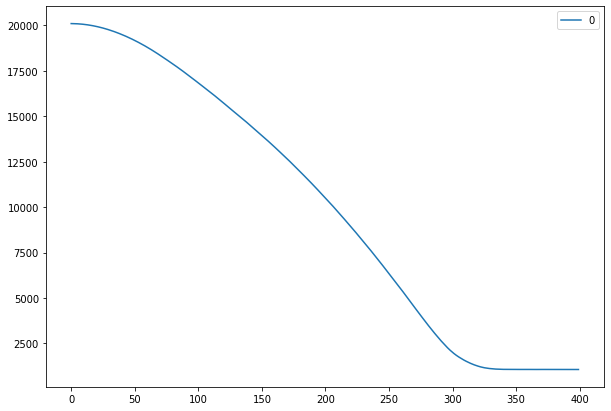

In [195]:
pd.DataFrame(history_normalized_1.history['val_mae']).plot(figsize=(10,7));

In [196]:
# Evaluate model on test data
# test_windows_normed = scaler.transform(test_windows)
model_1_normalized.evaluate(test_windows_normed, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1069.4312 - mae: 1069.4312 - mse: 3662451.5000


[1069.43115234375, 1069.43115234375, 3662451.5]

In [197]:
# Load in saved best performing model_1 and evaluate it on test data
model_1_normalized = tf.keras.models.load_model("model_experiments/model_1_dense_normed/")
model_1_normalized.evaluate(test_windows_normed, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1068.9489 - mae: 1068.9489 - mse: 3662814.0000


[1068.9488525390625, 1068.9488525390625, 3662814.0]

In [198]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [199]:
# test_windows_normed = scaler.transform(test_windows)

In [200]:
# Make predictions using model_1 on the test dataset and view results
model_1_norm_preds = make_preds(model_1_normalized, test_windows_normed) 
len(model_1_norm_preds), model_1_preds[:10]

# Evaluate preds
model_1_norm_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_norm_preds)
model_1_norm_results

18/18 [==============================] - 0s 2ms/step


{'mae': 1068.9489,
 'mse': 3662813.8,
 'rmse': 1913.8479,
 'mape': 4.7235003,
 'mase': 1.8778471}

In [201]:
model_1_results

{'mae': 563.34,
 'mse': 1154239.2,
 'rmse': 1074.3552,
 'mape': 2.52723,
 'mase': 0.98963237}

In [202]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

#### Model 5

In [203]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5_normed = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM_normed")

# Compile
model_5_normed.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
history_5_normed = model_5_normed.fit(train_windows_normed,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows_normed, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5_normed.name)])

Epoch 1/100
18/18 [==============================] - 4s 115ms/step - loss: 3158.3398 - val_loss: 20095.8906
Epoch 2/100
18/18 [==============================] - 3s 174ms/step - loss: 3158.2229 - val_loss: 20095.1191
Epoch 3/100
18/18 [==============================] - 2s 103ms/step - loss: 3158.0510 - val_loss: 20093.7227
Epoch 4/100
18/18 [==============================] - 2s 101ms/step - loss: 3157.7979 - val_loss: 20091.4316
Epoch 5/100
18/18 [==============================] - 2s 97ms/step - loss: 3157.4346 - val_loss: 20088.0723
Epoch 6/100
18/18 [==============================] - 2s 98ms/step - loss: 3156.9282 - val_loss: 20083.6113
Epoch 7/100
18/18 [==============================] - 2s 99ms/step - loss: 3156.2522 - val_loss: 20077.9883
Epoch 8/100
18/18 [==============================] - 2s 116ms/step - loss: 3155.3582 - val_loss: 20071.2031
Epoch 9/100
18/18 [==============================] - 2s 130ms/step - loss: 3154.2341 - val_loss: 20063.1270
Epoch 10/100
18/18 [===========

In [204]:
# Load in best version of model 5 and evaluate on the test data
model_5_normed = tf.keras.models.load_model("model_experiments/model_5_LSTM_normed")
model_5_normed.evaluate(test_windows_normed, test_labels)

#Make prediction with our LSTM model
model_5_preds_normed = make_preds(model_5_normed, test_windows_normed)
# model_5_preds_normed[:5]

# Evaluate model 5 predictions
model_5_results_normed = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds_normed)
model_5_results_normed

18/18 [==============================] - 0s 2ms/step


{'mae': 15949.222,
 'mse': 459569860.0,
 'rmse': 21437.58,
 'mape': 77.69316,
 'mase': 28.018366}

In [205]:
model_5_results

{'mae': 583.4415,
 'mse': 1215595.9,
 'rmse': 1102.5406,
 'mape': 2.618372,
 'mase': 1.0249451}

## 2 . Predict Bitcoin Data

Get the most up to date data on Bitcoin, train a model & see how it goes (our data goes up to May 18 2021).
You can download the Bitcoin historical data for free from coindesk.com/price/bitcoin and clicking "Export Data" -> "CSV".

### Import Bitcoin Data and Preprocess

In [207]:
import pandas as pd
bitcoin_df = pd.read_csv('/content/BTC-USD.csv',
                 parse_dates=["Date"],
                 index_col=["Date"])

In [208]:
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [209]:
# Get bitcoin date array
timesteps = bitcoin_df.index.to_numpy()
prices = bitcoin_df.iloc[:,3].to_numpy()
prices

array([  457.334015,   424.440002,   394.79599 , ..., 22955.666016,
       22760.109375, 22931.646484])

In [210]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2452, 614, 2452, 614)

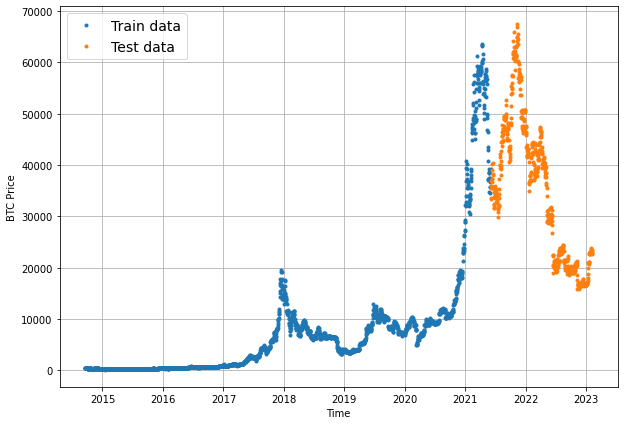

In [211]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [212]:
# Make Windows and Labels
WINDOW_SIZE = 7
HORIZON = 1
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3059, 3059)

In [213]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2447, 612, 2447, 612)

In [214]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

### Fit a model similar to Model 01

In [215]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

#1. Construct model
model_1_bitcoin = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")# linear activation is the same as having no activation               
], name="model_1_dense_bitcoin") # name our model so we can save it

#2.Compile the model
model_1_bitcoin.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae","mse"])

#3. Fit the model
history_1_bitcoin  = model_1_bitcoin.fit(x=train_windows,
            y=train_labels,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1_bitcoin.name)])

Epoch 1/200
16/20 [=======================>......] - ETA: 0s - loss: 2664.2395 - mae: 2664.2395 - mse: 34817448.0000  

20/20 [==============================] - 2s 48ms/step - loss: 2387.0142 - mae: 2387.0142 - mse: 29767650.0000 - val_loss: 5264.7720 - val_mae: 5264.7720 - val_mse: 35100212.0000
Epoch 2/200
14/20 [====================>.........] - ETA: 0s - loss: 655.6265 - mae: 655.6265 - mse: 1836708.2500  

20/20 [==============================] - 1s 37ms/step - loss: 599.4298 - mae: 599.4298 - mse: 1664610.7500 - val_loss: 2057.5852 - val_mae: 2057.5852 - val_mse: 6837390.0000
Epoch 3/200
14/20 [====================>.........] - ETA: 0s - loss: 422.6396 - mae: 422.6396 - mse: 956798.3125

20/20 [==============================] - 1s 35ms/step - loss: 396.5633 - mae: 396.5633 - mse: 882435.1250 - val_loss: 1435.3140 - val_mae: 1435.3140 - val_mse: 3826997.5000
Epoch 4/200
15/20 [=====================>........] - ETA: 0s - loss: 326.2695 - mae: 326.2695 - mse: 684830.5625

20/20 [==============================] - 1s 26ms/step - loss: 323.9778 - mae: 323.9778 - mse: 667672.8125 - val_loss: 1105.3291 - val_mae: 1105.3291 - val_mse: 2476894.0000
Epoch 5/200
19/20 [===========================>..] - ETA: 0s - loss: 311.8761 - mae: 311.8761 - mse: 598151.3125

20/20 [==============================] - 0s 25ms/step - loss: 310.8102 - mae: 310.8102 - mse: 594803.2500 - val_loss: 1057.2139 - val_mae: 1057.2139 - val_mse: 2280159.2500
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 295.4734 - mae: 295.4734 - mse: 552243.3125 - val_loss: 1106.3660 - val_mae: 1106.3660 - val_mse: 2465269.5000
Epoch 7/200
20/20 [==============================] - 0s 5ms/step - loss: 288.6772 - mae: 288.6772 - mse: 533491.2500 - val_loss: 1108.3616 - val_mae: 1108.3616 - val_mse: 2467342.5000
Epoch 8/200
20/20 [==============================] - ETA: 0s - loss: 287.1658 - mae: 287.1658 - mse: 538237.9375 

20/20 [==============================] - 0s 25ms/step - loss: 287.1658 - mae: 287.1658 - mse: 538237.9375 - val_loss: 1036.7832 - val_mae: 1036.7832 - val_mse: 2208124.2500
Epoch 9/200
20/20 [==============================] - 0s 6ms/step - loss: 279.7861 - mae: 279.7861 - mse: 503529.3125 - val_loss: 1171.0978 - val_mae: 1171.0978 - val_mse: 2585602.0000
Epoch 10/200
19/20 [===========================>..] - ETA: 0s - loss: 294.4906 - mae: 294.4906 - mse: 532572.8125

20/20 [==============================] - 0s 26ms/step - loss: 294.0790 - mae: 294.0790 - mse: 530371.2500 - val_loss: 981.9814 - val_mae: 981.9814 - val_mse: 1997857.6250
Epoch 11/200
19/20 [===========================>..] - ETA: 0s - loss: 285.1830 - mae: 285.1830 - mse: 491564.5938

20/20 [==============================] - 0s 25ms/step - loss: 284.9884 - mae: 284.9884 - mse: 492069.6562 - val_loss: 980.3583 - val_mae: 980.3583 - val_mse: 1981010.6250
Epoch 12/200
20/20 [==============================] - 0s 5ms/step - loss: 265.0559 - mae: 265.0559 - mse: 470253.6250 - val_loss: 994.7139 - val_mae: 994.7139 - val_mse: 2057935.8750
Epoch 13/200
20/20 [==============================] - 0s 5ms/step - loss: 267.4719 - mae: 267.4719 - mse: 475294.8125 - val_loss: 1847.8071 - val_mae: 1847.8071 - val_mse: 5468302.0000
Epoch 14/200
20/20 [==============================] - 0s 5ms/step - loss: 328.5264 - mae: 328.5264 - mse: 571729.1250 - val_loss: 991.1902 - val_mae: 991.1902 - val_mse: 2044976.5000
Epoch 15/200
20/20 [==============================] - 0s 5ms/step - loss: 271.2793 - mae: 271.2793 - mse: 475027.0938 - val_loss: 1031.9934 - val_mae: 1031.9934 - val_mse: 2098202.2500
Epoch 16/200
17/20 [========================>.....] - ETA: 0s - loss: 278.9821 - mae: 278.982

20/20 [==============================] - 0s 25ms/step - loss: 277.2837 - mae: 277.2837 - mse: 484604.6562 - val_loss: 962.5725 - val_mae: 962.5725 - val_mse: 1951344.1250
Epoch 17/200
17/20 [========================>.....] - ETA: 0s - loss: 260.3123 - mae: 260.3123 - mse: 450394.1875

20/20 [==============================] - 1s 26ms/step - loss: 259.7575 - mae: 259.7575 - mse: 445140.4688 - val_loss: 945.2715 - val_mae: 945.2715 - val_mse: 1886240.0000
Epoch 18/200
20/20 [==============================] - 0s 6ms/step - loss: 272.3578 - mae: 272.3578 - mse: 480628.2188 - val_loss: 979.1628 - val_mae: 979.1628 - val_mse: 1943792.7500
Epoch 19/200
20/20 [==============================] - 0s 5ms/step - loss: 261.2312 - mae: 261.2312 - mse: 451281.8750 - val_loss: 1014.2377 - val_mae: 1014.2377 - val_mse: 2043182.3750
Epoch 20/200
19/20 [===========================>..] - ETA: 0s - loss: 262.8064 - mae: 262.8064 - mse: 439724.5312 

20/20 [==============================] - 1s 28ms/step - loss: 261.8380 - mae: 261.8380 - mse: 437204.0625 - val_loss: 931.4149 - val_mae: 931.4149 - val_mse: 1840827.6250
Epoch 21/200
20/20 [==============================] - 0s 5ms/step - loss: 257.0238 - mae: 257.0238 - mse: 423071.1250 - val_loss: 1016.7694 - val_mae: 1016.7694 - val_mse: 2100275.7500
Epoch 22/200
20/20 [==============================] - 0s 5ms/step - loss: 253.8247 - mae: 253.8247 - mse: 434139.2188 - val_loss: 993.6145 - val_mae: 993.6145 - val_mse: 2032346.1250
Epoch 23/200
19/20 [===========================>..] - ETA: 0s - loss: 254.1196 - mae: 254.1196 - mse: 433446.6562

20/20 [==============================] - 0s 25ms/step - loss: 253.6215 - mae: 253.6215 - mse: 431244.0312 - val_loss: 923.9901 - val_mae: 923.9901 - val_mse: 1817837.3750
Epoch 24/200
20/20 [==============================] - 0s 5ms/step - loss: 262.6221 - mae: 262.6221 - mse: 444500.9375 - val_loss: 1304.2214 - val_mae: 1304.2214 - val_mse: 3096534.7500
Epoch 25/200
20/20 [==============================] - 0s 6ms/step - loss: 271.7180 - mae: 271.7180 - mse: 453248.8750 - val_loss: 1029.7544 - val_mae: 1029.7544 - val_mse: 2131632.5000
Epoch 26/200
20/20 [==============================] - 0s 5ms/step - loss: 268.8892 - mae: 268.8892 - mse: 465898.5000 - val_loss: 1005.3794 - val_mae: 1005.3794 - val_mse: 2014208.3750
Epoch 27/200
17/20 [========================>.....] - ETA: 0s - loss: 254.2561 - mae: 254.2561 - mse: 422078.0000

20/20 [==============================] - 1s 28ms/step - loss: 256.3632 - mae: 256.3632 - mse: 437133.6562 - val_loss: 919.4860 - val_mae: 919.4860 - val_mse: 1797267.5000
Epoch 28/200
20/20 [==============================] - 0s 5ms/step - loss: 267.1890 - mae: 267.1890 - mse: 456812.7500 - val_loss: 933.8873 - val_mae: 933.8873 - val_mse: 1861677.1250
Epoch 29/200
20/20 [==============================] - 0s 5ms/step - loss: 279.2668 - mae: 279.2668 - mse: 484130.1562 - val_loss: 1518.8116 - val_mae: 1518.8116 - val_mse: 3753723.5000
Epoch 30/200
20/20 [==============================] - 0s 5ms/step - loss: 308.1135 - mae: 308.1135 - mse: 576149.6875 - val_loss: 1447.7697 - val_mae: 1447.7697 - val_mse: 3477999.7500
Epoch 31/200
18/20 [==========================>...] - ETA: 0s - loss: 282.1594 - mae: 282.1594 - mse: 471624.8438

20/20 [==============================] - 0s 25ms/step - loss: 282.5573 - mae: 282.5573 - mse: 502027.1875 - val_loss: 919.2938 - val_mae: 919.2938 - val_mse: 1791398.7500
Epoch 32/200
20/20 [==============================] - 0s 5ms/step - loss: 258.0235 - mae: 258.0235 - mse: 435290.6562 - val_loss: 1059.6881 - val_mae: 1059.6881 - val_mse: 2212553.5000
Epoch 33/200
20/20 [==============================] - 0s 5ms/step - loss: 245.7677 - mae: 245.7677 - mse: 406688.9375 - val_loss: 1001.8671 - val_mae: 1001.8671 - val_mse: 2003893.1250
Epoch 34/200
20/20 [==============================] - 0s 5ms/step - loss: 258.1565 - mae: 258.1565 - mse: 441217.6250 - val_loss: 1019.4077 - val_mae: 1019.4077 - val_mse: 2088596.8750
Epoch 35/200
20/20 [==============================] - 0s 5ms/step - loss: 249.1452 - mae: 249.1452 - mse: 405660.6562 - val_loss: 928.2310 - val_mae: 928.2310 - val_mse: 1802791.1250
Epoch 36/200
20/20 [==============================] - 0s 5ms/step - loss: 246.9457 - mae: 2

20/20 [==============================] - 0s 25ms/step - loss: 248.2267 - mae: 248.2267 - mse: 418221.6875 - val_loss: 902.3756 - val_mae: 902.3756 - val_mse: 1760515.3750
Epoch 39/200
20/20 [==============================] - 0s 5ms/step - loss: 244.6597 - mae: 244.6597 - mse: 397632.2500 - val_loss: 1128.1852 - val_mae: 1128.1852 - val_mse: 2366542.7500
Epoch 40/200
20/20 [==============================] - 0s 5ms/step - loss: 281.2872 - mae: 281.2872 - mse: 484696.3438 - val_loss: 974.8480 - val_mae: 974.8480 - val_mse: 1924921.7500
Epoch 41/200
20/20 [==============================] - 0s 5ms/step - loss: 252.9464 - mae: 252.9464 - mse: 426487.6562 - val_loss: 923.2374 - val_mae: 923.2374 - val_mse: 1830066.6250
Epoch 42/200
20/20 [==============================] - 0s 5ms/step - loss: 247.5081 - mae: 247.5081 - mse: 417821.6250 - val_loss: 996.8085 - val_mae: 996.8085 - val_mse: 2019963.6250
Epoch 43/200
20/20 [==============================] - 0s 5ms/step - loss: 248.3654 - mae: 248.3

20/20 [==============================] - 0s 25ms/step - loss: 253.8164 - mae: 253.8164 - mse: 419788.4375 - val_loss: 899.5814 - val_mae: 899.5814 - val_mse: 1768286.3750
Epoch 47/200
20/20 [==============================] - 0s 6ms/step - loss: 243.7107 - mae: 243.7107 - mse: 405259.5625 - val_loss: 902.6224 - val_mae: 902.6224 - val_mse: 1776458.0000
Epoch 48/200
13/20 [==================>...........] - ETA: 0s - loss: 233.4915 - mae: 233.4915 - mse: 396186.0625

20/20 [==============================] - 2s 104ms/step - loss: 244.8020 - mae: 244.8020 - mse: 411680.4688 - val_loss: 895.9794 - val_mae: 895.9794 - val_mse: 1759629.7500
Epoch 49/200
20/20 [==============================] - ETA: 0s - loss: 249.8252 - mae: 249.8252 - mse: 418499.4688

20/20 [==============================] - 1s 67ms/step - loss: 249.8252 - mae: 249.8252 - mse: 418499.4688 - val_loss: 887.6807 - val_mae: 887.6807 - val_mse: 1730970.8750
Epoch 50/200
20/20 [==============================] - 0s 5ms/step - loss: 241.1431 - mae: 241.1431 - mse: 396547.8125 - val_loss: 1091.1542 - val_mae: 1091.1542 - val_mse: 2298650.7500
Epoch 51/200
20/20 [==============================] - 0s 5ms/step - loss: 272.2243 - mae: 272.2243 - mse: 456970.4688 - val_loss: 1009.2499 - val_mae: 1009.2499 - val_mse: 2052214.7500
Epoch 52/200
20/20 [==============================] - 0s 5ms/step - loss: 260.4489 - mae: 260.4489 - mse: 434576.7500 - val_loss: 1085.2169 - val_mae: 1085.2169 - val_mse: 2228518.2500
Epoch 53/200
16/20 [=======================>......] - ETA: 0s - loss: 253.3575 - mae: 253.3575 - mse: 398433.5312

20/20 [==============================] - 1s 63ms/step - loss: 253.3443 - mae: 253.3443 - mse: 408609.8750 - val_loss: 881.5955 - val_mae: 881.5955 - val_mse: 1720997.0000
Epoch 54/200
20/20 [==============================] - 0s 5ms/step - loss: 250.8329 - mae: 250.8329 - mse: 413274.9062 - val_loss: 967.0815 - val_mae: 967.0815 - val_mse: 1935322.1250
Epoch 55/200
20/20 [==============================] - 0s 5ms/step - loss: 247.7292 - mae: 247.7292 - mse: 407529.7188 - val_loss: 884.4493 - val_mae: 884.4493 - val_mse: 1711617.6250
Epoch 56/200
20/20 [==============================] - 0s 6ms/step - loss: 252.3325 - mae: 252.3325 - mse: 438021.6250 - val_loss: 972.3268 - val_mae: 972.3268 - val_mse: 1913472.0000
Epoch 57/200
20/20 [==============================] - 0s 5ms/step - loss: 241.6223 - mae: 241.6223 - mse: 388173.6250 - val_loss: 889.9139 - val_mae: 889.9139 - val_mse: 1717361.0000
Epoch 58/200
20/20 [==============================] - ETA: 0s - loss: 250.0825 - mae: 250.0825 - 

20/20 [==============================] - 1s 26ms/step - loss: 250.0825 - mae: 250.0825 - mse: 396882.2500 - val_loss: 878.1511 - val_mae: 878.1511 - val_mse: 1707365.3750
Epoch 59/200
20/20 [==============================] - 0s 5ms/step - loss: 238.8639 - mae: 238.8639 - mse: 390844.0625 - val_loss: 968.7964 - val_mae: 968.7964 - val_mse: 1938507.2500
Epoch 60/200
20/20 [==============================] - 0s 5ms/step - loss: 241.4247 - mae: 241.4247 - mse: 393014.0312 - val_loss: 894.3014 - val_mae: 894.3014 - val_mse: 1752016.8750
Epoch 61/200
20/20 [==============================] - 0s 5ms/step - loss: 251.2269 - mae: 251.2269 - mse: 427805.5000 - val_loss: 901.8366 - val_mae: 901.8366 - val_mse: 1770328.2500
Epoch 62/200
20/20 [==============================] - 0s 5ms/step - loss: 261.8257 - mae: 261.8257 - mse: 440391.2500 - val_loss: 1035.4102 - val_mae: 1035.4102 - val_mse: 2083870.7500
Epoch 63/200
20/20 [==============================] - 0s 6ms/step - loss: 275.0769 - mae: 275.0

20/20 [==============================] - 1s 27ms/step - loss: 255.2046 - mae: 255.2046 - mse: 417956.5000 - val_loss: 874.9598 - val_mae: 874.9598 - val_mse: 1705973.2500
Epoch 68/200
20/20 [==============================] - 0s 5ms/step - loss: 258.3952 - mae: 258.3952 - mse: 428783.5000 - val_loss: 907.3489 - val_mae: 907.3489 - val_mse: 1784149.5000
Epoch 69/200
20/20 [==============================] - 0s 6ms/step - loss: 271.5839 - mae: 271.5839 - mse: 432772.7188 - val_loss: 903.9208 - val_mae: 903.9208 - val_mse: 1742585.1250
Epoch 70/200
20/20 [==============================] - 0s 5ms/step - loss: 266.9455 - mae: 266.9455 - mse: 442344.0312 - val_loss: 1034.3672 - val_mae: 1034.3672 - val_mse: 2076649.0000
Epoch 71/200
20/20 [==============================] - 0s 5ms/step - loss: 262.9601 - mae: 262.9601 - mse: 444946.8750 - val_loss: 1137.0265 - val_mae: 1137.0266 - val_mse: 2439309.2500
Epoch 72/200
20/20 [==============================] - 0s 5ms/step - loss: 258.3441 - mae: 258

20/20 [==============================] - 0s 26ms/step - loss: 242.6509 - mae: 242.6509 - mse: 408935.6250 - val_loss: 874.1682 - val_mae: 874.1682 - val_mse: 1686910.8750
Epoch 80/200
20/20 [==============================] - 0s 5ms/step - loss: 237.0316 - mae: 237.0316 - mse: 392304.7188 - val_loss: 912.1370 - val_mae: 912.1370 - val_mse: 1792998.5000
Epoch 81/200
20/20 [==============================] - 0s 5ms/step - loss: 242.2351 - mae: 242.2351 - mse: 407774.3750 - val_loss: 1062.1466 - val_mae: 1062.1466 - val_mse: 2154078.7500
Epoch 82/200
20/20 [==============================] - 0s 6ms/step - loss: 269.9745 - mae: 269.9745 - mse: 458138.4062 - val_loss: 1012.5478 - val_mae: 1012.5478 - val_mse: 2060678.5000
Epoch 83/200
16/20 [=======================>......] - ETA: 0s - loss: 251.0027 - mae: 251.0027 - mse: 402738.0000

20/20 [==============================] - 1s 27ms/step - loss: 253.0770 - mae: 253.0770 - mse: 422504.1875 - val_loss: 869.3934 - val_mae: 869.3934 - val_mse: 1682111.1250
Epoch 84/200
20/20 [==============================] - 0s 6ms/step - loss: 250.5716 - mae: 250.5716 - mse: 416295.3750 - val_loss: 909.2905 - val_mae: 909.2905 - val_mse: 1753543.3750
Epoch 85/200
20/20 [==============================] - 0s 6ms/step - loss: 242.9312 - mae: 242.9312 - mse: 395648.6875 - val_loss: 910.9617 - val_mae: 910.9617 - val_mse: 1757001.3750
Epoch 86/200
20/20 [==============================] - 0s 6ms/step - loss: 238.1501 - mae: 238.1501 - mse: 396135.2500 - val_loss: 1036.8774 - val_mae: 1036.8774 - val_mse: 2131355.7500
Epoch 87/200
20/20 [==============================] - 0s 5ms/step - loss: 244.5111 - mae: 244.5111 - mse: 397303.7188 - val_loss: 887.3509 - val_mae: 887.3509 - val_mse: 1705821.3750
Epoch 88/200
20/20 [==============================] - 0s 5ms/step - loss: 239.3477 - mae: 239.3

20/20 [==============================] - 1s 27ms/step - loss: 246.2112 - mae: 246.2112 - mse: 413940.1250 - val_loss: 866.6740 - val_mae: 866.6740 - val_mse: 1674674.8750
Epoch 94/200
20/20 [==============================] - 0s 5ms/step - loss: 238.8788 - mae: 238.8788 - mse: 396579.7812 - val_loss: 881.3950 - val_mae: 881.3950 - val_mse: 1716811.7500
Epoch 95/200
20/20 [==============================] - 0s 6ms/step - loss: 246.8949 - mae: 246.8949 - mse: 417305.1875 - val_loss: 1116.4081 - val_mae: 1116.4081 - val_mse: 2369730.7500
Epoch 96/200
20/20 [==============================] - 0s 5ms/step - loss: 238.9956 - mae: 238.9956 - mse: 384767.7188 - val_loss: 1113.4159 - val_mae: 1113.4159 - val_mse: 2300598.2500
Epoch 97/200
20/20 [==============================] - 0s 5ms/step - loss: 252.0265 - mae: 252.0265 - mse: 404335.3750 - val_loss: 1358.0659 - val_mae: 1358.0659 - val_mse: 3212581.0000
Epoch 98/200
20/20 [==============================] - 0s 5ms/step - loss: 287.0936 - mae: 2

20/20 [==============================] - 0s 26ms/step - loss: 241.7167 - mae: 241.7167 - mse: 397314.0000 - val_loss: 860.7725 - val_mae: 860.7725 - val_mse: 1660432.2500
Epoch 124/200
20/20 [==============================] - 0s 5ms/step - loss: 241.0877 - mae: 241.0877 - mse: 400511.0938 - val_loss: 933.4753 - val_mae: 933.4753 - val_mse: 1805979.3750
Epoch 125/200
19/20 [===========================>..] - ETA: 0s - loss: 249.8892 - mae: 249.8892 - mse: 429871.2812

20/20 [==============================] - 1s 26ms/step - loss: 250.3602 - mae: 250.3602 - mse: 429918.8125 - val_loss: 858.6570 - val_mae: 858.6570 - val_mse: 1652822.7500
Epoch 126/200
20/20 [==============================] - 0s 5ms/step - loss: 235.9709 - mae: 235.9709 - mse: 386549.3750 - val_loss: 974.7745 - val_mae: 974.7745 - val_mse: 1953296.3750
Epoch 127/200
20/20 [==============================] - 0s 6ms/step - loss: 243.8908 - mae: 243.8908 - mse: 395922.1875 - val_loss: 891.7352 - val_mae: 891.7352 - val_mse: 1709133.8750
Epoch 128/200
20/20 [==============================] - 0s 5ms/step - loss: 244.6876 - mae: 244.6876 - mse: 401479.6562 - val_loss: 925.8313 - val_mae: 925.8313 - val_mse: 1821121.8750
Epoch 129/200
20/20 [==============================] - 0s 5ms/step - loss: 263.6014 - mae: 263.6014 - mse: 448052.8438 - val_loss: 926.3580 - val_mae: 926.3580 - val_mse: 1821296.7500
Epoch 130/200
20/20 [==============================] - 0s 5ms/step - loss: 238.4339 - mae: 23

20/20 [==============================] - 0s 25ms/step - loss: 244.9308 - mae: 244.9308 - mse: 390760.8125 - val_loss: 857.7814 - val_mae: 857.7814 - val_mse: 1646220.5000
Epoch 136/200
20/20 [==============================] - 0s 5ms/step - loss: 242.0662 - mae: 242.0662 - mse: 395024.4375 - val_loss: 919.5584 - val_mae: 919.5584 - val_mse: 1802344.7500
Epoch 137/200
20/20 [==============================] - 0s 5ms/step - loss: 238.4162 - mae: 238.4162 - mse: 390457.9688 - val_loss: 884.8351 - val_mae: 884.8351 - val_mse: 1714216.5000
Epoch 138/200
20/20 [==============================] - 0s 5ms/step - loss: 235.5363 - mae: 235.5363 - mse: 379280.0312 - val_loss: 860.1948 - val_mae: 860.1948 - val_mse: 1652174.2500
Epoch 139/200
20/20 [==============================] - 0s 5ms/step - loss: 234.8351 - mae: 234.8351 - mse: 384587.7500 - val_loss: 860.4280 - val_mae: 860.4280 - val_mse: 1648501.1250
Epoch 140/200
20/20 [==============================] - 0s 5ms/step - loss: 233.3957 - mae: 23

20/20 [==============================] - 0s 25ms/step - loss: 238.4395 - mae: 238.4395 - mse: 390275.0312 - val_loss: 857.7790 - val_mae: 857.7790 - val_mse: 1646980.1250
Epoch 144/200
20/20 [==============================] - 0s 5ms/step - loss: 237.2502 - mae: 237.2502 - mse: 392453.9688 - val_loss: 1201.4050 - val_mae: 1201.4050 - val_mse: 2566922.2500
Epoch 145/200
20/20 [==============================] - 0s 6ms/step - loss: 274.5425 - mae: 274.5425 - mse: 463834.6562 - val_loss: 923.1805 - val_mae: 923.1805 - val_mse: 1780440.5000
Epoch 146/200
20/20 [==============================] - 0s 6ms/step - loss: 235.0969 - mae: 235.0969 - mse: 383540.8438 - val_loss: 858.3264 - val_mae: 858.3264 - val_mse: 1645527.1250
Epoch 147/200
20/20 [==============================] - 0s 5ms/step - loss: 240.5994 - mae: 240.5994 - mse: 386555.6250 - val_loss: 860.7414 - val_mae: 860.7414 - val_mse: 1647159.3750
Epoch 148/200
20/20 [==============================] - 0s 6ms/step - loss: 251.7343 - mae: 

20/20 [==============================] - 1s 27ms/step - loss: 245.3548 - mae: 245.3548 - mse: 391672.4062 - val_loss: 857.3424 - val_mae: 857.3424 - val_mse: 1642144.3750
Epoch 161/200
20/20 [==============================] - 0s 5ms/step - loss: 248.7901 - mae: 248.7901 - mse: 420921.7500 - val_loss: 1043.7223 - val_mae: 1043.7223 - val_mse: 2143528.7500
Epoch 162/200
20/20 [==============================] - 0s 5ms/step - loss: 242.0508 - mae: 242.0508 - mse: 408382.9688 - val_loss: 1135.5270 - val_mae: 1135.5270 - val_mse: 2423032.2500
Epoch 163/200
20/20 [==============================] - 0s 5ms/step - loss: 276.5317 - mae: 276.5317 - mse: 470186.1562 - val_loss: 861.1652 - val_mae: 861.1652 - val_mse: 1654228.3750
Epoch 164/200
20/20 [==============================] - 0s 5ms/step - loss: 246.9521 - mae: 246.9521 - mse: 392372.5312 - val_loss: 1059.8959 - val_mae: 1059.8959 - val_mse: 2127809.7500
Epoch 165/200
20/20 [==============================] - 0s 5ms/step - loss: 259.0111 - m

In [216]:
# Evaluate model
model_1_bitcoin.evaluate(test_windows,test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 886.8696 - mae: 886.8696 - mse: 1695508.8750


[886.8695678710938, 886.8695678710938, 1695508.875]

In [217]:
# Make predictions using model_1 on the test dataset and view results
model_1_bitcoin_preds = make_preds(model_1_bitcoin, test_windows) 

# Evaluate preds
model_1_bitcoin_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_bitcoin_preds)
model_1_bitcoin_results

20/20 [==============================] - 0s 2ms/step


{'mae': 886.8695,
 'mse': 1695509.0,
 'rmse': 1302.1171,
 'mape': 2.5065904,
 'mase': 1.0448555}

## 3 . Experimenting with different window sizes

For most of our models we used WINDOW_SIZE=7, but is there a better window size?
Setup a series of experiments to find whether or not there's a better window size.
For example, you might train 10 different models with HORIZON=1 but with window sizes ranging from 2-12.

### Experiment 1 : Window size = 2



In [218]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 2 

In [219]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3064, 3064)

In [220]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2451, 613, 2451, 613)

In [221]:
tf.random.set_seed(42)

# Create model
model_2_ex_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2_ex_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
history_2_ex_1 = model_2_ex_1.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2_ex_1.name)])

In [222]:
# Evaluate model 2 on test data
model_2_ex_1.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 882.5634


882.5634155273438

In [223]:
# Load in the best performing model
model_2_ex_1 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2_ex_1.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 848.4730


848.4729614257812

In [224]:
# Get forecast predictions
model_2_ex_1_preds = make_preds(model_2_ex_1,
                           input_data=test_windows)

20/20 [==============================] - 0s 2ms/step


In [225]:
# Evaluate results for model 2 predictions
model_2_ex_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_ex_1_preds)
model_2_ex_1_results

{'mae': 848.47296,
 'mse': 1619950.0,
 'rmse': 1272.7726,
 'mape': 2.3998077,
 'mase': 1.000656}

In [226]:
model_1_results

{'mae': 563.34,
 'mse': 1154239.2,
 'rmse': 1074.3552,
 'mape': 2.52723,
 'mase': 0.98963237}

### Experiment 2 : Window size = 3

In [227]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 3

In [228]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3063, 3063)

In [229]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2450, 613, 2450, 613)

In [230]:
tf.random.set_seed(42)

# Create model
model_2_ex_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense_ex_2")

# Compile
model_2_ex_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
history_2_ex_2 = model_2_ex_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2_ex_2.name)])

In [231]:
# Evaluate model 2 on test data
model_2_ex_2.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 869.3298


869.329833984375

In [232]:
# Load in the best performing model
model_2_ex_2 = tf.keras.models.load_model("model_experiments/model_2_dense_ex_2/")
model_2_ex_2.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 853.2501


853.2500610351562

In [233]:
# Get forecast predictions
model_2_ex_2_preds = make_preds(model_2_ex_2,
                           input_data=test_windows)

# Evaluate results for model 2 predictions
model_2_ex_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_ex_2_preds)
model_2_ex_2_results

20/20 [==============================] - 0s 2ms/step


{'mae': 853.25,
 'mse': 1631560.9,
 'rmse': 1277.3257,
 'mape': 2.4107246,
 'mase': 1.0062898}

### Experiment 3 : Window size = 12

In [234]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 12

In [235]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3054, 3054)

In [236]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2443, 611, 2443, 611)

In [237]:
tf.random.set_seed(42)

# Create model
model_2_ex_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense_ex_3")

# Compile
model_2_ex_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
history_2_ex_3 = model_2_ex_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2_ex_3.name)])

In [238]:
# Evaluate model 2 on test data
model_2_ex_3.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 922.6542


922.6542358398438

In [239]:
# Load in the best performing model
model_2_ex_3 = tf.keras.models.load_model("model_experiments/model_2_dense_ex_3/")
model_2_ex_3.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 918.8184


918.8184204101562

In [240]:
# Get forecast predictions
model_2_ex_3_preds = make_preds(model_2_ex_3,
                           input_data=test_windows)

# Evaluate results for model 2 predictions
model_2_ex_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_ex_3_preds)
model_2_ex_3_results

20/20 [==============================] - 0s 2ms/step


{'mae': 918.81854,
 'mse': 1828714.0,
 'rmse': 1352.2996,
 'mape': 2.606733,
 'mase': 1.0855418}

In [241]:
# Combine model results into a DataFrame
all_models_results = pd.DataFrame({
                                   '1_dense': model_1_results,
                                   '2_dense': model_2_results,
                                   '3_dense': model_3_results,
                                   '4_convo1d': model_4_results,
                                   '5_LSTM': model_5_results,
                                   '6_Multivariate': model_6_results,
                                   '7_N-Beats': model_7_results,
                                   '8_ensemble': ensemble_results,
                                   '2_ex_1': model_2_ex_1_results,
                                   '2_ex_2': model_2_ex_2_results,
                                   '2_ex_3': model_2_ex_3_results,})


all_models_results = all_models_results.transpose()
all_models_results

,mae,mse,rmse,mape,mase
1_dense,563.340027,1154239.250,1074.355225,2.527230,0.989632
2_dense,611.443848,1310876.875,1144.935303,2.747937,1.068810
3_dense,1248.652832,5392785.500,1434.328247,5.638714,2.221908
4_convo1d,571.401184,1182668.500,1087.505615,2.549116,1.003794
5_LSTM,583.441528,1215595.875,1102.540649,2.618372,1.024945
6_Multivariate,563.014893,1152873.625,1073.719482,2.511855,0.989061
7_N-Beats,571.167419,1169350.500,1081.365112,2.588869,1.003383
8_ensemble,570.420715,1151014.875,1072.853638,2.590415,1.002071
2_ex_1,848.472961,1619950.000,1272.772583,2.399808,1.000656
2_ex_2,853.250000,1631560.875,1277.325684,2.410725,1.006290


## 4 . Using timeseries_dataset_from_array()


Create a windowed dataset just like the ones we used for model_1 using tf.keras.preprocessing.timeseries_dataset_from_array() and retrain model_1 using the recreated dataset.


#### Create windows and targets

In [242]:
input_data = prices[:-7]
targets = prices[7:]

dataset_2 = tf.keras.utils.timeseries_dataset_from_array(
    input_data,
    targets,
    sequence_length=7,
    sequence_stride=1,
    sampling_rate=1,
    batch_size=None,
    shuffle=False,
    seed=None,
    start_index=None,
    end_index=None
)

In [243]:
full_input_windows_2 = []
full_target_labels_2 = []

for batch in dataset_2:
  inputs, targets = batch
  # print(inputs.shape)
  full_input_windows_2.append(inputs.numpy())
  full_target_labels_2.append(targets.numpy())

In [244]:
# Convert the lists to numpy array
full_input_windows_2 = np.array(full_input_windows_2)
full_target_labels_2 = np.array(full_target_labels_2)

In [245]:
len(full_target_labels_2) , len(full_labels)

(3053, 3054)

#### Split the data

In [246]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_input_windows_2, full_target_labels_2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2442, 611, 2442, 611)

#### Fit the model

In [247]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

#1. Construct model
model_1_dataset_from_array = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")# linear activation is the same as having no activation               
], name="model_1_dataset_from_array") # name our model so we can save it

#2.Compile the model
model_1_dataset_from_array.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae","mse"])

#3. Fit the model
history_1_dataset_from_array = model_1_dataset_from_array.fit(x=train_windows,
            y=train_labels,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1_dataset_from_array.name)])

Epoch 1/200
18/20 [==========================>...] - ETA: 0s - loss: 2660.6960 - mae: 2660.6960 - mse: 35906228.0000  

20/20 [==============================] - 1s 34ms/step - loss: 2585.1555 - mae: 2585.1555 - mse: 34226032.0000 - val_loss: 5419.5322 - val_mae: 5419.5322 - val_mse: 38029168.0000
Epoch 2/200
19/20 [===========================>..] - ETA: 0s - loss: 624.7141 - mae: 624.7141 - mse: 2220044.7500

20/20 [==============================] - 0s 25ms/step - loss: 623.1531 - mae: 623.1531 - mse: 2211980.7500 - val_loss: 2092.1116 - val_mae: 2092.1116 - val_mse: 7376507.0000
Epoch 3/200
19/20 [===========================>..] - ETA: 0s - loss: 448.6123 - mae: 448.6123 - mse: 1157908.7500

20/20 [==============================] - 1s 26ms/step - loss: 449.1002 - mae: 449.1002 - mse: 1157388.0000 - val_loss: 1816.4656 - val_mae: 1816.4656 - val_mse: 5799050.5000
Epoch 4/200
19/20 [===========================>..] - ETA: 0s - loss: 409.2827 - mae: 409.2827 - mse: 1030700.6250

20/20 [==============================] - 1s 27ms/step - loss: 408.1313 - mae: 408.1313 - mse: 1026728.4375 - val_loss: 1272.2002 - val_mae: 1272.2002 - val_mse: 3254500.2500
Epoch 5/200
20/20 [==============================] - 0s 5ms/step - loss: 369.9074 - mae: 369.9074 - mse: 846674.2500 - val_loss: 1277.0480 - val_mae: 1277.0480 - val_mse: 3215082.2500
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 349.5945 - mae: 349.5945 - mse: 764773.3125 - val_loss: 1377.3873 - val_mae: 1377.3873 - val_mse: 3593265.5000
Epoch 7/200
17/20 [========================>.....] - ETA: 0s - loss: 345.7007 - mae: 345.7007 - mse: 766982.7500 

20/20 [==============================] - 1s 27ms/step - loss: 355.3981 - mae: 355.3981 - mse: 800173.5625 - val_loss: 1197.1525 - val_mae: 1197.1525 - val_mse: 2850283.2500
Epoch 8/200
19/20 [===========================>..] - ETA: 0s - loss: 339.8721 - mae: 339.8721 - mse: 710612.2500

20/20 [==============================] - 0s 26ms/step - loss: 339.5459 - mae: 339.5459 - mse: 709699.1250 - val_loss: 1135.3080 - val_mae: 1135.3080 - val_mse: 2599630.2500
Epoch 9/200
15/20 [=====================>........] - ETA: 0s - loss: 311.8650 - mae: 311.8650 - mse: 608507.0000

20/20 [==============================] - 1s 28ms/step - loss: 318.5321 - mae: 318.5321 - mse: 634637.5000 - val_loss: 1109.5275 - val_mae: 1109.5275 - val_mse: 2473970.0000
Epoch 10/200
20/20 [==============================] - 0s 6ms/step - loss: 302.7987 - mae: 302.7987 - mse: 578123.3750 - val_loss: 1182.9403 - val_mae: 1182.9403 - val_mse: 2650348.0000
Epoch 11/200
14/20 [====================>.........] - ETA: 0s - loss: 331.7264 - mae: 331.7264 - mse: 652823.9375 

20/20 [==============================] - 1s 36ms/step - loss: 320.1242 - mae: 320.1242 - mse: 615011.9375 - val_loss: 1042.6703 - val_mae: 1042.6703 - val_mse: 2171992.5000
Epoch 12/200
20/20 [==============================] - 0s 7ms/step - loss: 291.0809 - mae: 291.0809 - mse: 545527.5000 - val_loss: 1065.0601 - val_mae: 1065.0601 - val_mse: 2226346.0000
Epoch 13/200
15/20 [=====================>........] - ETA: 0s - loss: 280.0335 - mae: 280.0335 - mse: 488053.1250

20/20 [==============================] - 1s 35ms/step - loss: 280.1701 - mae: 280.1701 - mse: 488619.3438 - val_loss: 997.8325 - val_mae: 997.8325 - val_mse: 2039852.3750
Epoch 14/200
20/20 [==============================] - 0s 7ms/step - loss: 278.7956 - mae: 278.7956 - mse: 495355.3438 - val_loss: 1096.1732 - val_mae: 1096.1732 - val_mse: 2408898.0000
Epoch 15/200
20/20 [==============================] - 0s 7ms/step - loss: 265.2672 - mae: 265.2672 - mse: 473582.9062 - val_loss: 1021.3007 - val_mae: 1021.3007 - val_mse: 2146372.2500
Epoch 16/200
13/20 [==================>...........] - ETA: 0s - loss: 275.4449 - mae: 275.4449 - mse: 520094.6562 

20/20 [==============================] - 1s 27ms/step - loss: 260.8886 - mae: 260.8886 - mse: 456221.9375 - val_loss: 970.0920 - val_mae: 970.0920 - val_mse: 1940934.7500
Epoch 17/200
20/20 [==============================] - 0s 5ms/step - loss: 259.4591 - mae: 259.4591 - mse: 441573.5938 - val_loss: 1065.8466 - val_mae: 1065.8466 - val_mse: 2285706.2500
Epoch 18/200
20/20 [==============================] - 0s 5ms/step - loss: 285.8284 - mae: 285.8284 - mse: 488121.8125 - val_loss: 1258.7046 - val_mae: 1258.7046 - val_mse: 2965861.2500
Epoch 19/200
20/20 [==============================] - 0s 5ms/step - loss: 295.0896 - mae: 295.0896 - mse: 518209.0625 - val_loss: 1613.3121 - val_mae: 1613.3121 - val_mse: 4367820.5000
Epoch 20/200
20/20 [==============================] - 0s 5ms/step - loss: 305.8243 - mae: 305.8243 - mse: 579036.6250 - val_loss: 1004.9938 - val_mae: 1004.9938 - val_mse: 2006661.8750
Epoch 21/200
20/20 [==============================] - 0s 5ms/step - loss: 294.0214 - mae:

20/20 [==============================] - 1s 27ms/step - loss: 256.7101 - mae: 256.7101 - mse: 437540.6250 - val_loss: 963.1138 - val_mae: 963.1138 - val_mse: 1897571.2500
Epoch 24/200
19/20 [===========================>..] - ETA: 0s - loss: 258.4863 - mae: 258.4863 - mse: 438182.6250

20/20 [==============================] - 0s 24ms/step - loss: 258.1029 - mae: 258.1029 - mse: 436897.6250 - val_loss: 943.8745 - val_mae: 943.8745 - val_mse: 1852630.7500
Epoch 25/200
20/20 [==============================] - 0s 5ms/step - loss: 250.7682 - mae: 250.7682 - mse: 420244.3750 - val_loss: 1133.1954 - val_mae: 1133.1954 - val_mse: 2480664.0000
Epoch 26/200
20/20 [==============================] - 0s 5ms/step - loss: 264.6040 - mae: 264.6040 - mse: 437505.5312 - val_loss: 997.6277 - val_mae: 997.6277 - val_mse: 2044608.5000
Epoch 27/200
20/20 [==============================] - 0s 5ms/step - loss: 247.6373 - mae: 247.6373 - mse: 419719.1875 - val_loss: 1106.7692 - val_mae: 1106.7692 - val_mse: 2385160.7500
Epoch 28/200
19/20 [===========================>..] - ETA: 0s - loss: 255.3922 - mae: 255.3922 - mse: 421779.4375

20/20 [==============================] - 0s 24ms/step - loss: 254.7957 - mae: 254.7957 - mse: 420205.5625 - val_loss: 932.5772 - val_mae: 932.5772 - val_mse: 1831381.2500
Epoch 29/200
20/20 [==============================] - 0s 5ms/step - loss: 243.5532 - mae: 243.5532 - mse: 404974.5312 - val_loss: 1321.4470 - val_mae: 1321.4470 - val_mse: 3163571.2500
Epoch 30/200
20/20 [==============================] - 0s 5ms/step - loss: 252.4966 - mae: 252.4966 - mse: 415003.8125 - val_loss: 940.8479 - val_mae: 940.8479 - val_mse: 1872598.1250
Epoch 31/200
20/20 [==============================] - 0s 5ms/step - loss: 248.6534 - mae: 248.6534 - mse: 422941.1562 - val_loss: 990.0607 - val_mae: 990.0607 - val_mse: 2016867.7500
Epoch 32/200
20/20 [==============================] - 0s 5ms/step - loss: 265.4499 - mae: 265.4499 - mse: 459446.8125 - val_loss: 965.7632 - val_mae: 965.7632 - val_mse: 1891719.5000
Epoch 33/200
18/20 [==========================>...] - ETA: 0s - loss: 254.4330 - mae: 254.4330 

20/20 [==============================] - 0s 25ms/step - loss: 251.1998 - mae: 251.1998 - mse: 427789.9375 - val_loss: 926.9960 - val_mae: 926.9960 - val_mse: 1807479.3750
Epoch 34/200
20/20 [==============================] - 0s 5ms/step - loss: 241.2887 - mae: 241.2887 - mse: 405289.5938 - val_loss: 946.7845 - val_mae: 946.7845 - val_mse: 1895960.8750
Epoch 35/200
20/20 [==============================] - 0s 5ms/step - loss: 261.2723 - mae: 261.2723 - mse: 432706.8125 - val_loss: 1011.4608 - val_mae: 1011.4608 - val_mse: 2074750.7500
Epoch 36/200
18/20 [==========================>...] - ETA: 0s - loss: 283.4757 - mae: 283.4757 - mse: 507386.5625

20/20 [==============================] - 0s 25ms/step - loss: 283.3899 - mae: 283.3899 - mse: 501540.6875 - val_loss: 916.4781 - val_mae: 916.4781 - val_mse: 1811353.7500
Epoch 37/200
20/20 [==============================] - 0s 5ms/step - loss: 253.4192 - mae: 253.4192 - mse: 423785.2812 - val_loss: 968.7991 - val_mae: 968.7991 - val_mse: 1902856.0000
Epoch 38/200
20/20 [==============================] - 0s 5ms/step - loss: 245.4341 - mae: 245.4341 - mse: 400854.8125 - val_loss: 1094.7280 - val_mae: 1094.7280 - val_mse: 2325332.0000
Epoch 39/200
20/20 [==============================] - 0s 5ms/step - loss: 247.7176 - mae: 247.7176 - mse: 406629.7812 - val_loss: 990.2862 - val_mae: 990.2862 - val_mse: 2012727.7500
Epoch 40/200
20/20 [==============================] - 0s 5ms/step - loss: 249.0445 - mae: 249.0445 - mse: 416501.5938 - val_loss: 1017.7187 - val_mae: 1017.7187 - val_mse: 2032742.5000
Epoch 41/200
20/20 [==============================] - 0s 6ms/step - loss: 247.6839 - mae: 247

20/20 [==============================] - 1s 61ms/step - loss: 262.2359 - mae: 262.2359 - mse: 459274.9062 - val_loss: 901.7476 - val_mae: 901.7477 - val_mse: 1768203.5000
Epoch 43/200
20/20 [==============================] - 0s 5ms/step - loss: 239.0839 - mae: 239.0839 - mse: 392445.4062 - val_loss: 965.5754 - val_mae: 965.5754 - val_mse: 1942341.3750
Epoch 44/200
20/20 [==============================] - 0s 5ms/step - loss: 242.5476 - mae: 242.5476 - mse: 393963.0938 - val_loss: 994.1837 - val_mae: 994.1837 - val_mse: 1969893.1250
Epoch 45/200
19/20 [===========================>..] - ETA: 0s - loss: 249.1998 - mae: 249.1998 - mse: 399149.2500

20/20 [==============================] - 1s 27ms/step - loss: 248.7393 - mae: 248.7393 - mse: 397766.3750 - val_loss: 899.7937 - val_mae: 899.7937 - val_mse: 1757340.1250
Epoch 46/200
20/20 [==============================] - 0s 6ms/step - loss: 248.9758 - mae: 248.9758 - mse: 408553.0000 - val_loss: 982.2463 - val_mae: 982.2463 - val_mse: 1938550.6250
Epoch 47/200
20/20 [==============================] - 0s 5ms/step - loss: 250.7977 - mae: 250.7977 - mse: 411718.3438 - val_loss: 1036.7861 - val_mae: 1036.7861 - val_mse: 2139846.7500
Epoch 48/200
20/20 [==============================] - 0s 5ms/step - loss: 269.8705 - mae: 269.8705 - mse: 466863.5312 - val_loss: 1089.3109 - val_mae: 1089.3109 - val_mse: 2297426.2500
Epoch 49/200
20/20 [==============================] - 0s 5ms/step - loss: 241.6806 - mae: 241.6806 - mse: 391193.7500 - val_loss: 1026.0375 - val_mae: 1026.0375 - val_mse: 2052787.3750
Epoch 50/200
20/20 [==============================] - 0s 6ms/step - loss: 239.0700 - mae: 2

20/20 [==============================] - 1s 27ms/step - loss: 243.4932 - mae: 243.4932 - mse: 399485.1250 - val_loss: 895.0996 - val_mae: 895.0996 - val_mse: 1743887.5000
Epoch 54/200
20/20 [==============================] - 0s 6ms/step - loss: 249.0373 - mae: 249.0373 - mse: 413367.4062 - val_loss: 940.7228 - val_mae: 940.7228 - val_mse: 1871968.7500
Epoch 55/200
20/20 [==============================] - ETA: 0s - loss: 236.8253 - mae: 236.8253 - mse: 384970.3125

20/20 [==============================] - 1s 26ms/step - loss: 236.8253 - mae: 236.8253 - mse: 384970.3125 - val_loss: 891.8891 - val_mae: 891.8891 - val_mse: 1736304.8750
Epoch 56/200
20/20 [==============================] - 0s 5ms/step - loss: 242.2826 - mae: 242.2826 - mse: 392788.2188 - val_loss: 924.5665 - val_mae: 924.5665 - val_mse: 1829590.7500
Epoch 57/200
20/20 [==============================] - 0s 6ms/step - loss: 235.9369 - mae: 235.9369 - mse: 384487.9062 - val_loss: 978.9626 - val_mae: 978.9626 - val_mse: 1972050.5000
Epoch 58/200
20/20 [==============================] - 0s 5ms/step - loss: 248.5367 - mae: 248.5367 - mse: 411422.9062 - val_loss: 1349.4437 - val_mae: 1349.4437 - val_mse: 3087675.0000
Epoch 59/200
20/20 [==============================] - 0s 5ms/step - loss: 358.3847 - mae: 358.3847 - mse: 661400.8125 - val_loss: 1044.1910 - val_mae: 1044.1910 - val_mse: 2158642.2500
Epoch 60/200
20/20 [==============================] - 0s 6ms/step - loss: 315.5347 - mae: 315

20/20 [==============================] - 1s 30ms/step - loss: 246.3207 - mae: 246.3207 - mse: 410925.3438 - val_loss: 891.2985 - val_mae: 891.2985 - val_mse: 1747302.2500
Epoch 64/200
10/20 [==============>...............] - ETA: 0s - loss: 230.8851 - mae: 230.8851 - mse: 378121.7188

20/20 [==============================] - 1s 39ms/step - loss: 237.2891 - mae: 237.2891 - mse: 395741.6250 - val_loss: 890.3354 - val_mae: 890.3354 - val_mse: 1726941.6250
Epoch 65/200
13/20 [==================>...........] - ETA: 0s - loss: 226.9704 - mae: 226.9704 - mse: 379017.0000

20/20 [==============================] - 1s 39ms/step - loss: 236.3800 - mae: 236.3800 - mse: 387658.3125 - val_loss: 886.8976 - val_mae: 886.8976 - val_mse: 1729414.7500
Epoch 66/200
20/20 [==============================] - 0s 7ms/step - loss: 247.3166 - mae: 247.3166 - mse: 398410.3125 - val_loss: 1185.4177 - val_mae: 1185.4177 - val_mse: 2525546.7500
Epoch 67/200
20/20 [==============================] - 0s 7ms/step - loss: 270.4923 - mae: 270.4923 - mse: 449060.2812 - val_loss: 1095.5398 - val_mae: 1095.5398 - val_mse: 2242326.7500
Epoch 68/200
20/20 [==============================] - 0s 7ms/step - loss: 259.4651 - mae: 259.4651 - mse: 440539.5625 - val_loss: 1043.5050 - val_mae: 1043.5050 - val_mse: 2093833.0000
Epoch 69/200
20/20 [==============================] - 0s 7ms/step - loss: 244.8269 - mae: 244.8269 - mse: 403139.1250 - val_loss: 977.4247 - val_mae: 977.4247 - val_mse: 1922009.0000
Epoch 70/200
20/20 [==============================] - 0s 6ms/step - loss: 238.6382 - mae: 2

20/20 [==============================] - 1s 27ms/step - loss: 263.4500 - mae: 263.4500 - mse: 461665.9062 - val_loss: 882.9560 - val_mae: 882.9560 - val_mse: 1714178.7500
Epoch 79/200
20/20 [==============================] - 0s 6ms/step - loss: 241.0051 - mae: 241.0051 - mse: 389679.4688 - val_loss: 895.8784 - val_mae: 895.8784 - val_mse: 1727628.6250
Epoch 80/200
20/20 [==============================] - 0s 5ms/step - loss: 237.5380 - mae: 237.5380 - mse: 390516.6875 - val_loss: 901.6005 - val_mae: 901.6005 - val_mse: 1763624.0000
Epoch 81/200
20/20 [==============================] - 0s 5ms/step - loss: 240.0241 - mae: 240.0241 - mse: 397737.3438 - val_loss: 1256.5808 - val_mae: 1256.5808 - val_mse: 2849899.2500
Epoch 82/200
20/20 [==============================] - 0s 6ms/step - loss: 268.1537 - mae: 268.1537 - mse: 449758.7812 - val_loss: 1120.9868 - val_mae: 1120.9868 - val_mse: 2387547.7500
Epoch 83/200
20/20 [==============================] - 0s 5ms/step - loss: 240.2020 - mae: 240

20/20 [==============================] - 1s 26ms/step - loss: 259.3753 - mae: 259.3753 - mse: 434483.0938 - val_loss: 880.5568 - val_mae: 880.5568 - val_mse: 1705800.1250
Epoch 91/200
20/20 [==============================] - 0s 5ms/step - loss: 233.0840 - mae: 233.0840 - mse: 379824.9688 - val_loss: 889.9841 - val_mae: 889.9841 - val_mse: 1714983.8750
Epoch 92/200
20/20 [==============================] - 0s 5ms/step - loss: 254.1242 - mae: 254.1242 - mse: 421087.4375 - val_loss: 997.7861 - val_mae: 997.7861 - val_mse: 1967522.7500
Epoch 93/200
20/20 [==============================] - 0s 5ms/step - loss: 235.3300 - mae: 235.3300 - mse: 380960.0625 - val_loss: 951.9440 - val_mae: 951.9440 - val_mse: 1854056.7500
Epoch 94/200
20/20 [==============================] - 0s 5ms/step - loss: 235.2868 - mae: 235.2868 - mse: 372596.8125 - val_loss: 952.5074 - val_mae: 952.5074 - val_mse: 1852405.3750
Epoch 95/200
20/20 [==============================] - 0s 5ms/step - loss: 233.1181 - mae: 233.118

20/20 [==============================] - 1s 28ms/step - loss: 241.9816 - mae: 241.9816 - mse: 396921.5000 - val_loss: 876.3432 - val_mae: 876.3431 - val_mse: 1692588.6250
Epoch 111/200
20/20 [==============================] - 0s 6ms/step - loss: 231.7277 - mae: 231.7277 - mse: 367259.4688 - val_loss: 898.0399 - val_mae: 898.0399 - val_mse: 1749327.2500
Epoch 112/200
20/20 [==============================] - 0s 5ms/step - loss: 256.0758 - mae: 256.0758 - mse: 429390.8125 - val_loss: 1004.7306 - val_mae: 1004.7306 - val_mse: 2035907.6250
Epoch 113/200
20/20 [==============================] - 0s 6ms/step - loss: 232.9460 - mae: 232.9460 - mse: 382151.7500 - val_loss: 980.4544 - val_mae: 980.4544 - val_mse: 1965390.3750
Epoch 114/200
20/20 [==============================] - 0s 6ms/step - loss: 249.1805 - mae: 249.1805 - mse: 398996.3750 - val_loss: 1183.4069 - val_mae: 1183.4069 - val_mse: 2515074.0000
Epoch 115/200
20/20 [==============================] - 0s 5ms/step - loss: 296.5945 - mae

20/20 [==============================] - 1s 36ms/step - loss: 237.9064 - mae: 237.9064 - mse: 387881.1250 - val_loss: 873.0808 - val_mae: 873.0808 - val_mse: 1677266.3750
Epoch 148/200
20/20 [==============================] - 0s 7ms/step - loss: 234.2778 - mae: 234.2778 - mse: 384622.2188 - val_loss: 981.4399 - val_mae: 981.4399 - val_mse: 1969896.5000
Epoch 149/200
20/20 [==============================] - 0s 7ms/step - loss: 238.3710 - mae: 238.3710 - mse: 384677.4375 - val_loss: 878.2183 - val_mae: 878.2183 - val_mse: 1681967.1250
Epoch 150/200
20/20 [==============================] - 0s 7ms/step - loss: 231.3066 - mae: 231.3066 - mse: 381164.5000 - val_loss: 971.5798 - val_mae: 971.5798 - val_mse: 1890719.0000
Epoch 151/200
20/20 [==============================] - 0s 7ms/step - loss: 232.5601 - mae: 232.5601 - mse: 379287.6875 - val_loss: 876.0519 - val_mae: 876.0519 - val_mse: 1680228.8750
Epoch 152/200
20/20 [==============================] - 0s 7ms/step - loss: 232.1281 - mae: 23

In [248]:
# Evaluate the model
model_1_dataset_from_array.evaluate(test_windows,test_labels)

20/20 [==============================] - 0s 3ms/step - loss: 893.3530 - mae: 893.3530 - mse: 1706151.7500


[893.35302734375, 893.35302734375, 1706151.75]

## 5 . Add another feature for multivariate Modelling

For our multivariate modelling experiment, we added the Bitcoin block reward size as an extra feature to make our time series multivariate.
Are there any other features you think you could add?
If so, try it out, how do these affect the model?


## 6 . Make prediction intervals

In [249]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models 

### Ensemble Model fitting

In [250]:
%%time
# Get list of trained ensemble models
ensemble_models_2 = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 351: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 900: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1000: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 246: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 346: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 277: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 377: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 717: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 294: ReduceLROnP

### Ensemble Predictions

In [252]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [253]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models_2,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 42ms/step
CPU times: user 696 ms, sys: 33.5 ms, total: 730 ms
Wall time: 830 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8799.364,  8772.171,  8973.729, ..., 49522.39 , 49331.85 ,
        46180.426],
       [ 8736.075,  8799.981,  9052.671, ..., 50288.4  , 48096.617,
        45799.97 ],
       [ 8793.927,  8783.032,  9052.037, ..., 50156.918, 48041.7  ,
        46062.47 ],
       ...,
       [ 8816.031,  8788.52 ,  9079.404, ..., 49865.74 , 48922.473,
        46233.465],
       [ 8815.563,  8763.397,  9004.099, ..., 49739.8  , 48137.746,
        46187.22 ],
       [ 8829.924,  8807.398,  9080.598, ..., 49811.78 , 48458.344,
        45636.355]], dtype=float32)>

In [254]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

In [255]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8799.364, 8780.116, 9053.189, 8719.134, 8746.558, 8720.905,
       8651.743, 8482.319, 8456.339, 8511.852], dtype=float32)

### Ensemble Evaluation

In [258]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [267]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 567.91174,
 'mse': 1146793.4,
 'rmse': 1070.8844,
 'mape': 2.5643618,
 'mase': 0.9976636}

### Plotting Prediction Intervals

In [268]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [269]:
# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

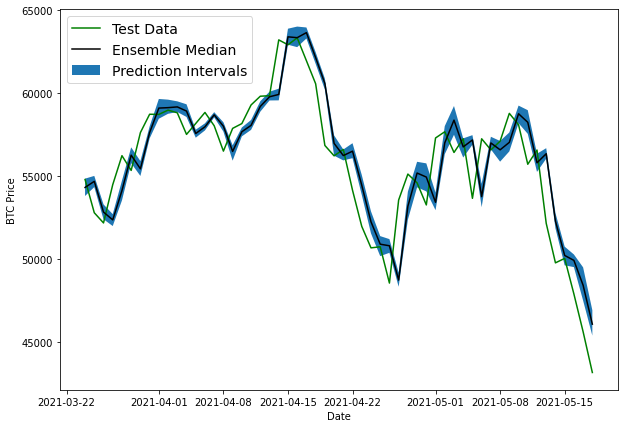

In [270]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);